Lo primero, instalamos los paquetes necesarios para realizar la construcción de la red. En este caso el paquete pyWGCNA

In [60]:
import numpy as np
import scipy
import pandas as pd
import PyWGCNA
from PyWGCNA import WGCNA

In [61]:
pyWGCNA = PyWGCNA.readWGCNA("tomato.p")

Reading tomato WGCNA done!


# 1. Limpieza y preprocesado de los datos
Cargamos las diferentes matrices preparadas ya de la expresión génica y de los metadatos de las muestras.




In [67]:
gene_expr = pd.read_csv("RESULTADOS/SL4_counts_combat.csv", index_col=0)
counts_df = pd.read_csv("RESULTADOS/SL4_counts_scaled.txt", sep='\t', comment='#')
counts_expr = counts_df.iloc[:, 6:]
gene_expr = gene_expr.iloc[:, 5:]
gene_expr.columns = counts_expr.columns
gene_expr = gene_expr.T
gene_expr

Geneid       gene:Solyc00g500001.1  gene:Solyc00g500002.1  \
ERR14096487                    0.0                    0.0   
ERR14096488                    0.0                    0.0   
ERR14096489                    0.0                    0.0   
SRR19735893                    0.0                    0.0   
SRR19735894                    0.0                    0.0   
SRR19735897                    0.0                    0.0   
SRR19735898                    0.0                    0.0   
SRR2002284                     0.0                    0.0   
SRR2011289                     0.0                    0.0   
SRR21847265                    0.0                    0.0   
SRR21847266                    0.0                    0.0   
SRR21847267                    0.0                    0.0   
SRR26436257                    0.0                    0.0   
SRR26436258                    0.0                    0.0   
SRR26436259                    0.0                    0.0   
SRR26436263                    0.0                    0.0   
SRR26436264                    0.0                    0.0   
SRR26436265                    0.0                    0.0   
SRR26436269                    0.0                    0.0   
SRR26436270                    0.0                    0.0   
SRR26436271                    0.0                    0.0   
SRR26436275                    0.0                    0.0   
SRR26436276                    0.0                    0.0   
SRR26436277                    0.0                    0.0   
SRR32302926                    0.0                    0.0   
SRR32302927                    0.0                    0.0   
SRR32302928                    0.0                    0.0   
SRR32302929                    0.0                    0.0   

Geneid       gene:Solyc00g500003.1  gene:Solyc00g500004.1  \
ERR14096487                    0.0                    0.0   
ERR14096488                    0.0                    0.0   
ERR14096489                    0.0                    0.0   
SRR19735893                    0.0                    0.0   
SRR19735894                    0.0                    0.0   
SRR19735897                    0.0                    0.0   
SRR19735898                    0.0                    0.0   
SRR2002284                     0.0                    0.0   
SRR2011289                     0.0                    0.0   
SRR21847265                    0.0                    0.0   
SRR21847266                    0.0                    0.0   
SRR21847267                    0.0                    0.0   
SRR26436257                    0.0                    0.0   
SRR26436258                    0.0                    0.0   
SRR26436259                    0.0                    0.0   
SRR26436263                    0.0                    0.0   
SRR26436264                    0.0                    0.0   
SRR26436265                    0.0                    0.0   
SRR26436269                    0.0                    0.0   
SRR26436270                    0.0                    0.0   
SRR26436271                    0.0                    0.0   
SRR26436275                    0.0                    0.0   
SRR26436276                    0.0                    0.0   
SRR26436277                    0.0                    0.0   
SRR32302926                    0.0                    0.0   
SRR32302927                    0.0                    0.0   
SRR32302928                    0.0                    0.0   
SRR32302929                    0.0                    0.0   

Geneid       gene:Solyc00g500005.1  gene:Solyc00g500006.1  \
ERR14096487                    0.0                    0.0   
ERR14096488                    0.0                    0.0   
ERR14096489                    0.0                    0.0   
SRR19735893                    0.0                    0.0   
SRR19735894                    0.0                    0.0   
SRR19735897                    0.0                    0.0   
SRR19735898                    0.

In [69]:
path = "RESULTADOS/METADATA_SRA.xlsx"
metadata = pd.read_excel(path)
metadata.head()

Extracted_SRR_ID                       SAMPLE INFORMATION STRESS  STUDY  \
0      SRR26436257  Sample: salinity + heat stress [S+HS-3]  S + H      1   
1      SRR26436258  Sample: salinity + heat stress [S+HS-2]  S + H      1   
2      SRR26436259  Sample: salinity + heat stress [S+HS-2]  S + H      1   
3      SRR26436263               Sample: heat stress [HS-3]      H      1   
4      SRR26436264               Sample: heat stress [HS-3]      H      1   

   GC_CONTENT  
0          41  
1          41  
2          41  
3          41  
4          41

Comenzamos con el limpiado y procesamiento. Para ello se comienza filtrando genes con varianza 0.


In [70]:
gene_expr = gene_expr.loc[:, gene_expr.var(axis=0) > 0]
gene_expr

Geneid       gene:Solyc00g500009.1  gene:Solyc00g500012.1  \
ERR14096487              -0.093361              -0.093361   
ERR14096488              -0.093361              -0.093361   
ERR14096489              -0.093361              -0.093361   
SRR19735893              -0.898591              -0.898591   
SRR19735894               4.936437              -0.898591   
SRR19735897              -0.898591              -0.898591   
SRR19735898              -0.898591               4.936437   
SRR2002284               -0.093361              -0.093361   
SRR2011289               -0.093361              -0.093361   
SRR21847265              -0.093361              -0.093361   
SRR21847266              -0.093361              -0.093361   
SRR21847267              -0.093361              -0.093361   
SRR26436257              -0.093361              -0.093361   
SRR26436258              -0.093361              -0.093361   
SRR26436259              -0.093361              -0.093361   
SRR26436263              -0.093361              -0.093361   
SRR26436264              -0.093361              -0.093361   
SRR26436265              -0.093361              -0.093361   
SRR26436269              -0.093361              -0.093361   
SRR26436270              -0.093361              -0.093361   
SRR26436271              -0.093361              -0.093361   
SRR26436275              -0.093361              -0.093361   
SRR26436276              -0.093361              -0.093361   
SRR26436277              -0.093361              -0.093361   
SRR32302926              -0.093361              -0.093361   
SRR32302927              -0.093361              -0.093361   
SRR32302928              -0.093361              -0.093361   
SRR32302929              -0.093361              -0.093361   

Geneid       gene:Solyc00g500014.1  gene:Solyc00g500019.1  \
ERR14096487              -0.010224              -0.712989   
ERR14096488              -0.010224               2.558308   
ERR14096489              -0.010224               0.919177   
SRR19735893              -0.010224               2.131678   
SRR19735894              -0.010224              -1.471683   
SRR19735897              -0.010224               0.508522   
SRR19735898              -0.010224              -1.471683   
SRR2002284               -0.010224              -0.068573   
SRR2011289               -0.010224              -0.068573   
SRR21847265              -2.035158              -0.068573   
SRR21847266              -2.035158              -0.068573   
SRR21847267               4.325927              -0.068573   
SRR26436257              -0.010224              -0.068573   
SRR26436258              -0.010224              -0.068573   
SRR26436259              -0.010224              -0.068573   
SRR26436263              -0.010224              -0.068573   
SRR26436264              -0.010224              -0.068573   
SRR26436265              -0.010224              -0.068573   
SRR26436269              -0.010224              -0.068573   
SRR26436270              -0.010224              -0.068573   
SRR26436271              -0.010224              -0.068573   
SRR26436275              -0.010224              -0.068573   
SRR26436276              -0.010224              -0.068573   
SRR26436277              -0.010224              -0.068573   
SRR32302926              -0.010224              -1.212150   
SRR32302927              -0.010224              -1.212150   
SRR32302928              -0.010224               2.340856   
SRR32302929              -0.010224              -1.212150   

Geneid       gene:Solyc00g500020.1  gene:Solyc00g500021.1  \
ERR14096487              -0.052694              -0.022106   
ERR14096488              -0.052694              -0.022106   
ERR14096489              -0.052694              -0.022106   
SRR19735893              -0.834397              -1.429228   
SRR19735894               1.890850               1.132609   
SRR19735897               0.811539               2.683908   
SRR19735898              -2.37803

Lo siguiente que vamos a tener en cuneta es la lista de genes con valor de TPMs umbral mínimo que se obtuvo en pasos anteriores.

In [71]:
with open('umbral_genes.txt', 'r') as file:
    genes_list = [line.strip() for line in file.readlines()]

gene_expr_umbral = gene_expr.loc[:, genes_list]
gene_expr_umbral.columns = [col.split(":")[1] if ":" in col else col for col in gene_expr_umbral.columns]

gene_expr_umbral.to_csv("gene_expr_umbral.csv", index=True)


Ahora usaremos la función preprocess() del paquete WGCNA para asegurar que los pasos previos han sido correctos.


In [72]:
sample_info = pd.read_csv("metadata.csv", index_col=1)  
sample_info = sample_info.loc[gene_expr.index]  
sample_info = sample_info.drop(columns=["SAMPLE INFORMATION", "Unnamed: 0" ])
sample_info['STRESS'] = sample_info['STRESS'].str.strip() 
sample_info

STRESS  STUDY
ERR14096487       Al      6
ERR14096488       Al      6
ERR14096489       Al      6
SRR19735893        H      3
SRR19735894        H      3
SRR19735897  control      3
SRR19735898  control      3
SRR2002284   control      4
SRR2011289        CL      4
SRR21847265        S      5
SRR21847266        S      5
SRR21847267        S      5
SRR26436257    S + H      1
SRR26436258    S + H      1
SRR26436259    S + H      1
SRR26436263        H      1
SRR26436264        H      1
SRR26436265        H      1
SRR26436269        S      1
SRR26436270        S      1
SRR26436271        S      1
SRR26436275  control      1
SRR26436276  control      1
SRR26436277  control      1
SRR32302926        D      2
SRR32302927        D      2
SRR32302928        D      2
SRR32302929  control      2

In [73]:
import PyWGCNA

pyWGCNA = PyWGCNA.WGCNA(name='tomato',
                               species='solanum lycopersicum',
                               geneExpPath='gene_expr_umbral.csv',
                               sampleInfo=sample_info,
                               outputPath='',
                               save=True)

Saving data to be True, checking requirements ...


In [74]:
pyWGCNA.geneExpr.to_df().head(5)  

Solyc00g500022.1  Solyc00g500023.1  Solyc00g500034.1  \
ERR14096487          1.342792         -1.071372         -2.059112   
ERR14096488         -1.403681          0.586724          0.942508   
ERR14096489          0.003316          0.496223          0.454848   
SRR19735893          0.025095         -1.209891         -0.396278   
SRR19735894          0.730549          0.194092         -0.881399   

             Solyc00g500039.1  Solyc00g500042.1  Solyc00g500062.1  \
ERR14096487         -0.731527         -0.500689          0.917426   
ERR14096488          2.018388         -0.484920         -0.472580   
ERR14096489         -0.763893          0.621404         -0.418636   
SRR19735893          0.895887         -0.314029         -1.107739   
SRR19735894          0.007149         -0.924919          0.017062   

             Solyc00g500063.1  Solyc00g500065.1  Solyc00g500066.1  \
ERR14096487         -0.469705         -0.324875          0.118376   
ERR14096488         -0.517263         -0.612301         -0.679052   
ERR14096489          1.218301          1.221394          0.649312   
SRR19735893         -0.134093          0.372415         -0.368969   
SRR19735894          0.828271          0.510728         -0.133449   

             Solyc00g500068.1  ...  Solyc12g100250.3  Solyc12g100260.1  \
ERR14096487         -0.045963  ...         -0.007286         -0.716791   
ERR14096488         -1.225822  ...         -0.007286          1.416489   
ERR14096489          1.395566  ...         -0.007286         -0.716791   
SRR19735893         -0.442799  ...         -0.169563         -0.725554   
SRR19735894          0.195540  ...         -0.169563         -1.134577   

             Solyc12g100270.2  Solyc12g100280.3  Solyc12g100290.3  \
ERR14096487          0.040588         -0.863718          1.399650   
ERR14096488         -0.645474          0.398847         -1.105440   
ERR14096489          0.628486          0.741737         -1.250783   
SRR19735893          0.145915          0.829890          0.879528   
SRR19735894         -0.087345         -0.584926         -0.480700   

             Solyc12g100310.2  Solyc12g100320.2  Solyc12g100330.2  \
ERR14096487          0.004583         -0.897134          1.733657   
ERR14096488         -0.964686         -0.236881         -0.911571   
ERR14096489          0.979561          1.243285          0.452352   
SRR19735893          1.107116          1.145374         -0.651525   
SRR19735894          0.898396          0.834533         -0.727252   

             Solyc12g100340.1  Solyc12g100360.1  
ERR14096487         -0.018745          0.502155  
ERR14096488         -0.018745         -1.788918  
ERR14096489         -0.018745          0.641289  
SRR19735893         -0.018745          0.924156  
SRR19735894         -0.018745         -0.233436  

[5 rows x 23240 columns]

Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



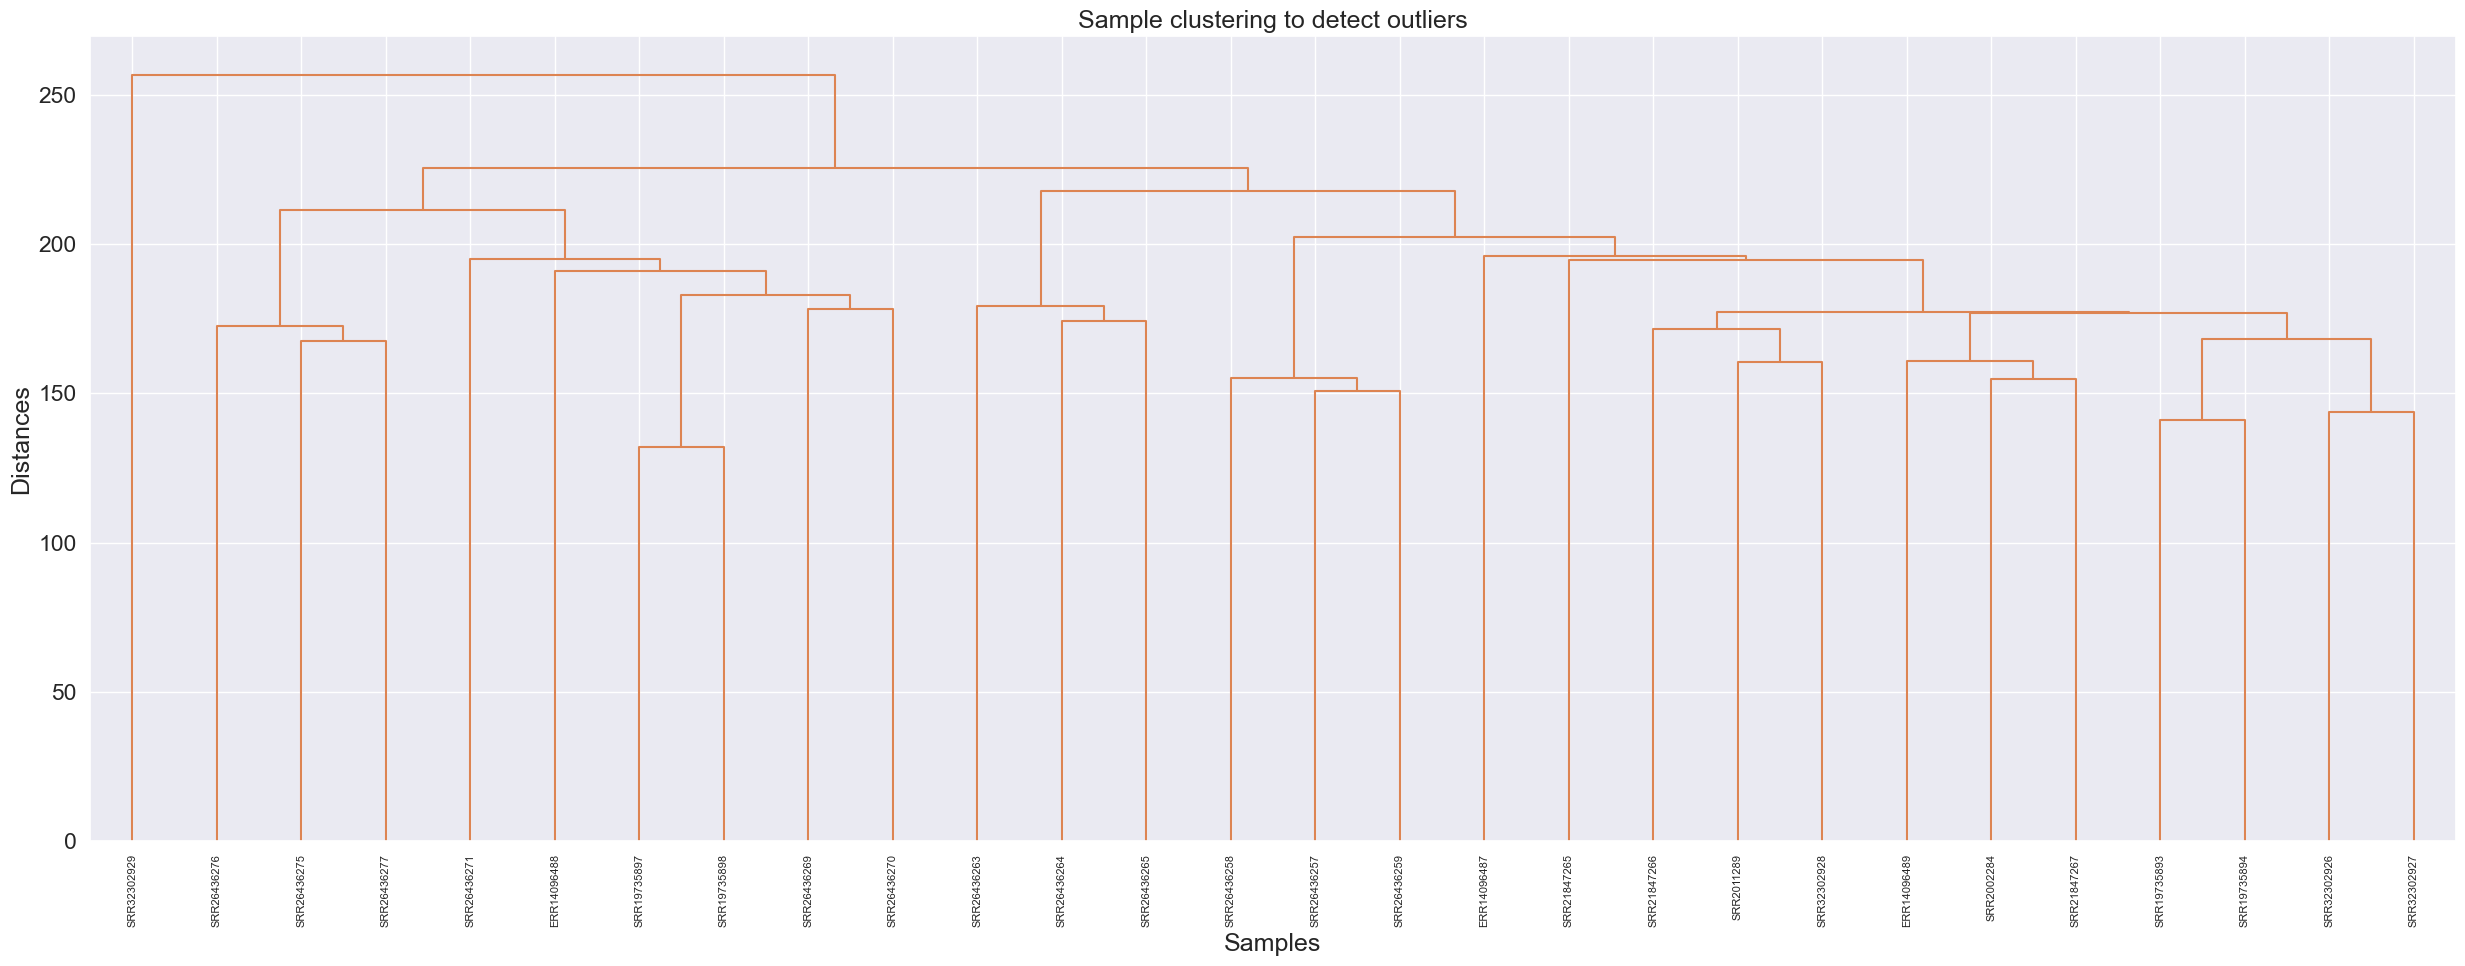

In [75]:
pyWGCNA.preprocess()

# 2. Construcción de la red génica e identificación de módulos
PyWGCNA agiliza el análisis de redes y la identificación de módulos genéticos con su función findModules, que integra varias etapas esenciales:

- Determinación del umbral de potencia óptimo para garantizar una representación precisa de la conectividad entre genes.

- Cálculo de similitudes de expresión y construcción de la matriz de adyacencia, estableciendo qué genes están más fuertemente conectados.

- Generación de la matriz de superposición topológica (TOM), que refina la representación de las conexiones al evaluar relaciones indirectas.

- Agrupamiento de genes basado en TOM, identificando patrones de coexpresión y asignándolos a módulos funcionales.

- Fusión de módulos similares para eliminar redundancias y mejorar la interpretación de los resultados.

Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  1925
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.239002  1.141615       0.859127   3531.03581  3331.655566   
1       2  0.281797 -0.792155       0.846338  1365.968164  1122.876705   
2       3  0.674033 -1.525548       0.904624   641.812427   474.794758   
3       4  0.762073 -1.799659       0.922342   340.612862   231.261142   
4       5  0.805458 -1.919027       0.940113   196.796083   121.324963   
5       6  0.834093 -1.965883       0.956034    121.11854    67.445278   
6       7  0.842081 -2.005874       0.961026    78.288742    39.553942   
7       8  0.854509 -2.014158       0.968946    52.630861    24.156692   
8       9  0.857777 -2.025635       0.972214    36.540313    15.234281   
9      10  0.855055 -2.046638       0.972141    26.062029     9.867272   
10     11  0.859293 -2.039539       0.974547    19.019277     6.502885   
11     13

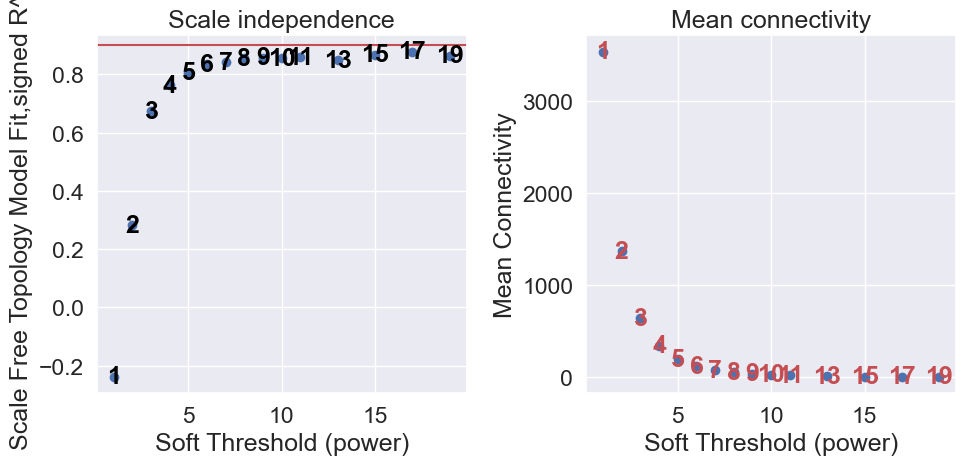

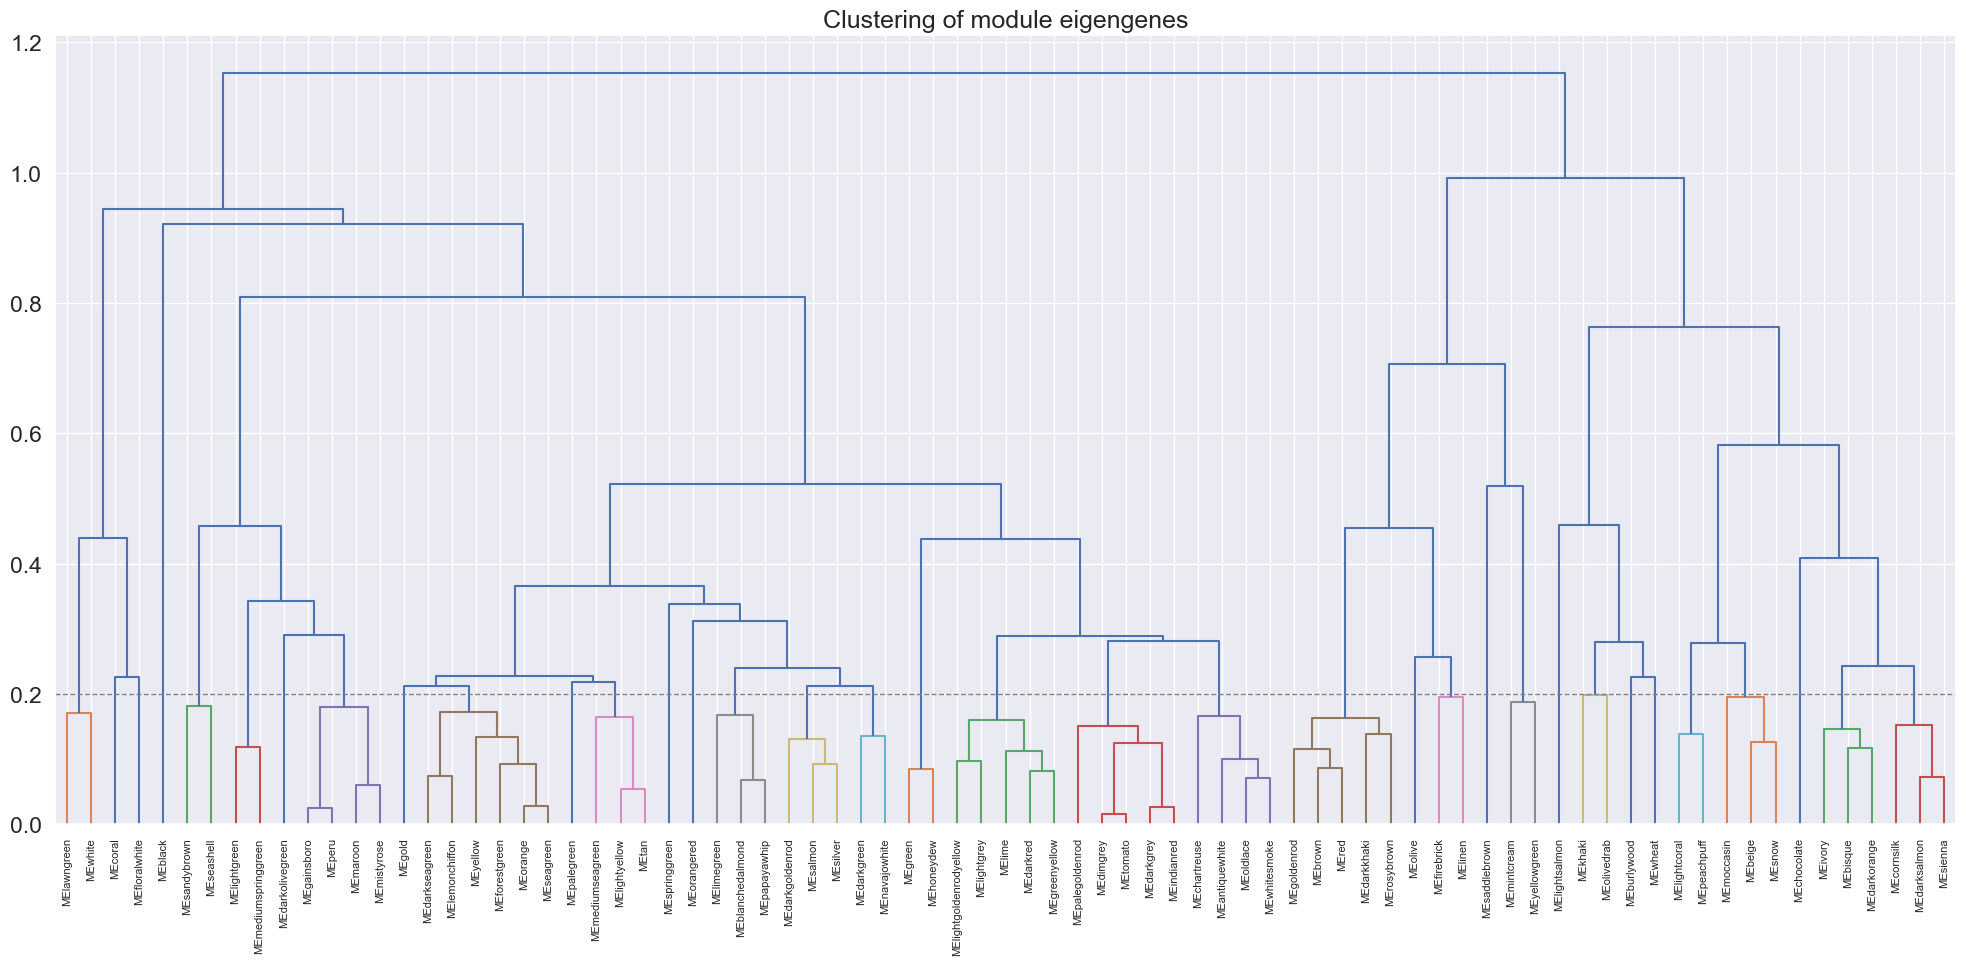

In [76]:
pyWGCNA.findModules()


In [78]:
pyWGCNA.setMetadataColor('STRESS', {
    'Al': 'darkorange',
    'H': 'red',
    'control': 'gray',
    'CL': 'cyan',
    'S': 'blue',
    'S + H': 'purple',
    'D': 'brown'
})

pyWGCNA.setMetadataColor('STUDY', {
    '1': 'lightblue',
    '2': 'lightgreen',
    '3': 'pink',
    '4': 'yellow',
    '5': 'violet',
    '6': 'darkgreen'
})



Añadir la información de los genes para poder llevar a cabo el GO analysis

In [81]:
df = pd.read_csv("RESULTADOS/anotaciones_genes_expr_umbral.csv", sep=';')
gene_data = df[["GeneID", "gene_name", "Note"]]
gene_data.columns = ["external_gene_name", "gene_name", "gene_biotype"]
gene_data

external_gene_name         gene_name  \
0         Solyc00g014790  Solyc00g014790.2   
1         Solyc00g014850  Solyc00g014850.1   
2         Solyc00g019950  Solyc00g019950.1   
3         Solyc00g019970  Solyc00g019970.2   
4         Solyc00g019980  Solyc00g019980.2   
...                  ...               ...   
23235     Solyc12g150123  Solyc12g150123.1   
23236     Solyc12g150124  Solyc12g150124.1   
23237     Solyc12g150125  Solyc12g150125.1   
23238     Solyc12g150131  Solyc12g150131.1   
23239     Solyc12g150132  Solyc12g150132.1   

                                            gene_biotype  
0                                        Unknown protein  
1      orf86 (mitochondrion) (AHRD V3.3 *** YP_002608...  
2      NADH dehydrogenase subunit 9 (AHRD V3.3 *** A0...  
3                                        Unknown protein  
4      ribosomal protein L2 (chloroplast) (AHRD V3.3 ...  
...                                                  ...  
23235  Retrovirus-related Pol polyprotein from transp...  
23236  Retrovirus-related Pol polyprotein from transp...  
23237  Alpha/beta-hydrolases superfamily protein (AHR...  
23238   extensin-2-like (AHRD V3.3 *-* A0A1U8ESB3_CAPAN)  
23239   extensin-2-like (AHRD V3.3 *-* A0A1U8ESB3_CAPAN)  

[23240 rows x 3 columns]

In [82]:
gene_data.index = gene_data["gene_name"]
pyWGCNA.updateGeneInfo(geneInfo=gene_data)


Analysing WGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..

plotting module heatmap eigengene...
	Done..

plotting module barplot eigengene...
	Done..

doing Enrichr GO analysis for each module...
GO directory does not exist!
Creating GO directory!
No enrich terms when cutoff = 1 in module mintcream
No enrich terms when cutoff = 1 in module darkkhaki
No enrich terms when cutoff = 1 in module firebrick
No enrich terms when cutoff = 1 in module sandybrown
No enrich terms when cutoff = 1 in module black
No enrich terms when cutoff = 1 in module lawngreen
No enrich terms when cutoff = 1 in module dimgrey
No enrich terms when cutoff = 1 in module bisque
No enrich terms when cutoff = 1 in module chartreuse
No enrich terms when cutoff = 1 in module navajowhite
No enrich terms when cutoff = 1 in module mistyrose
No enrich terms when cutoff = 1 in module burlywood
No enrich terms when cutoff = 1 in module da

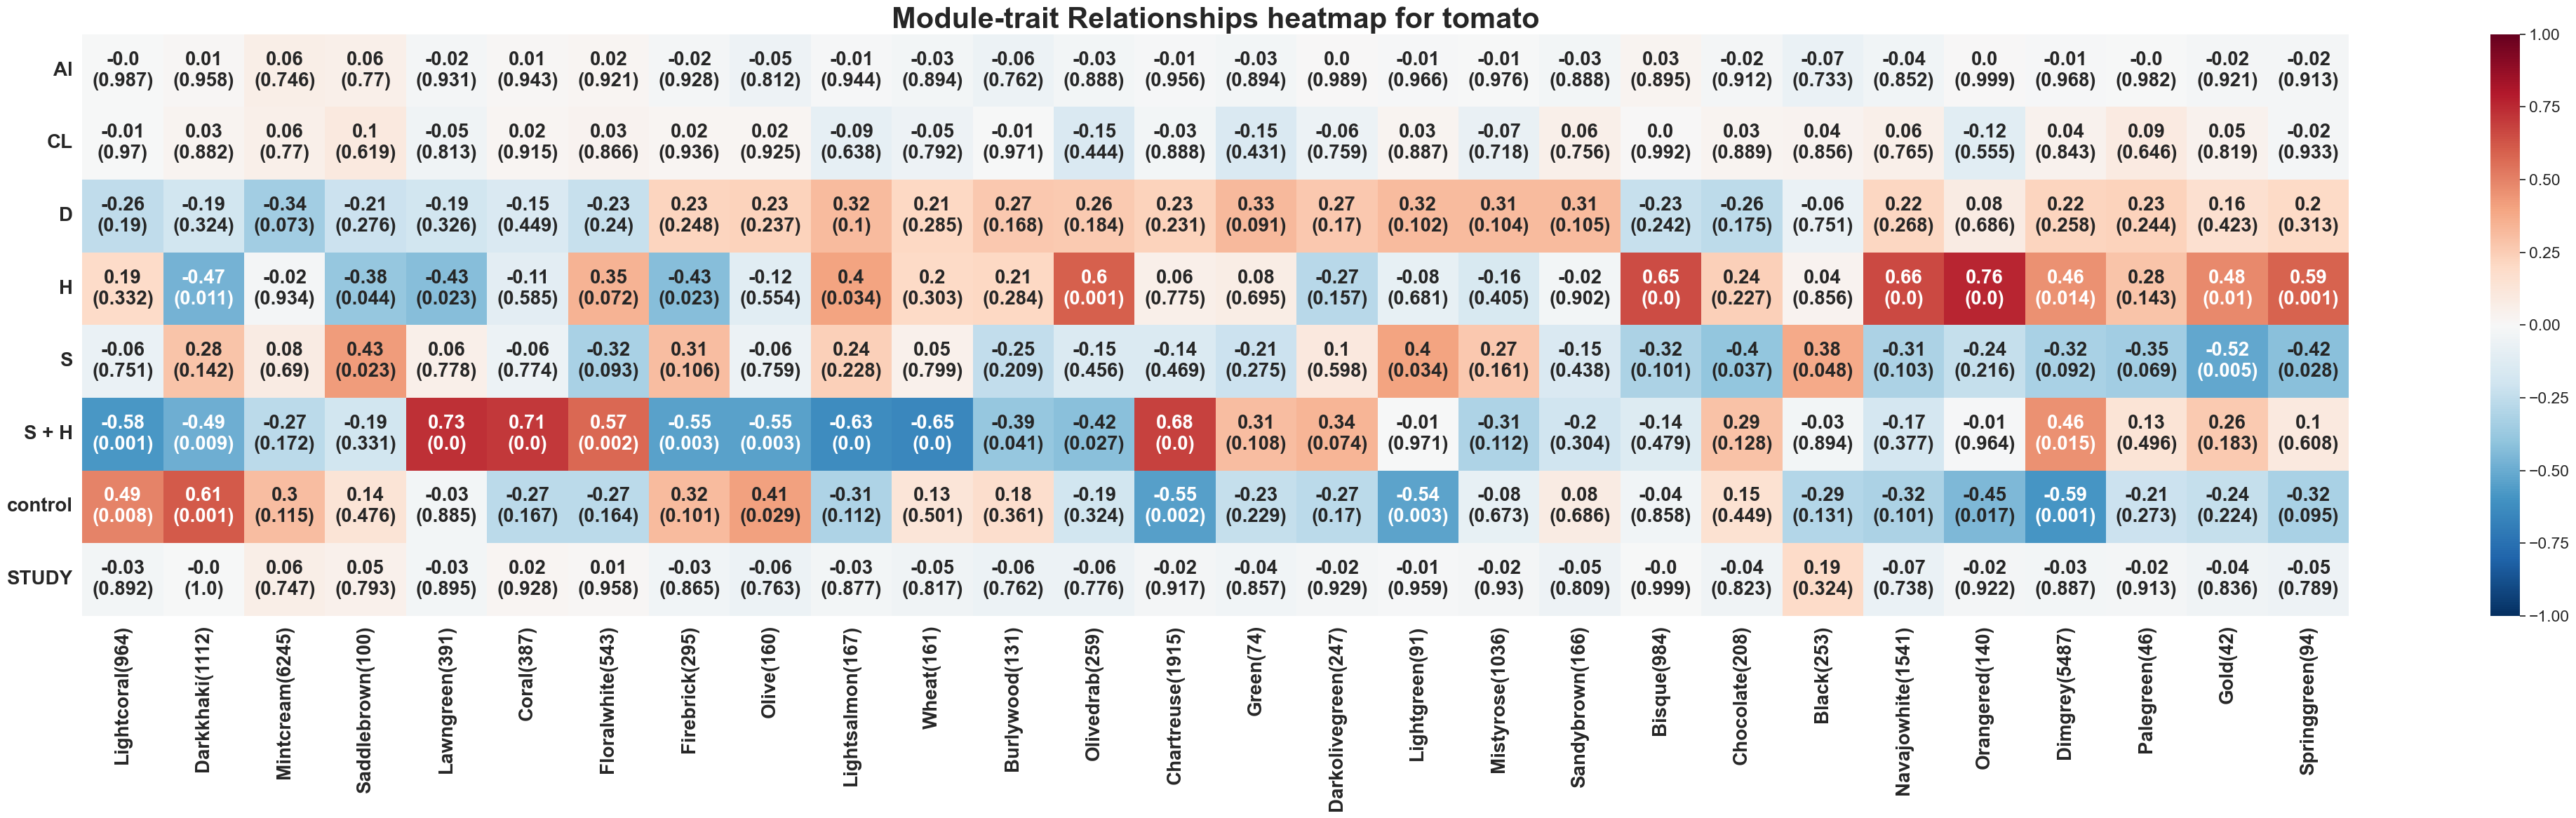

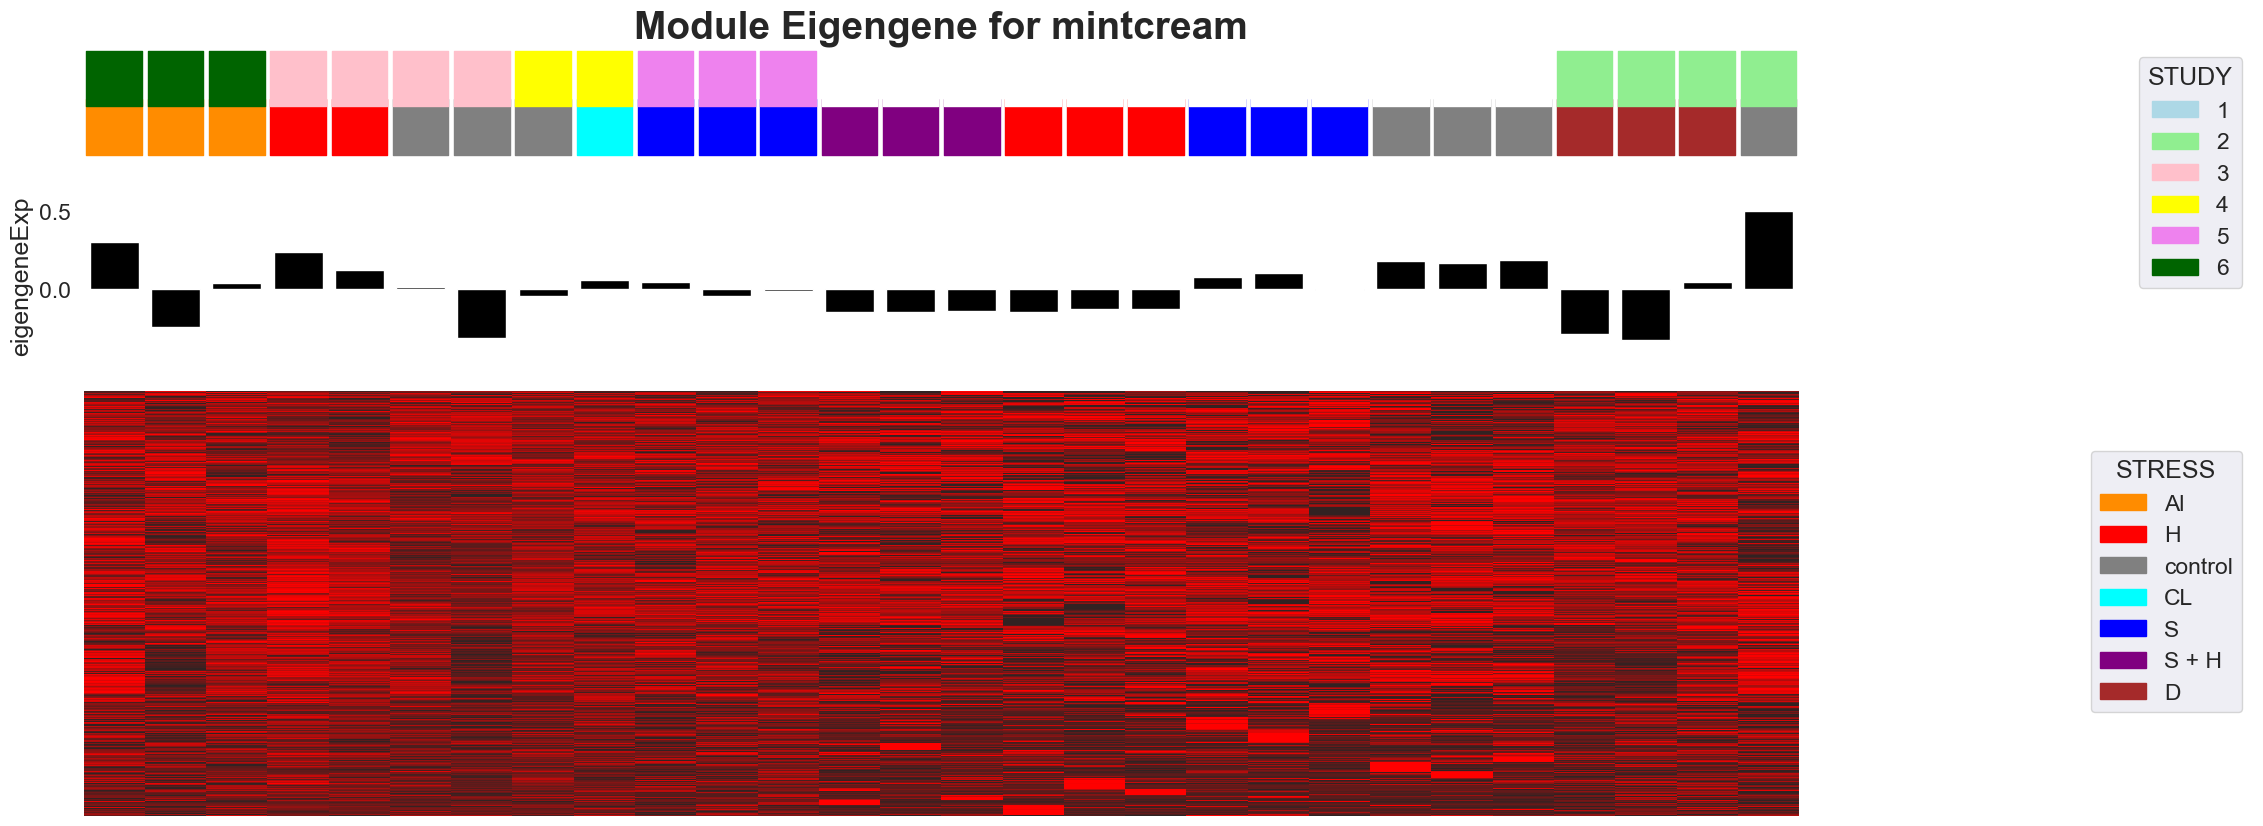

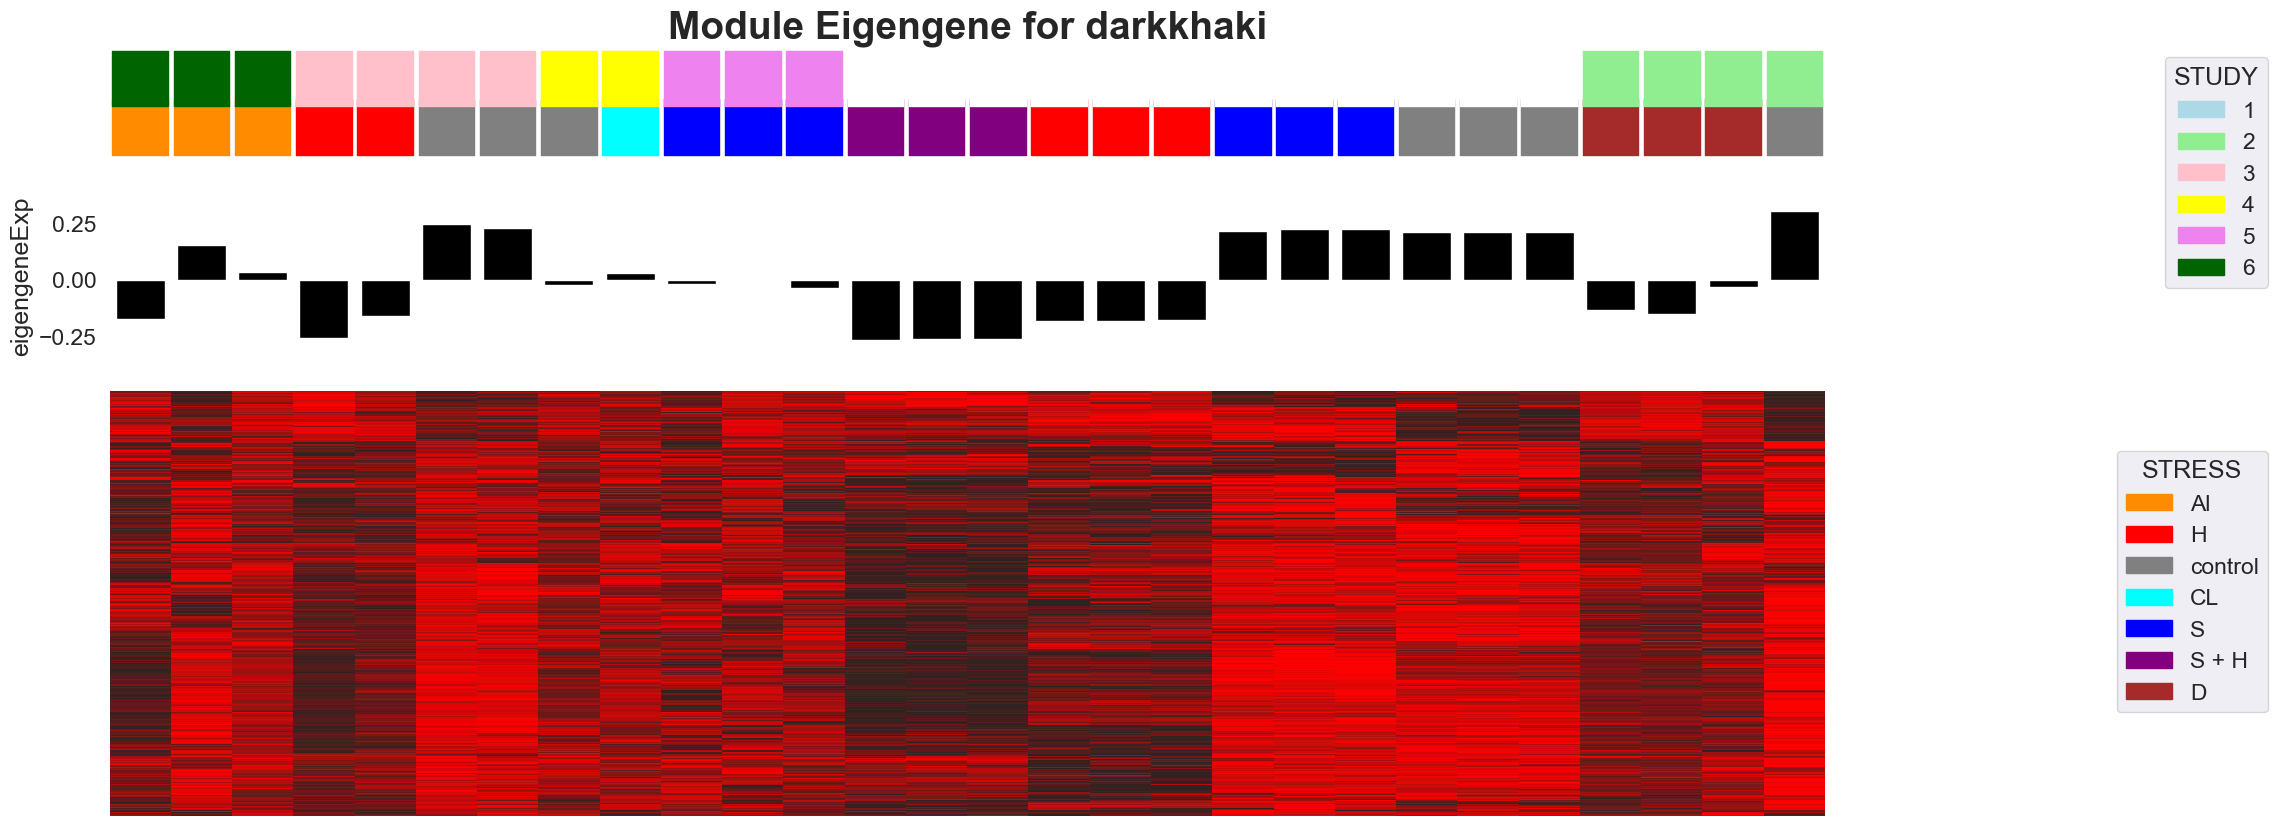

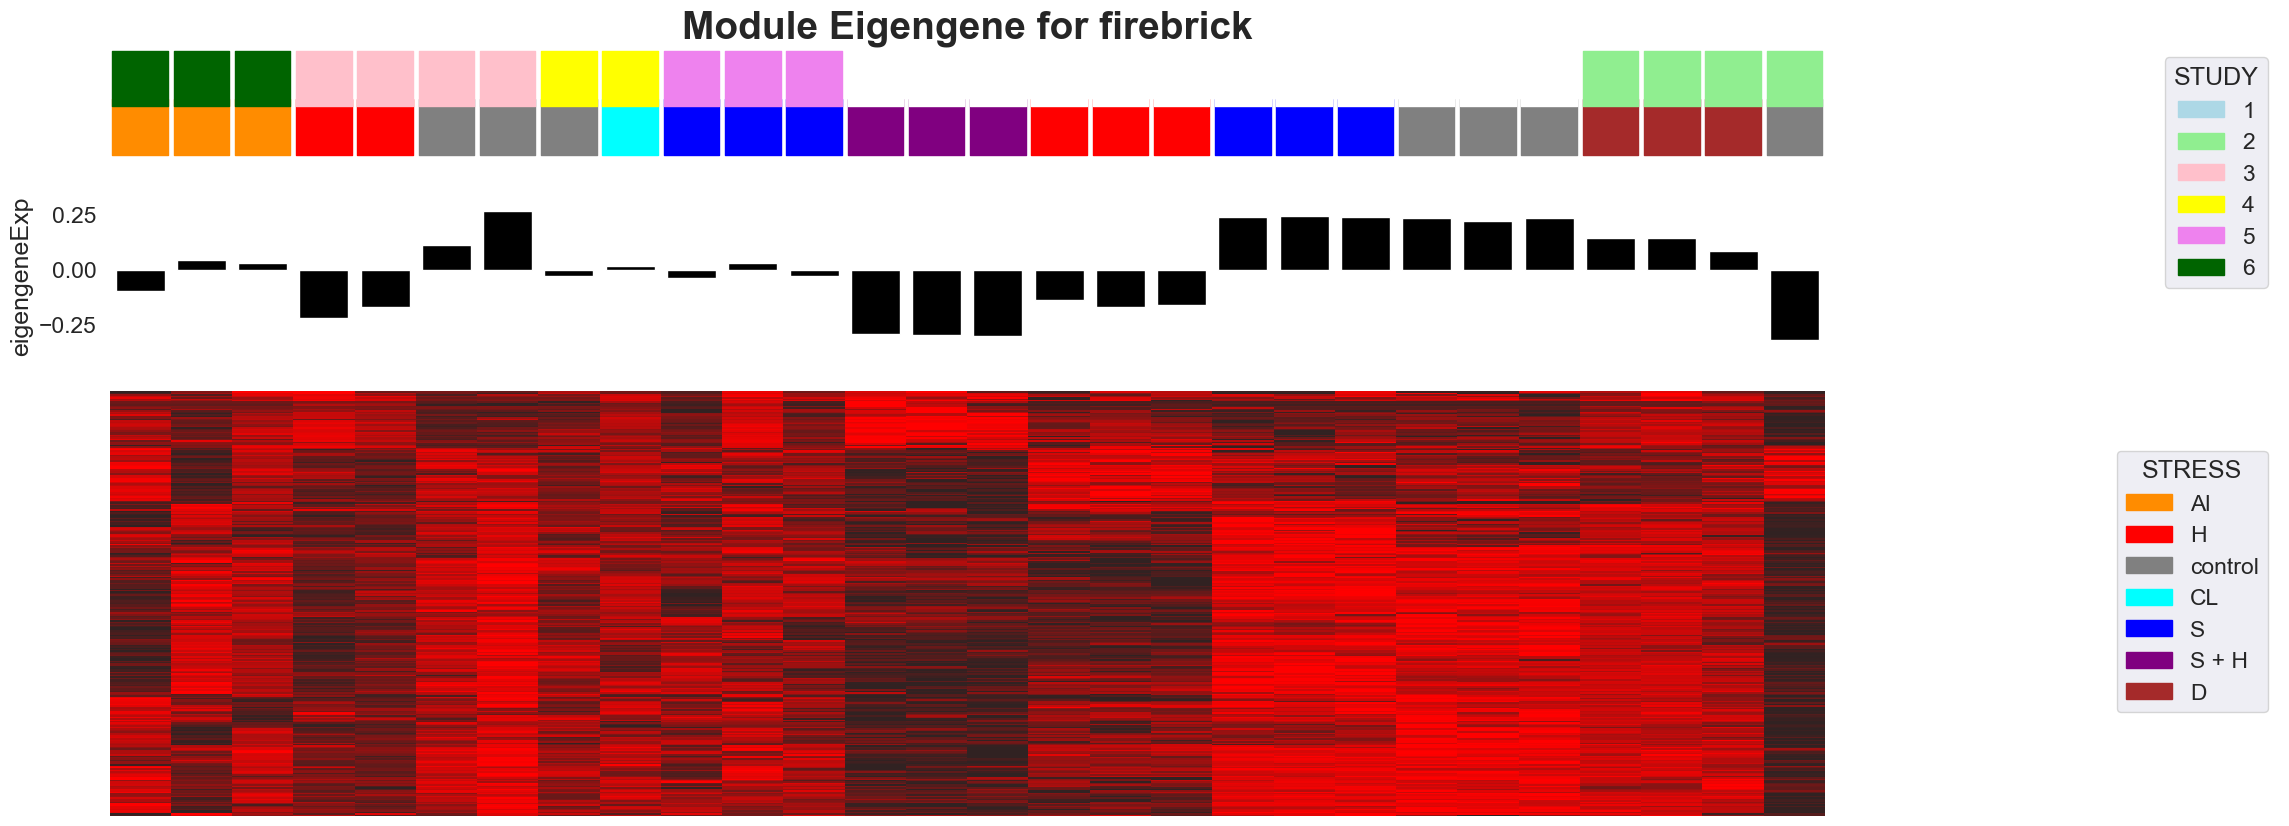

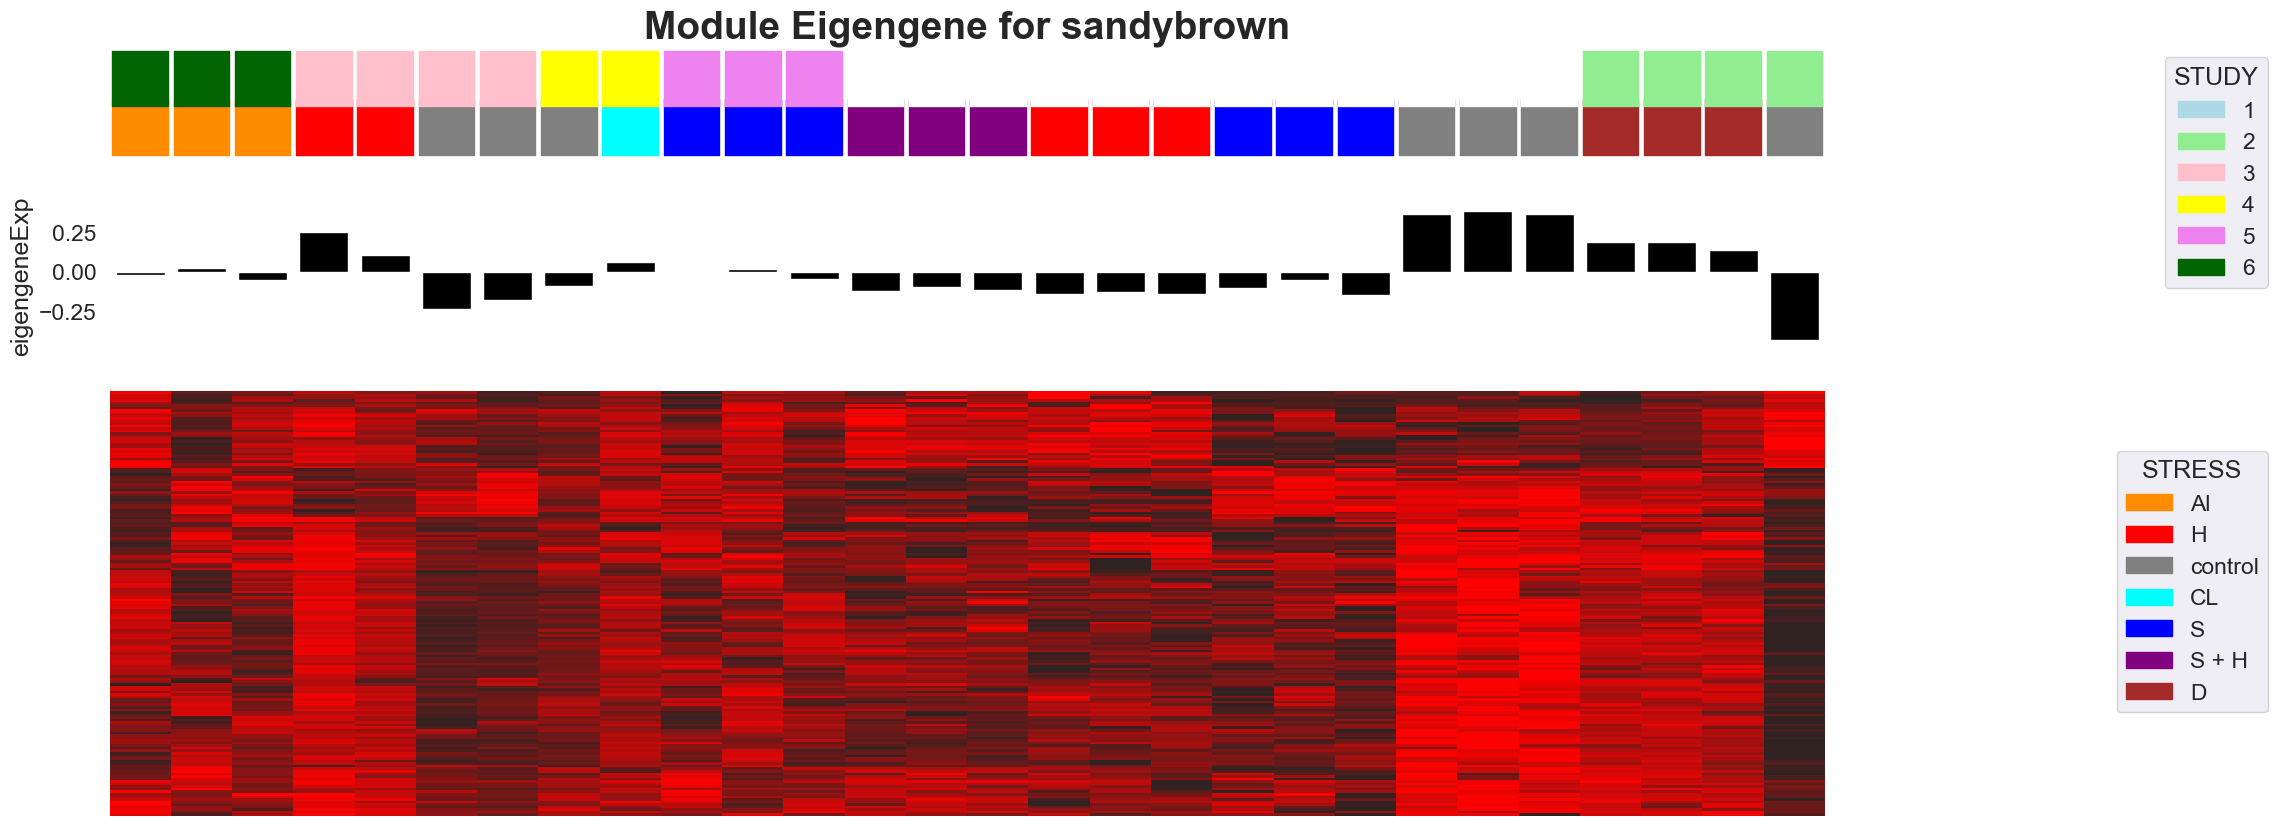

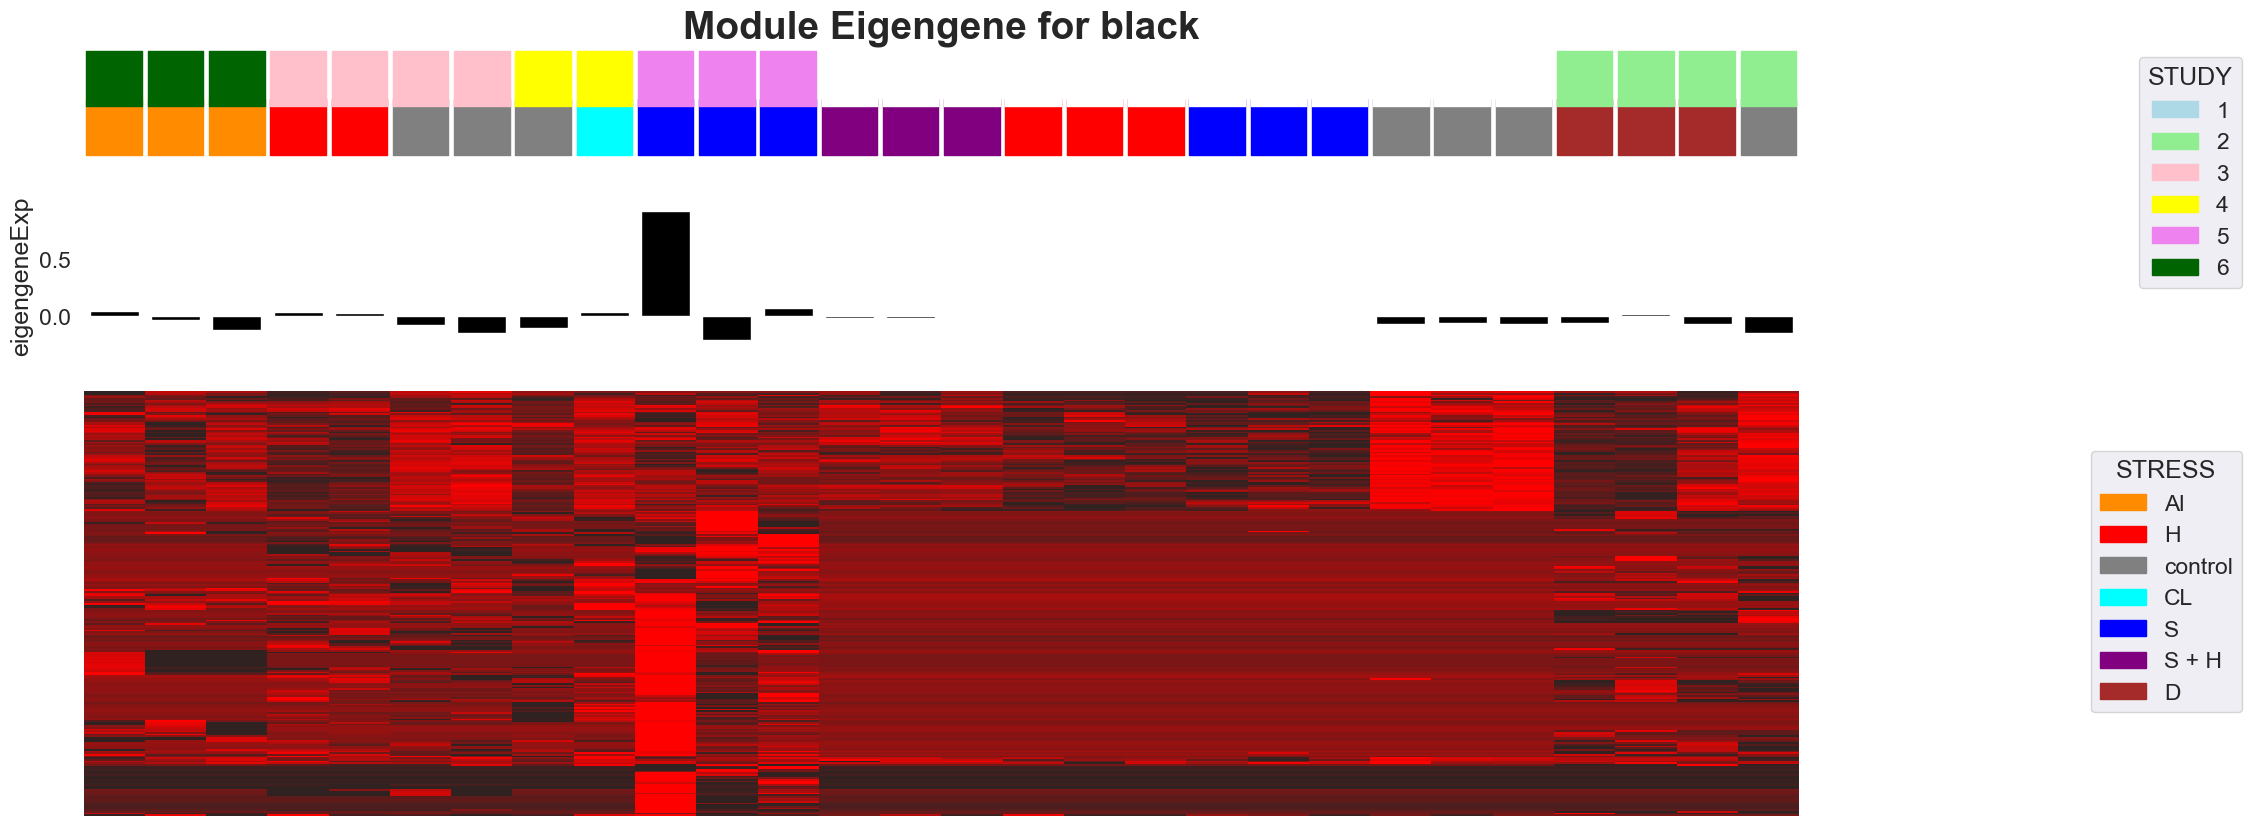

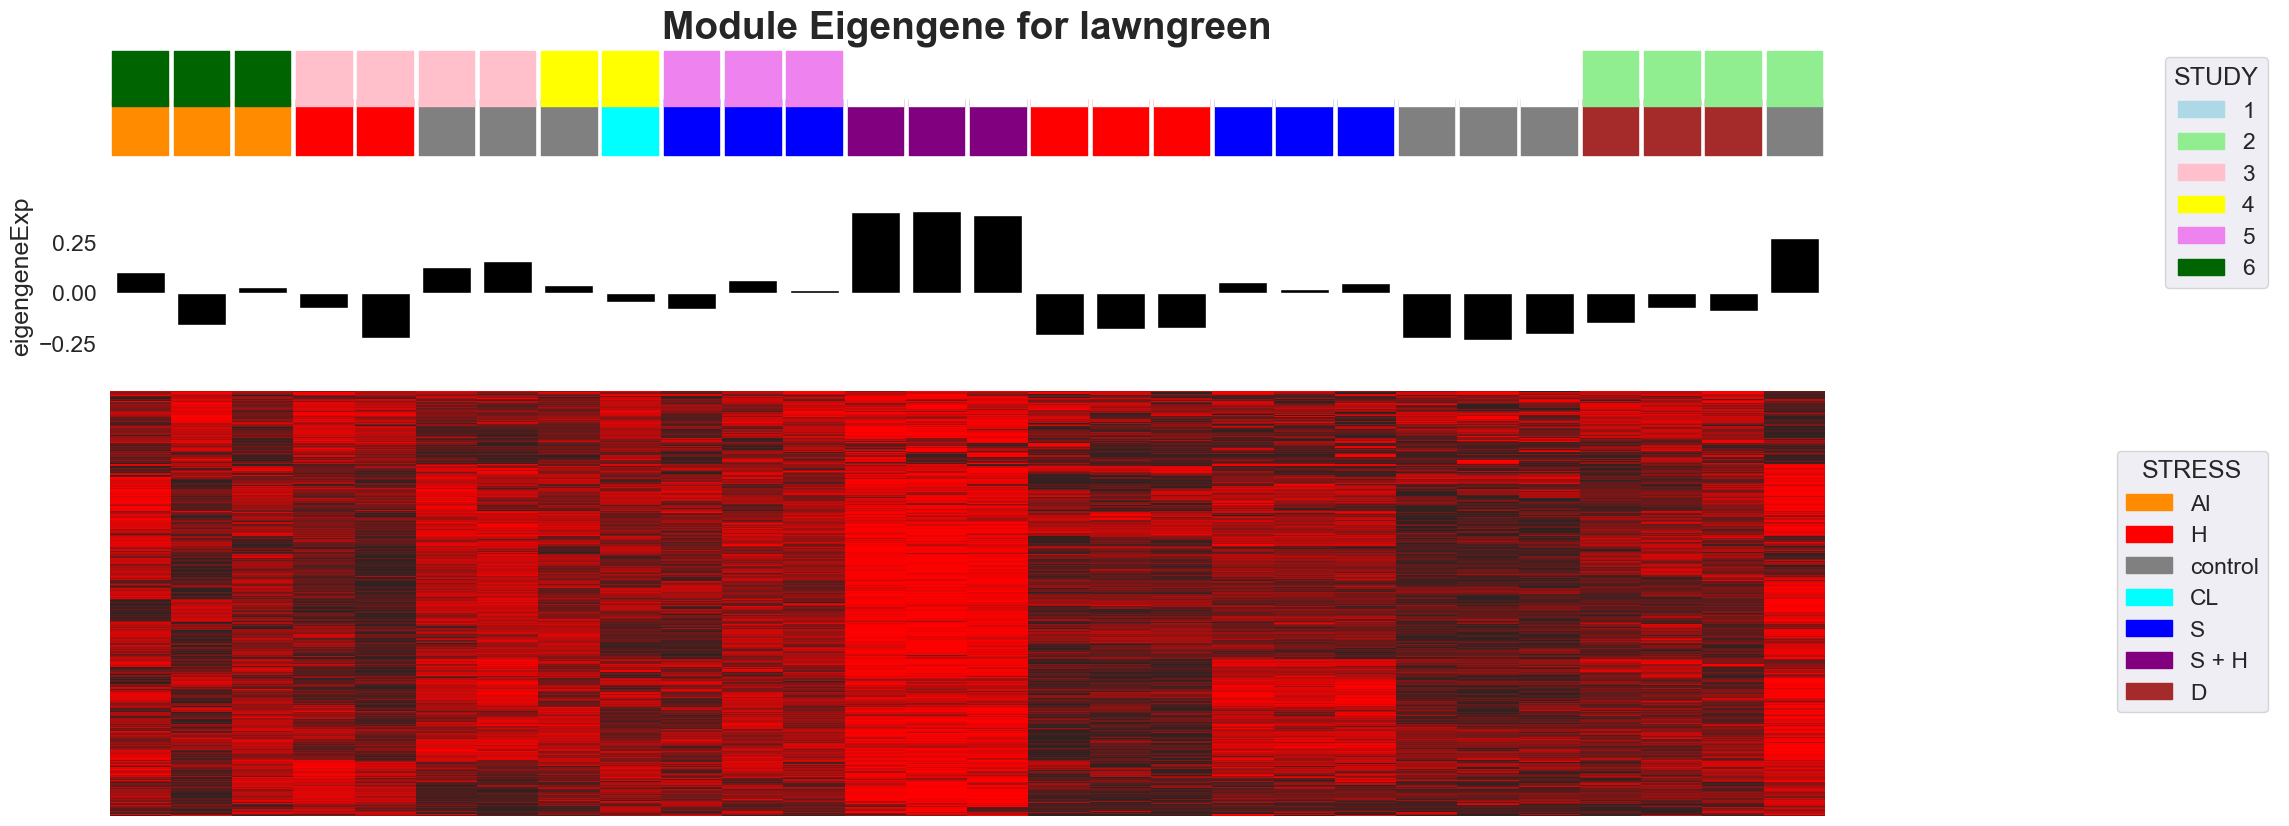

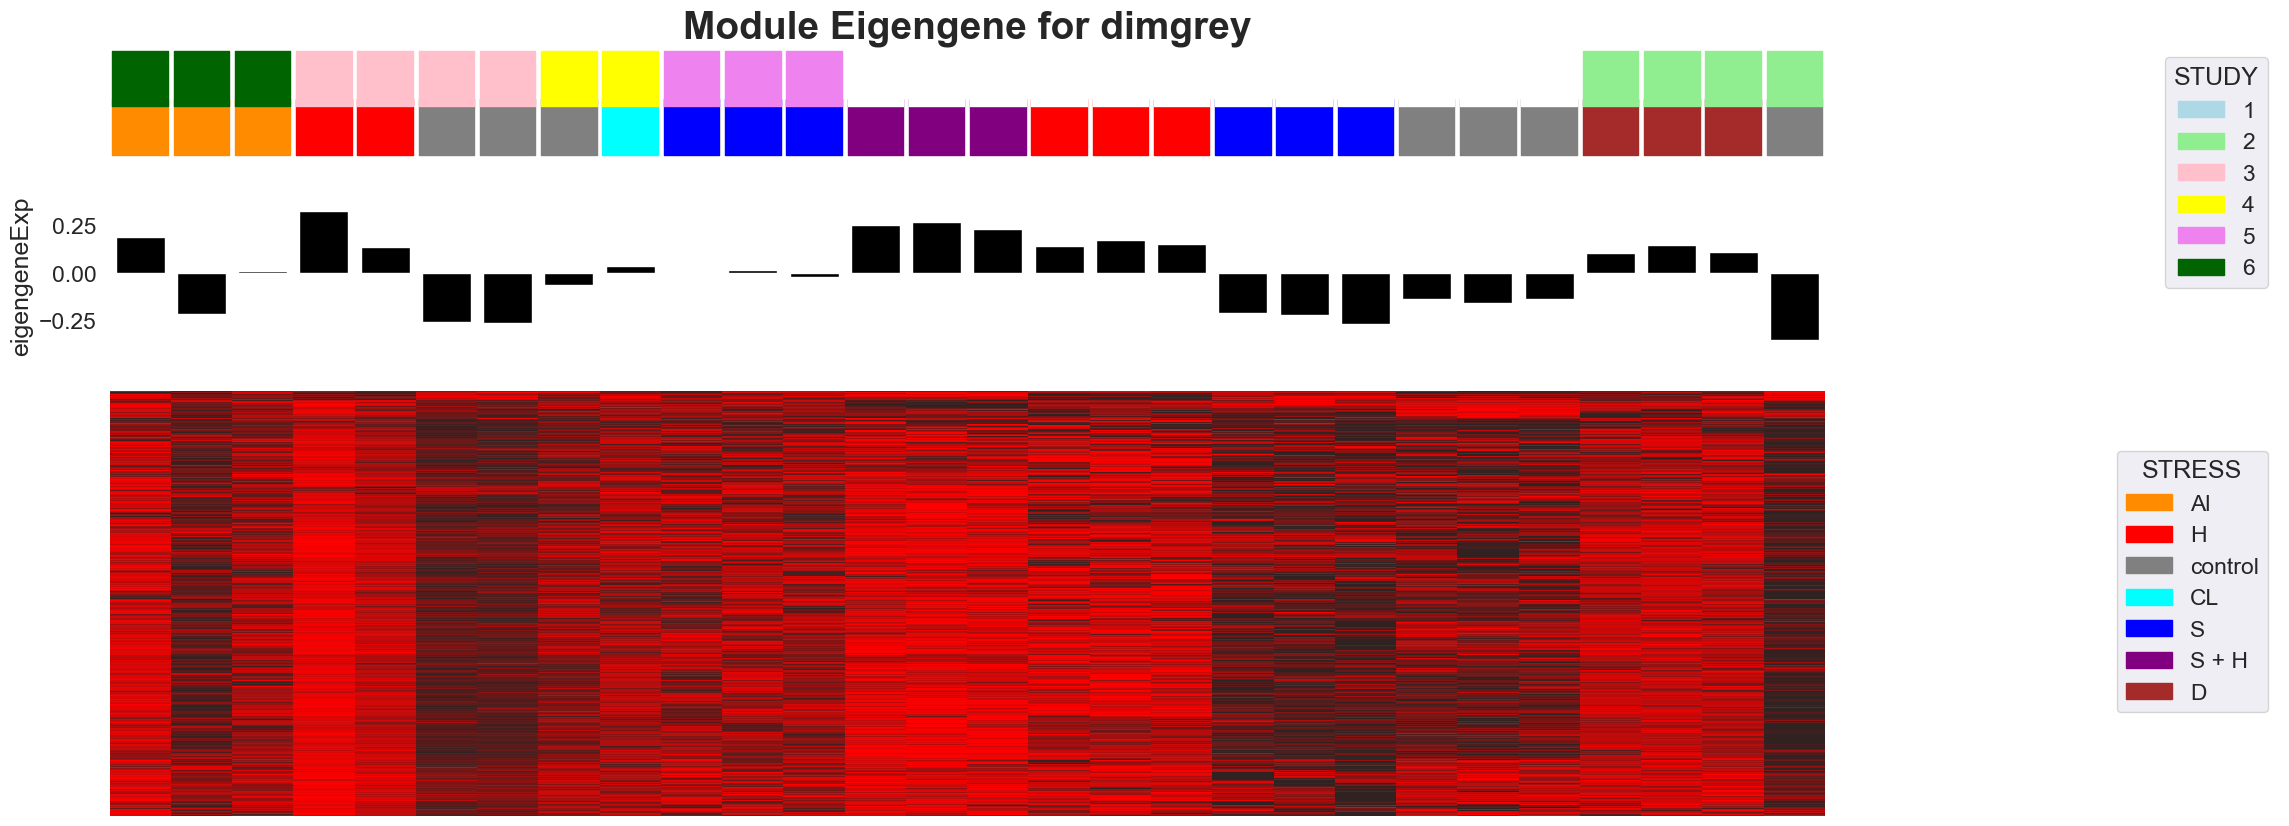

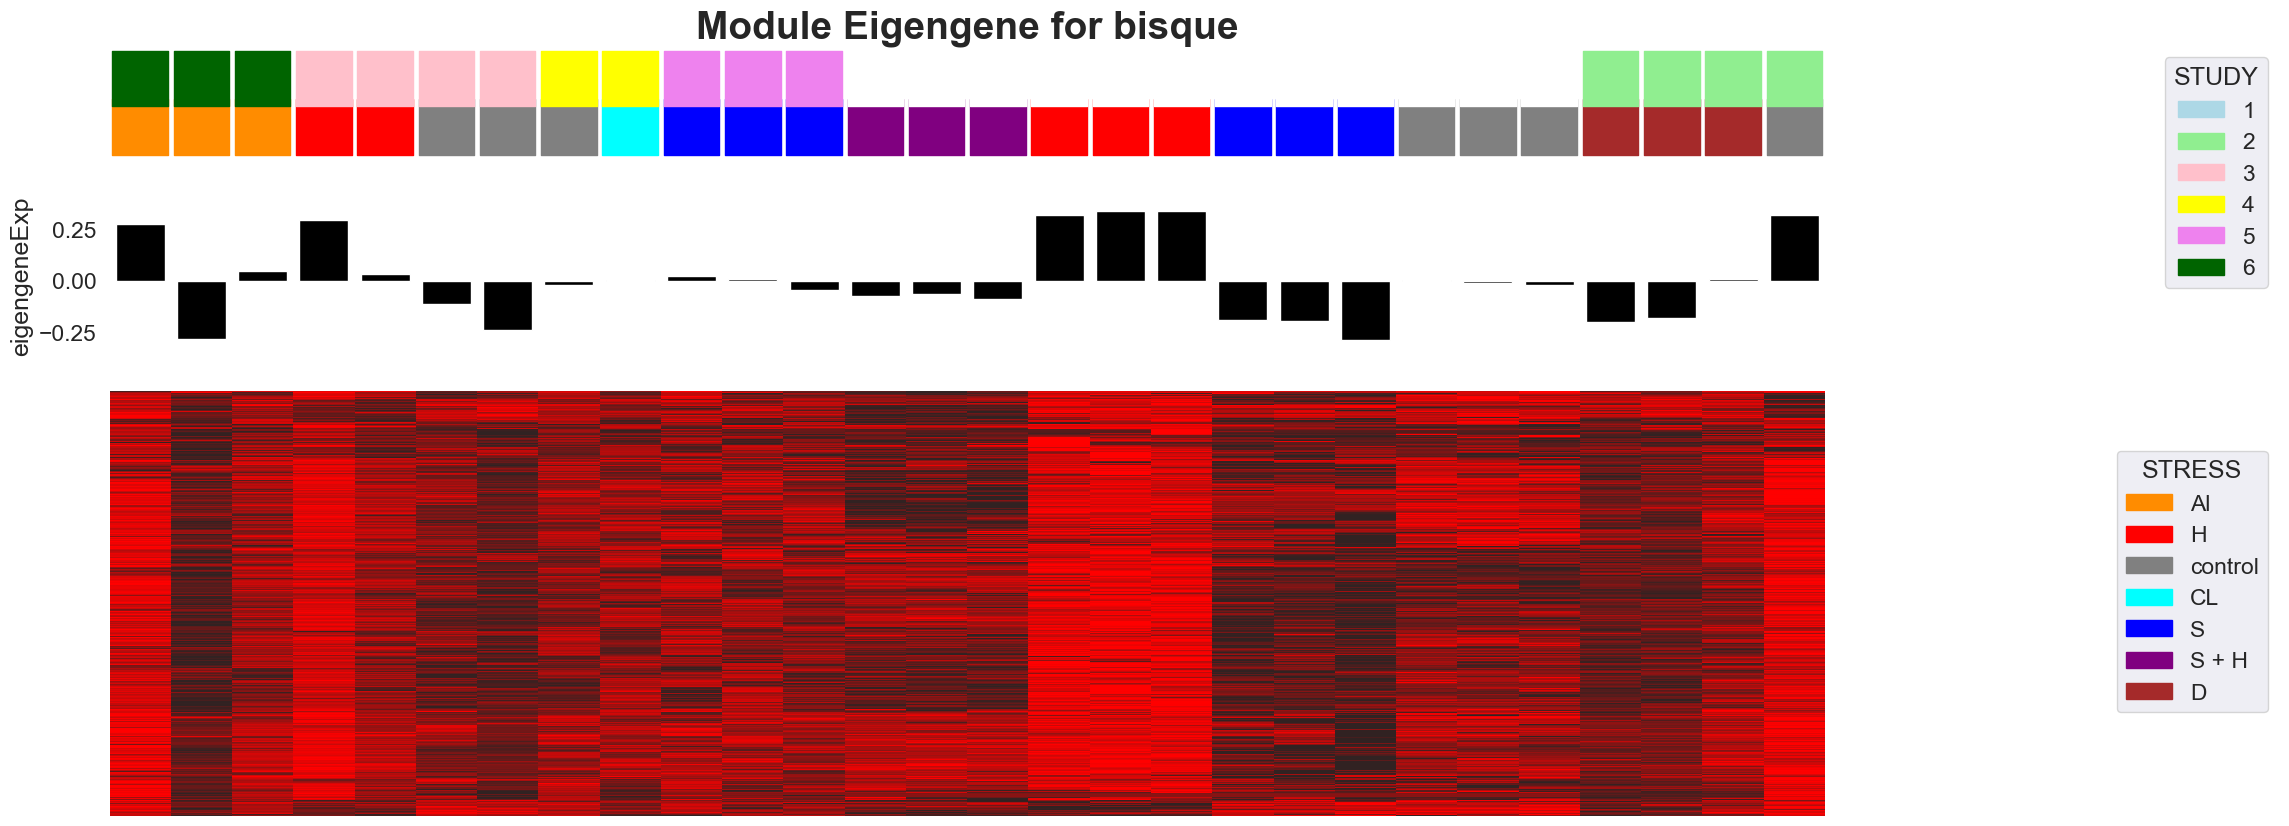

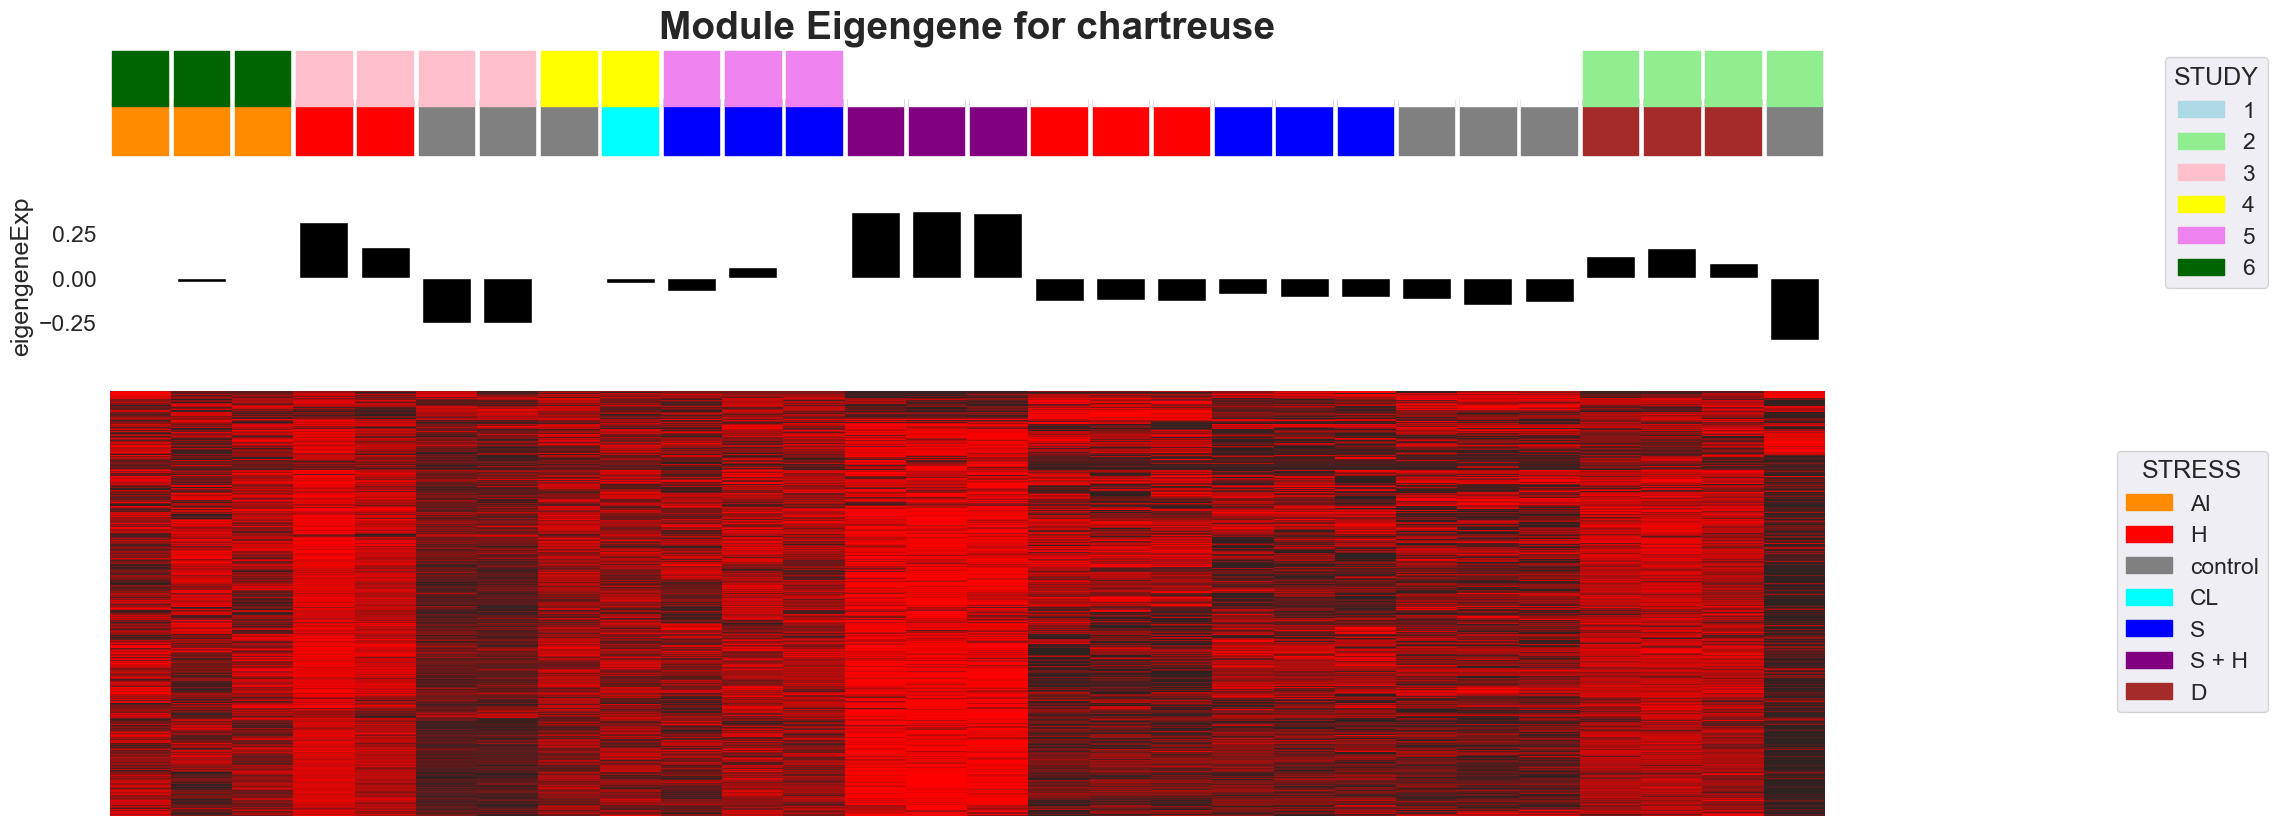

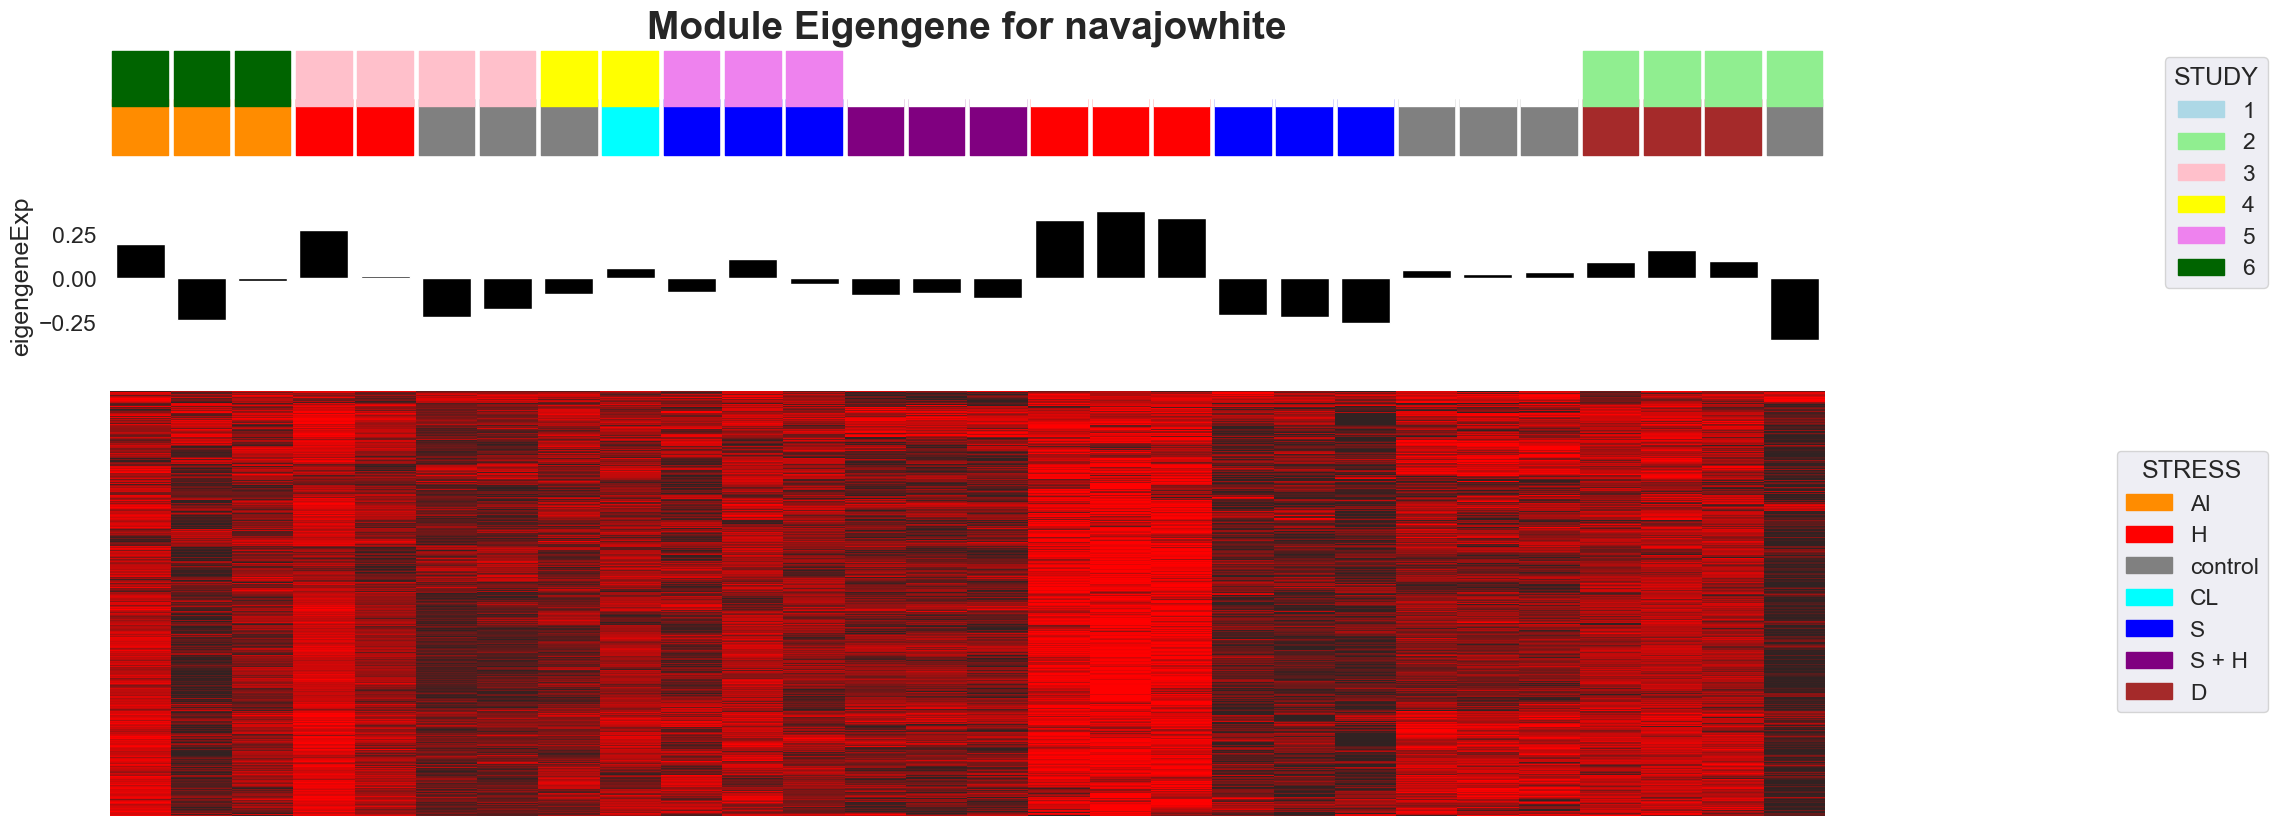

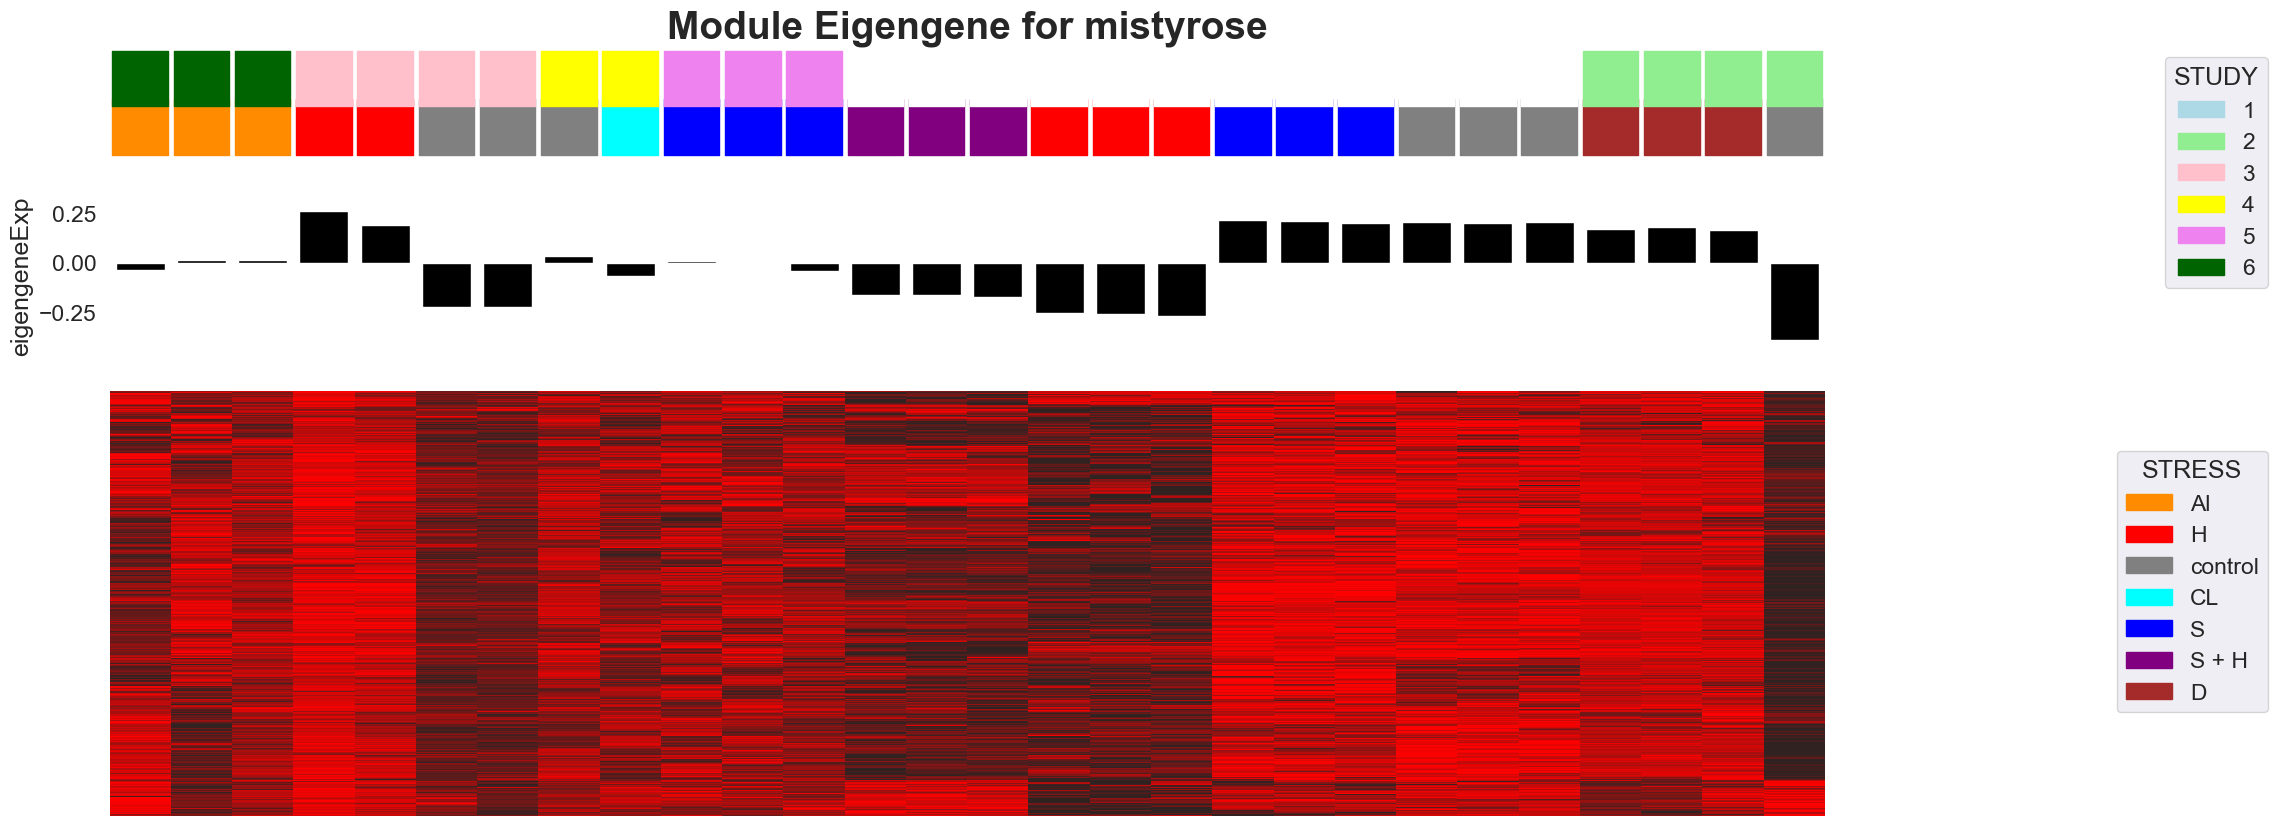

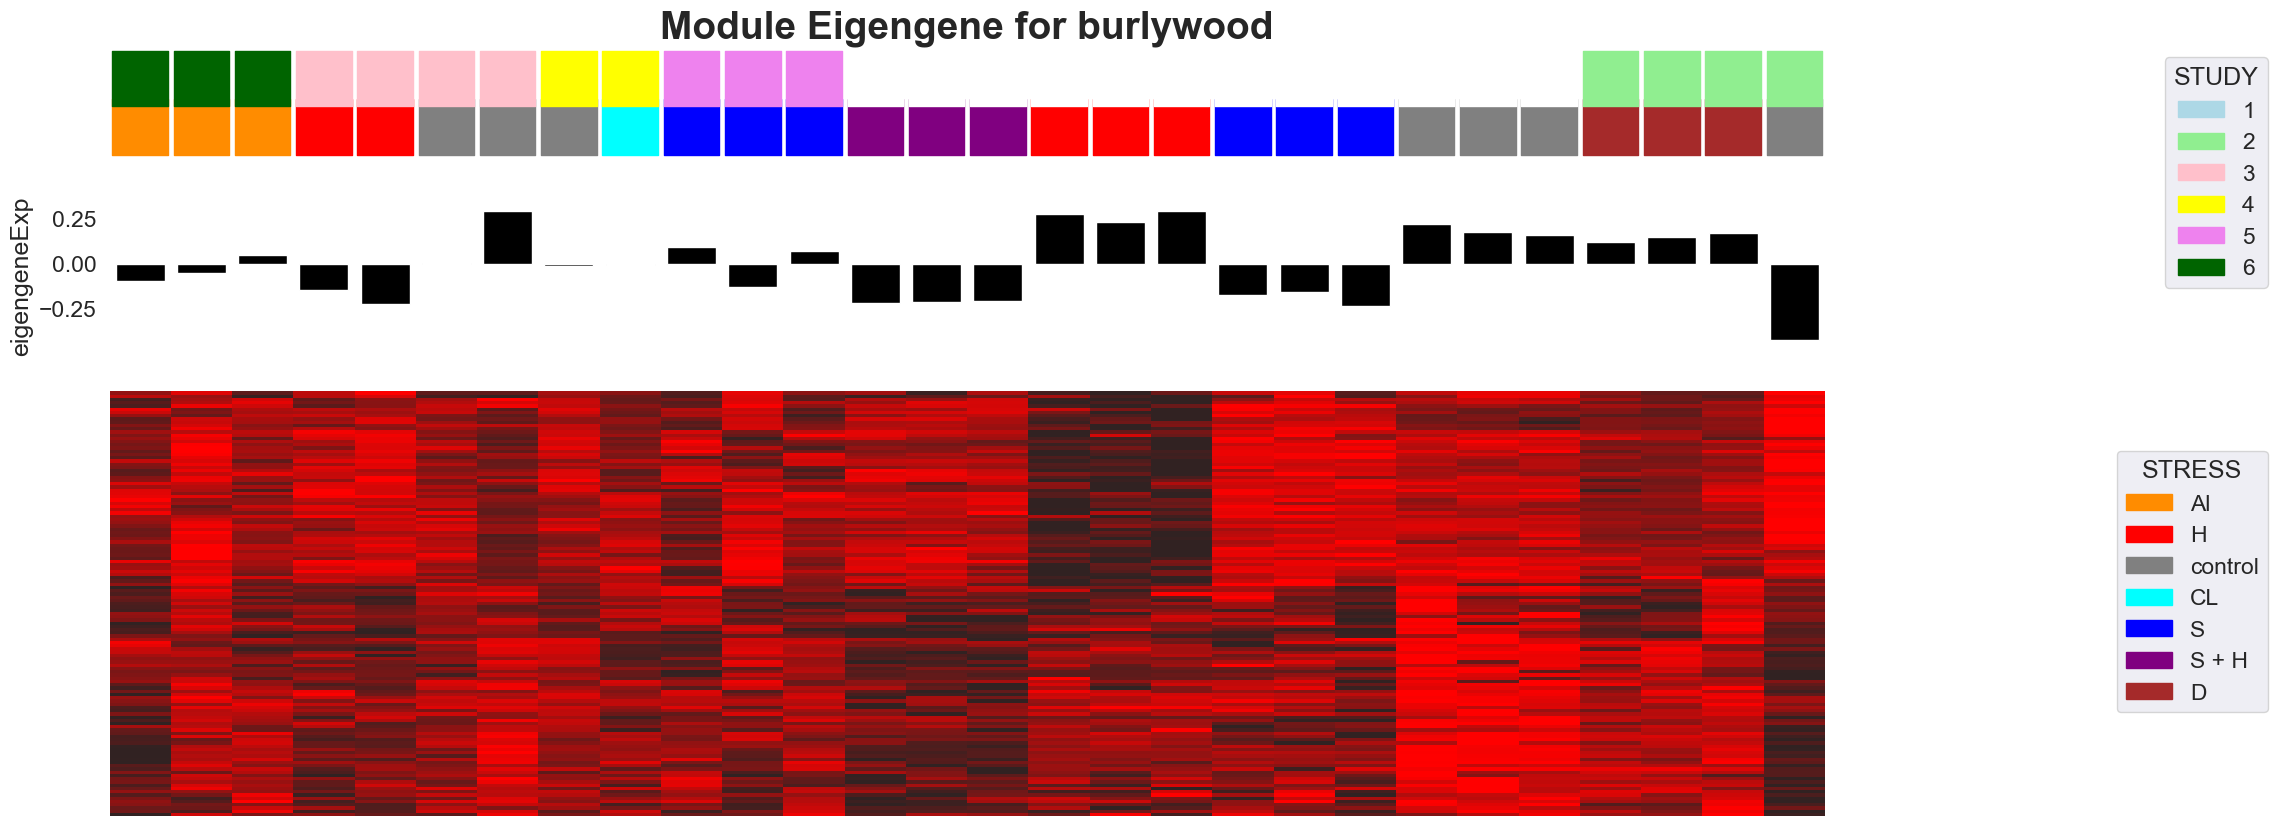

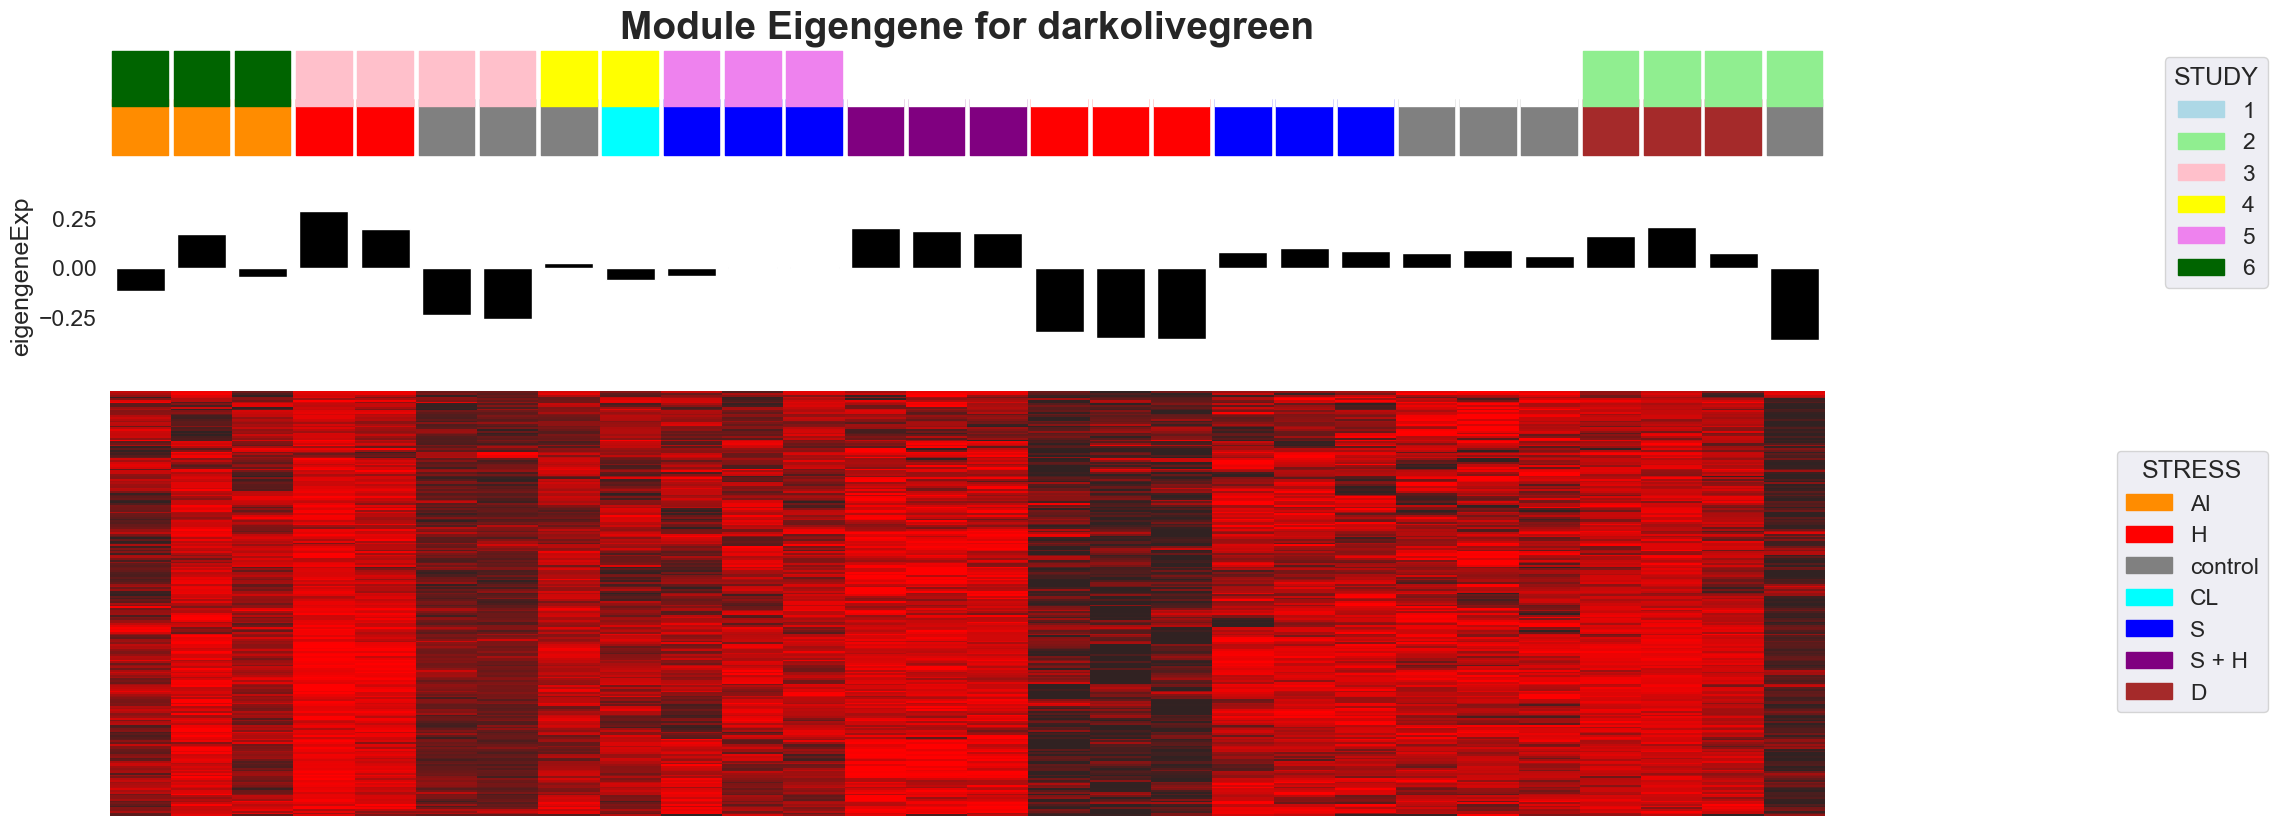

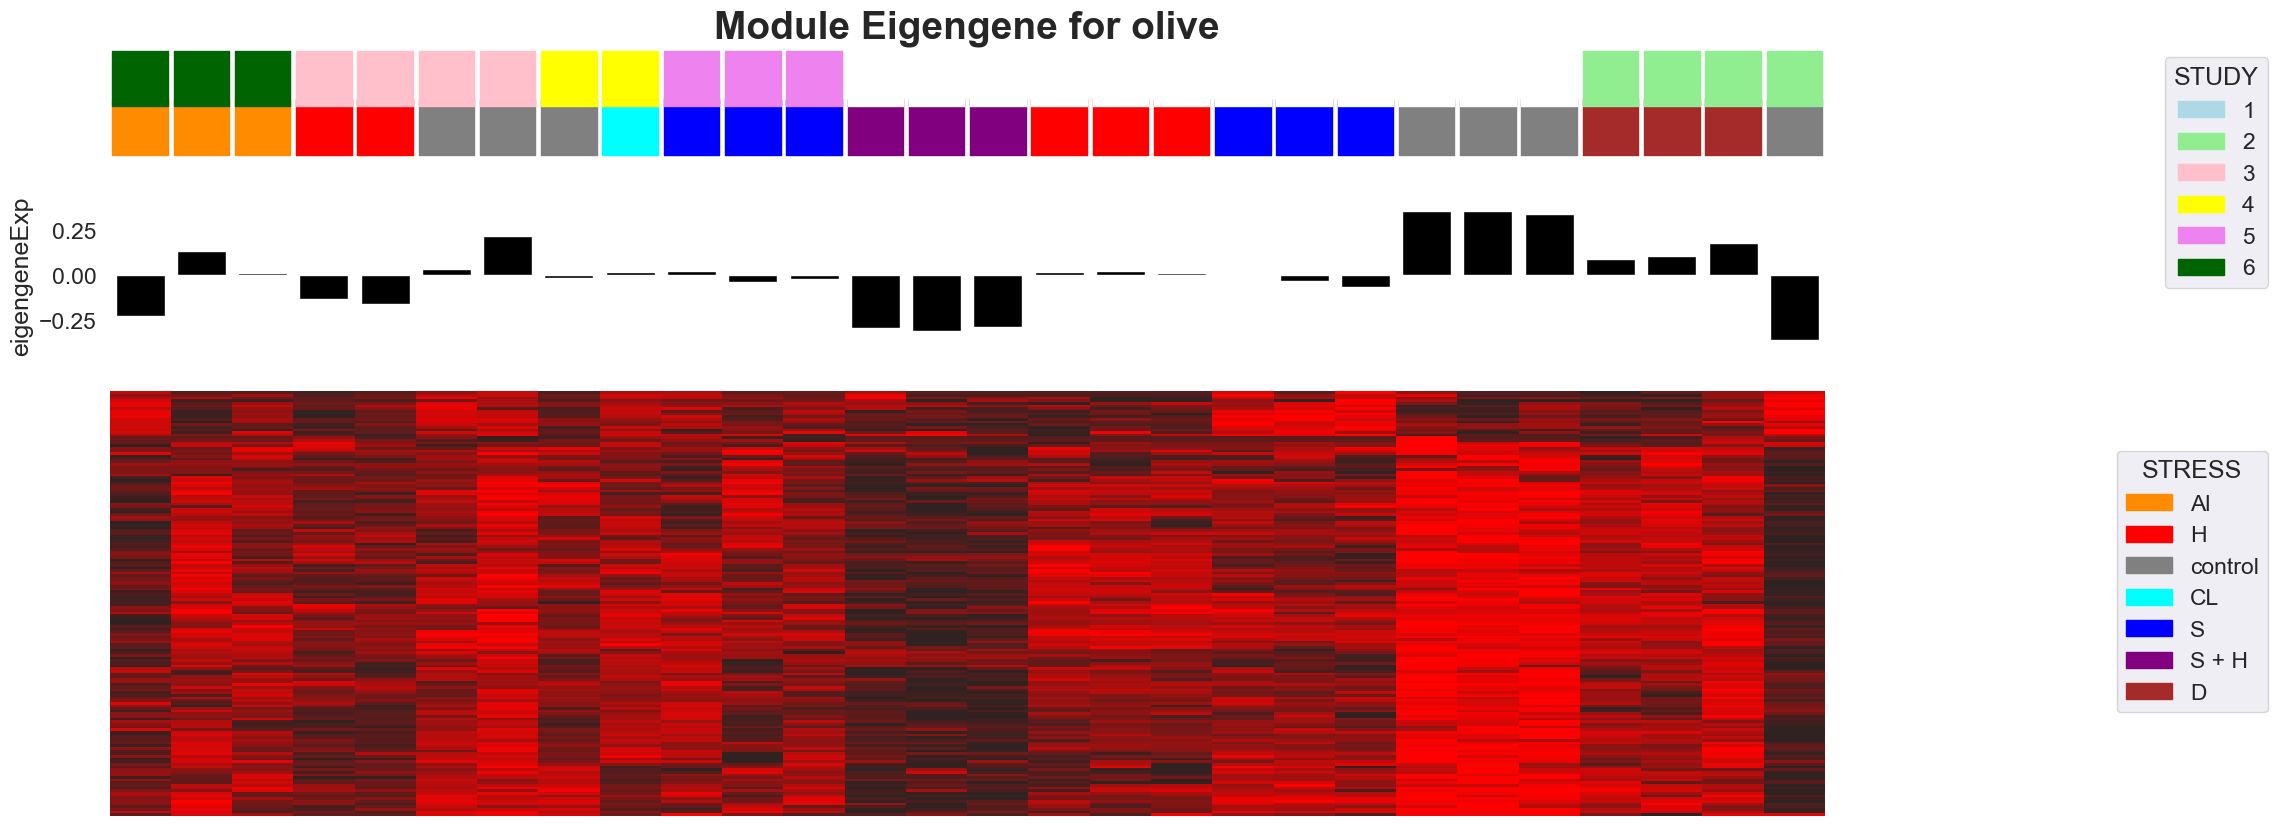

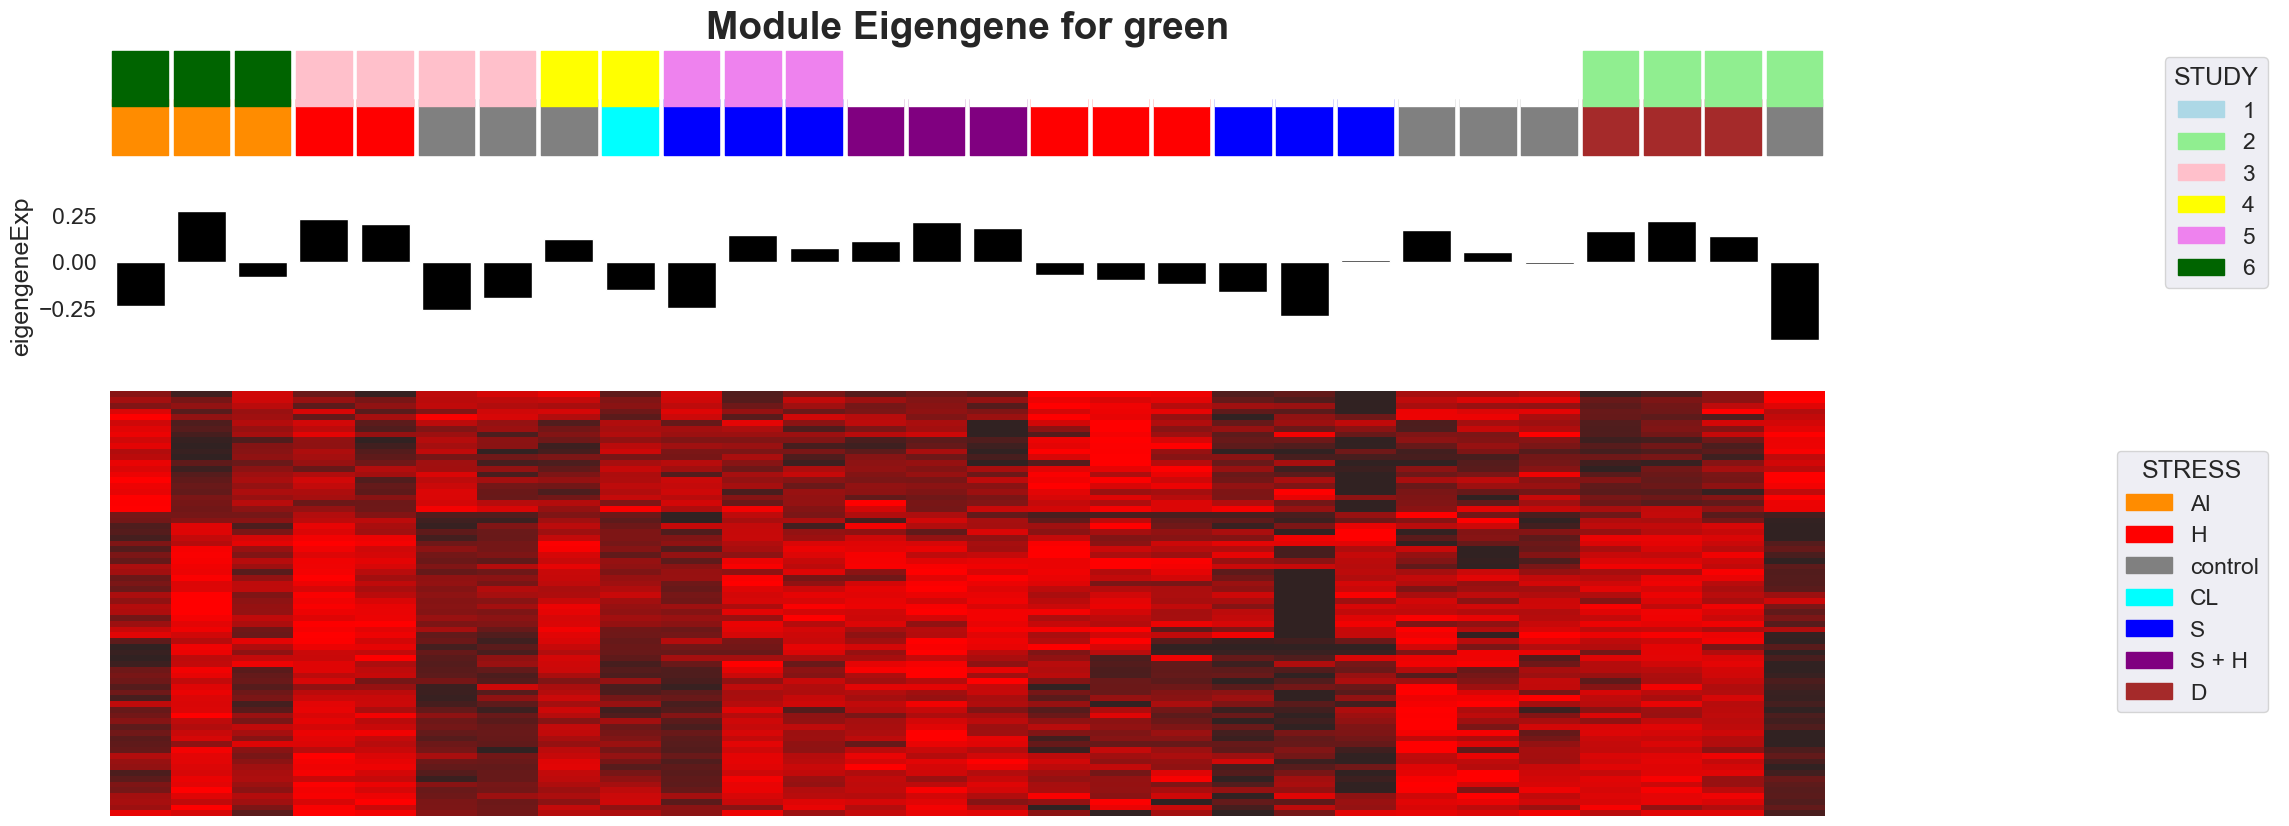

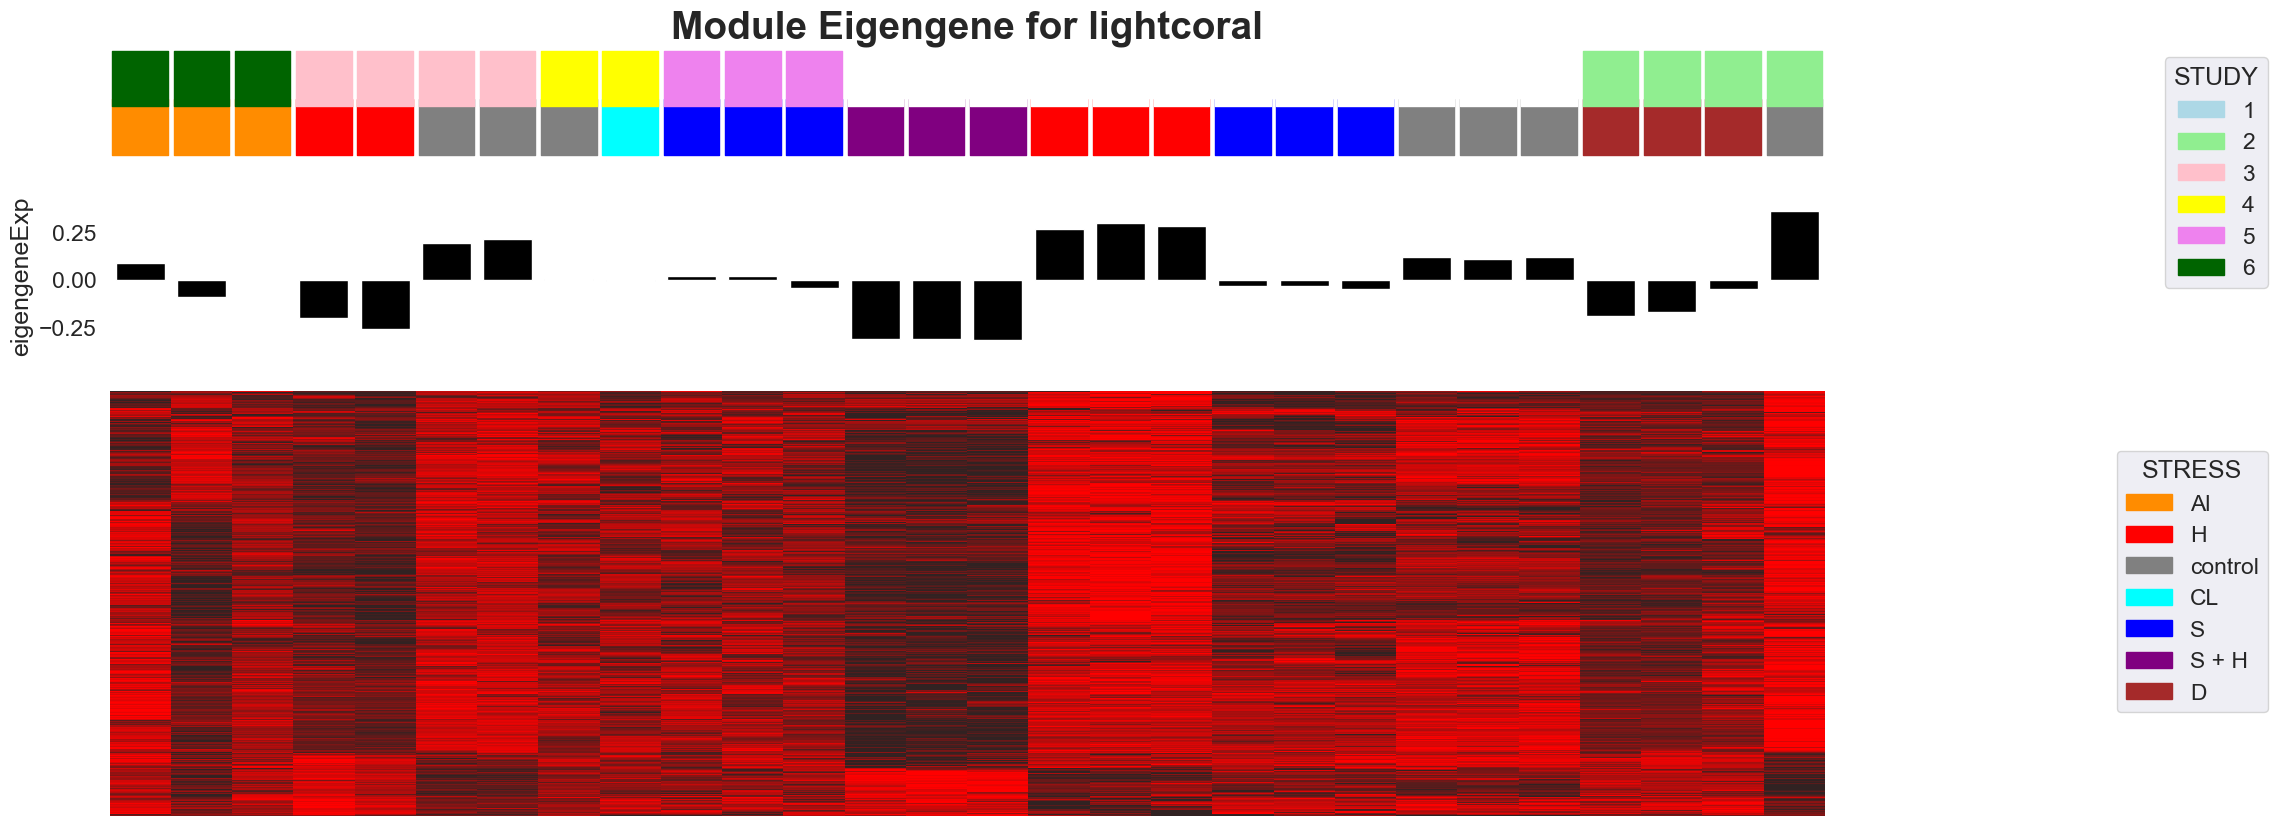

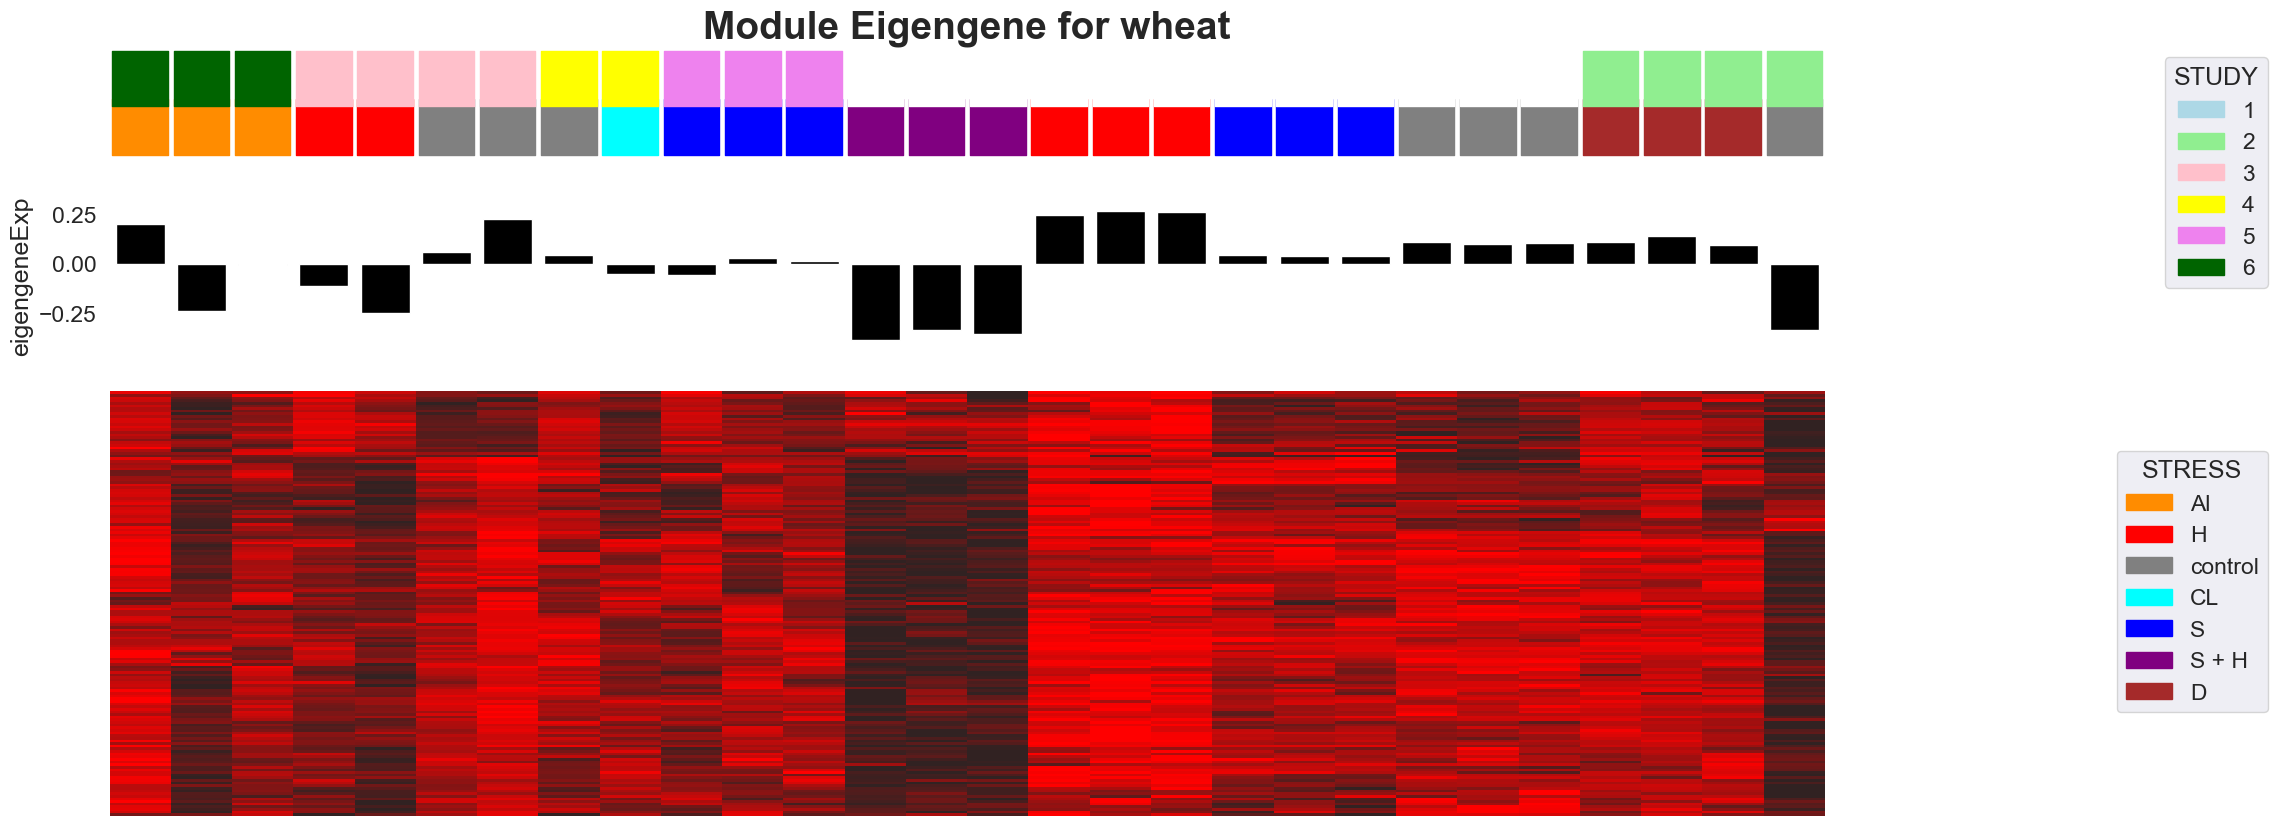

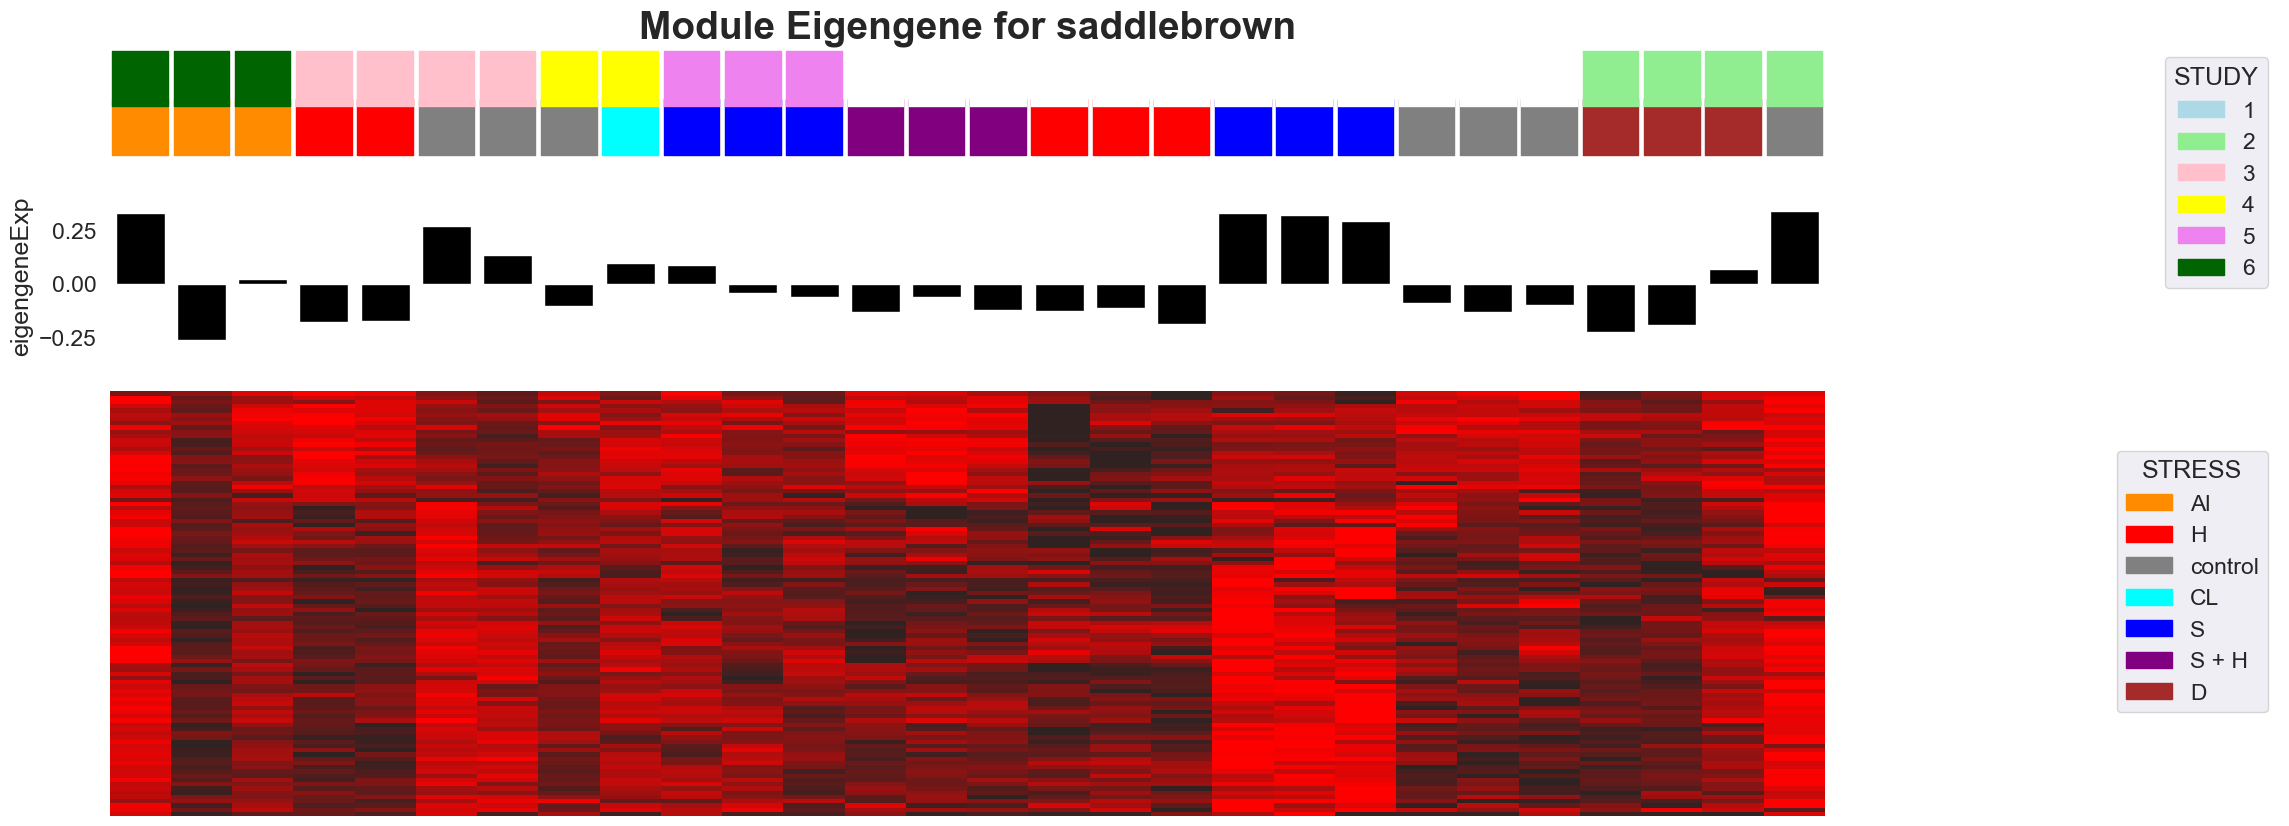

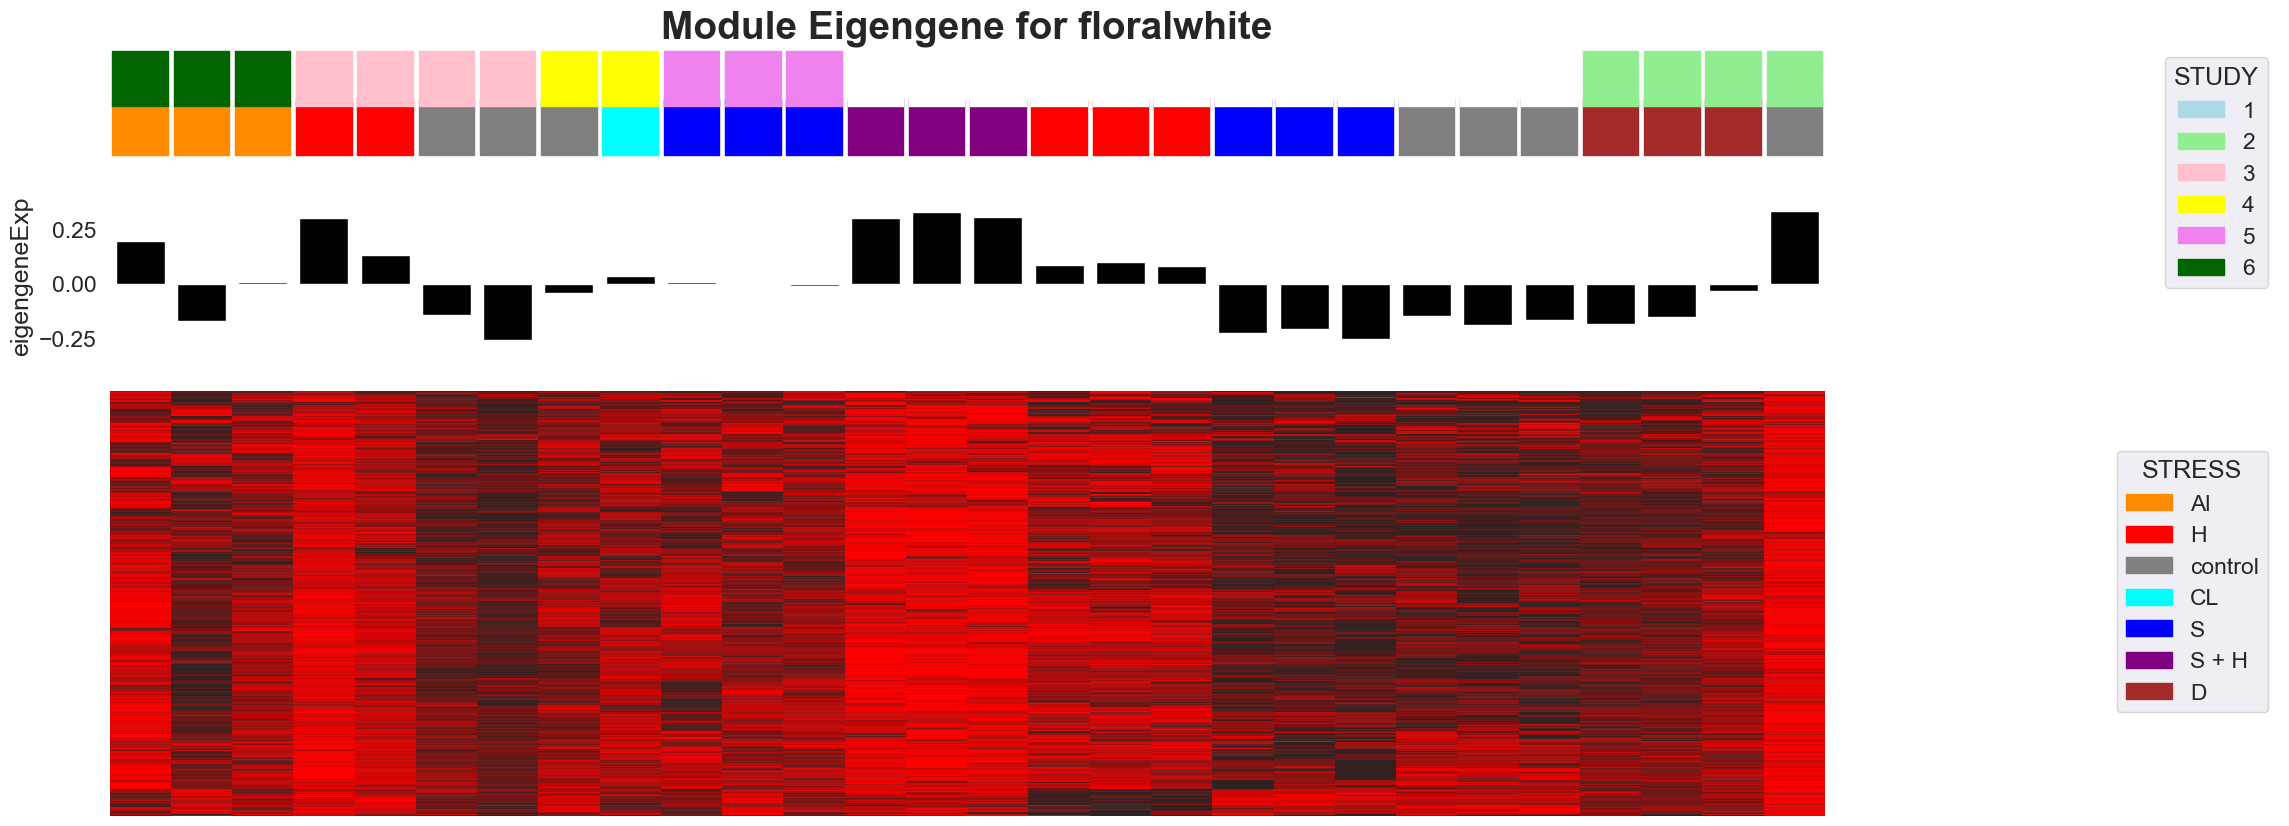

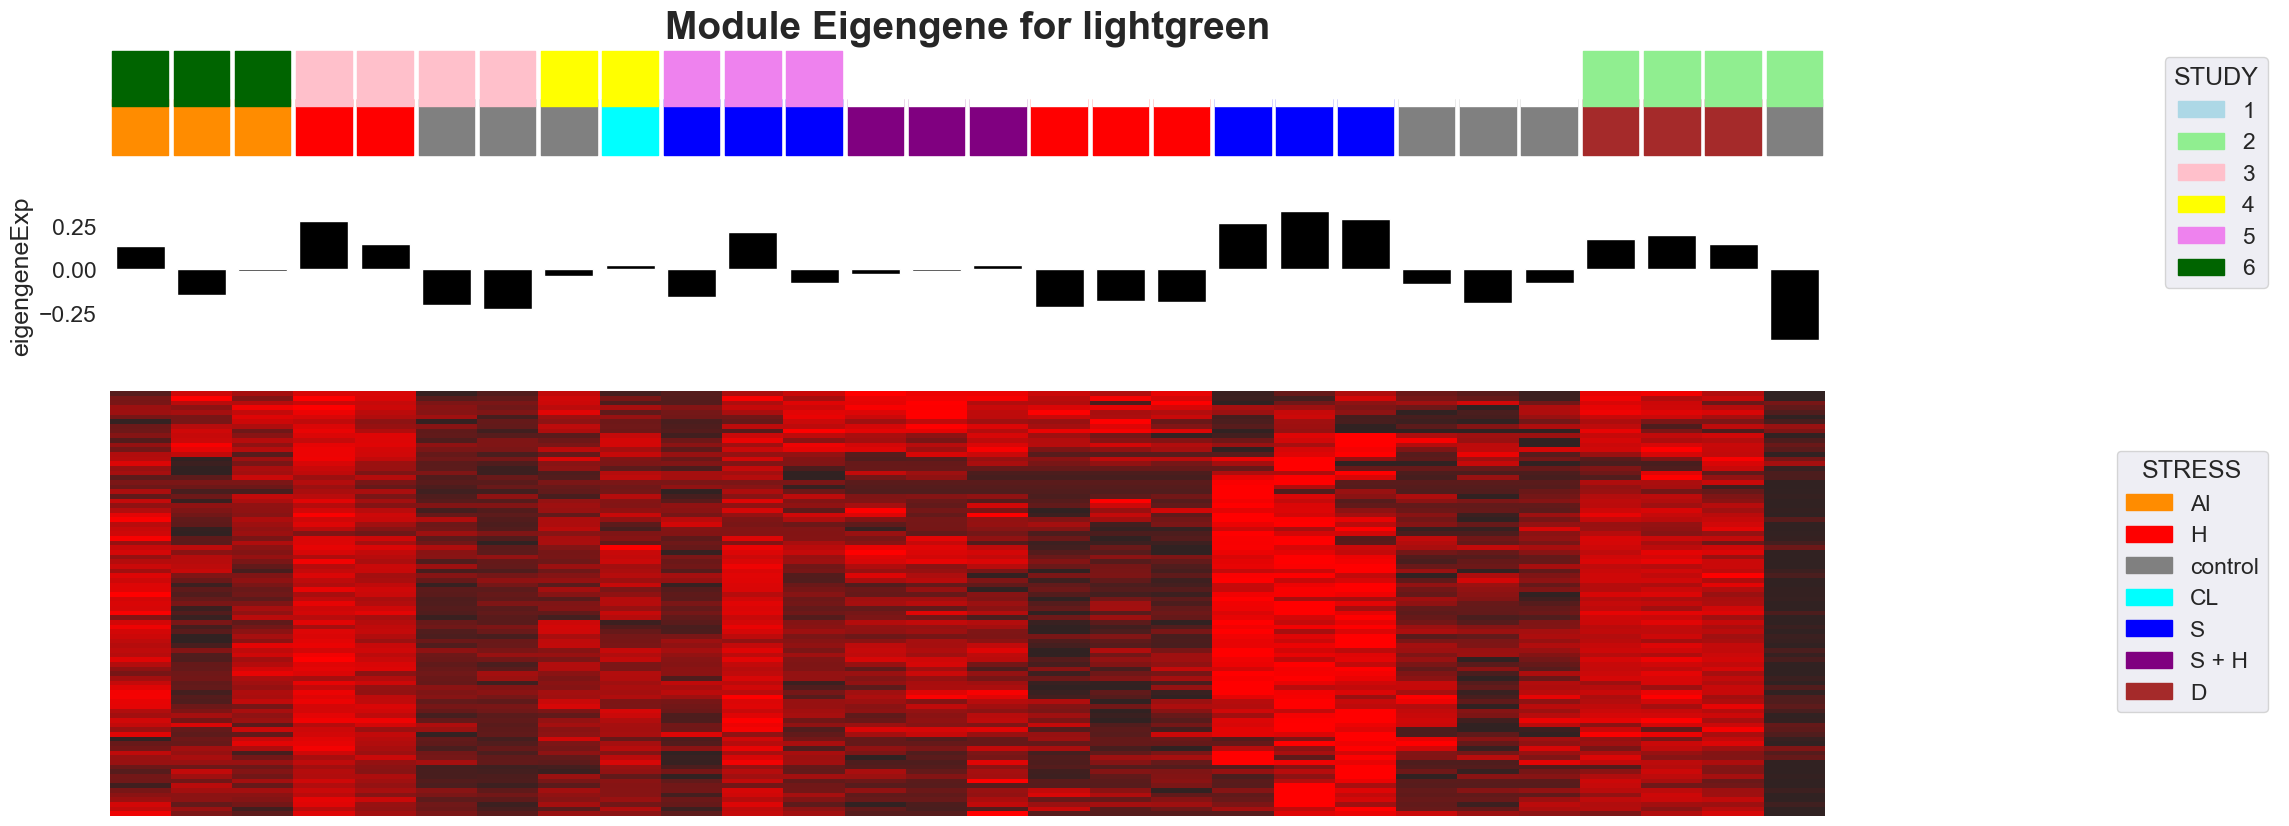

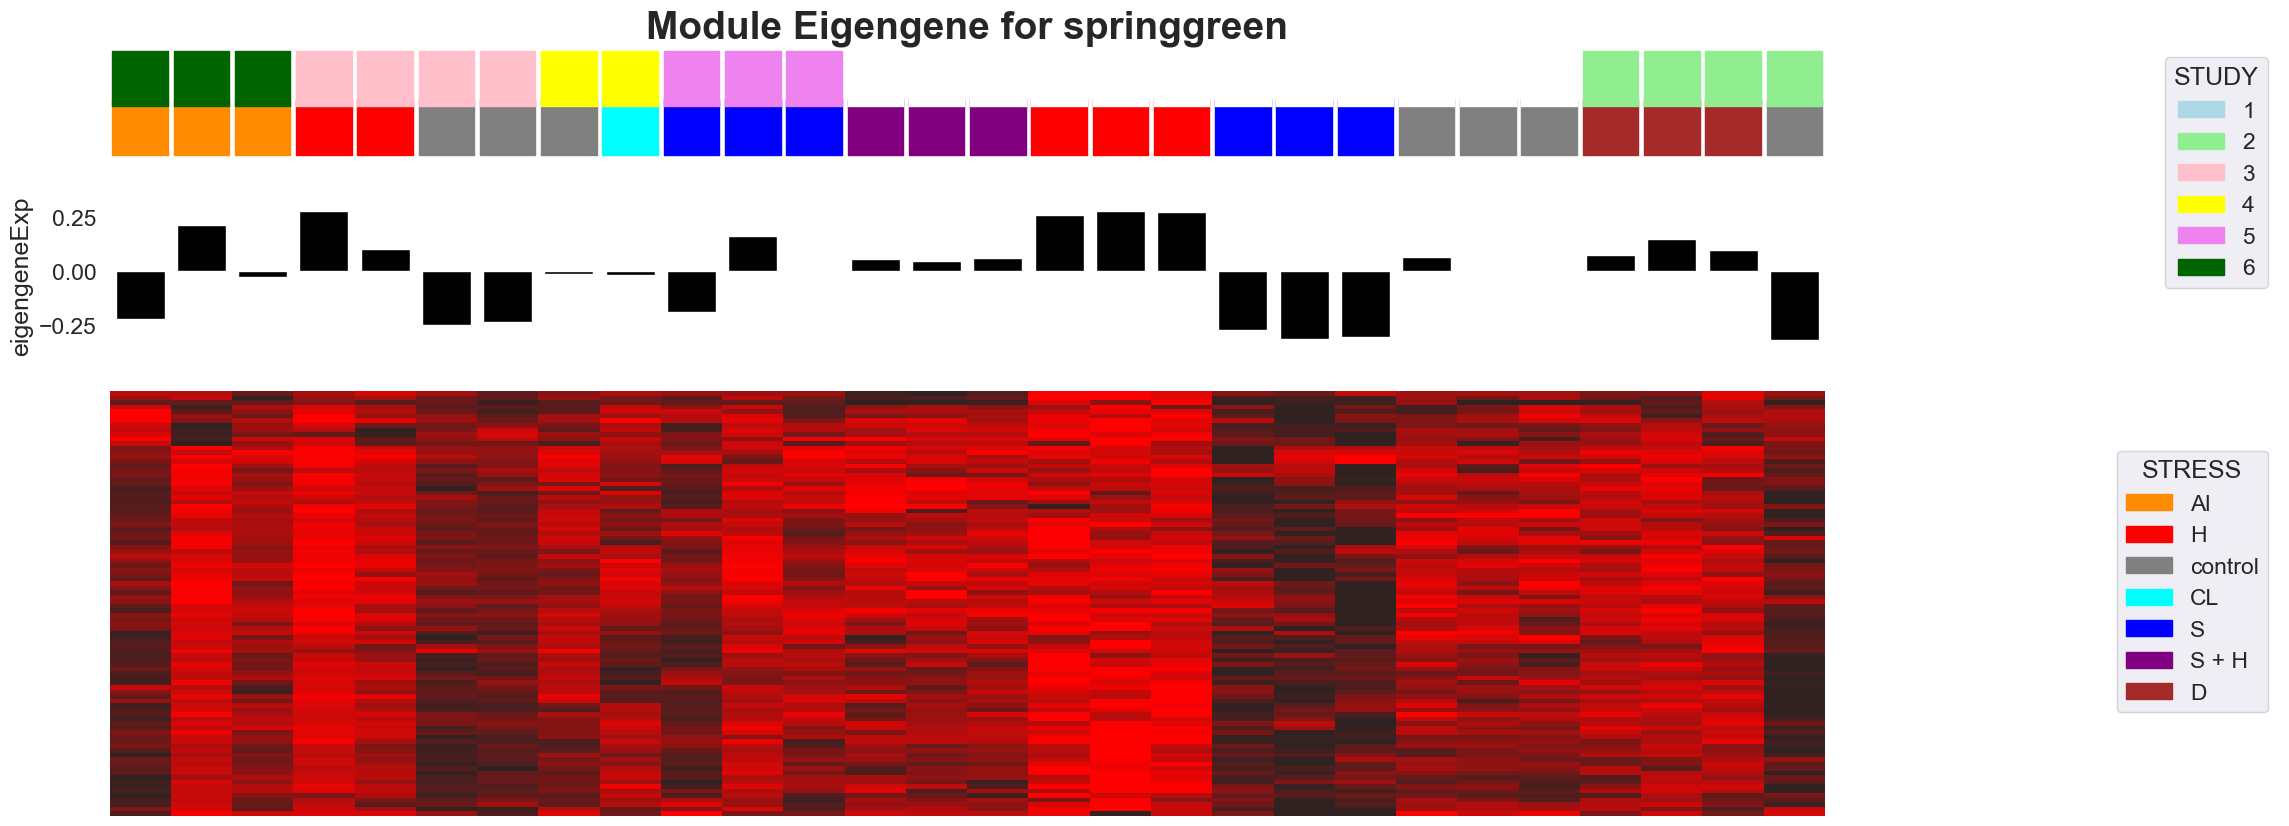

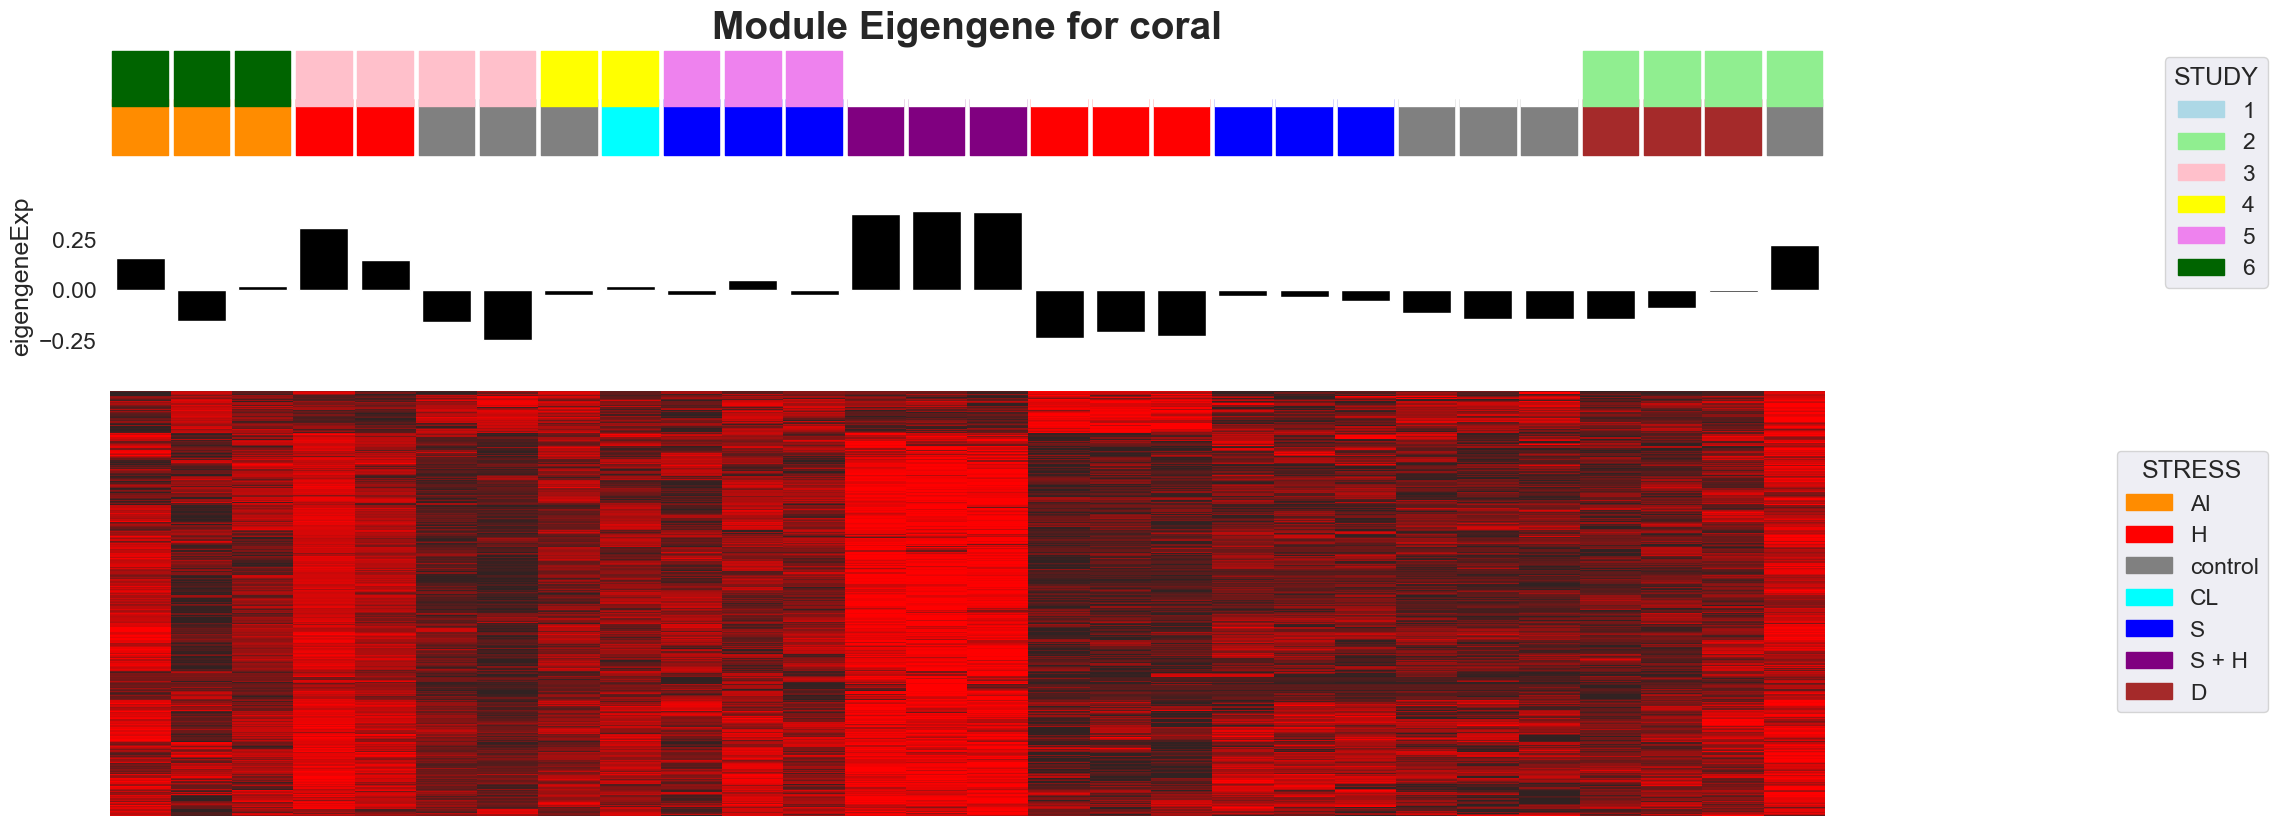

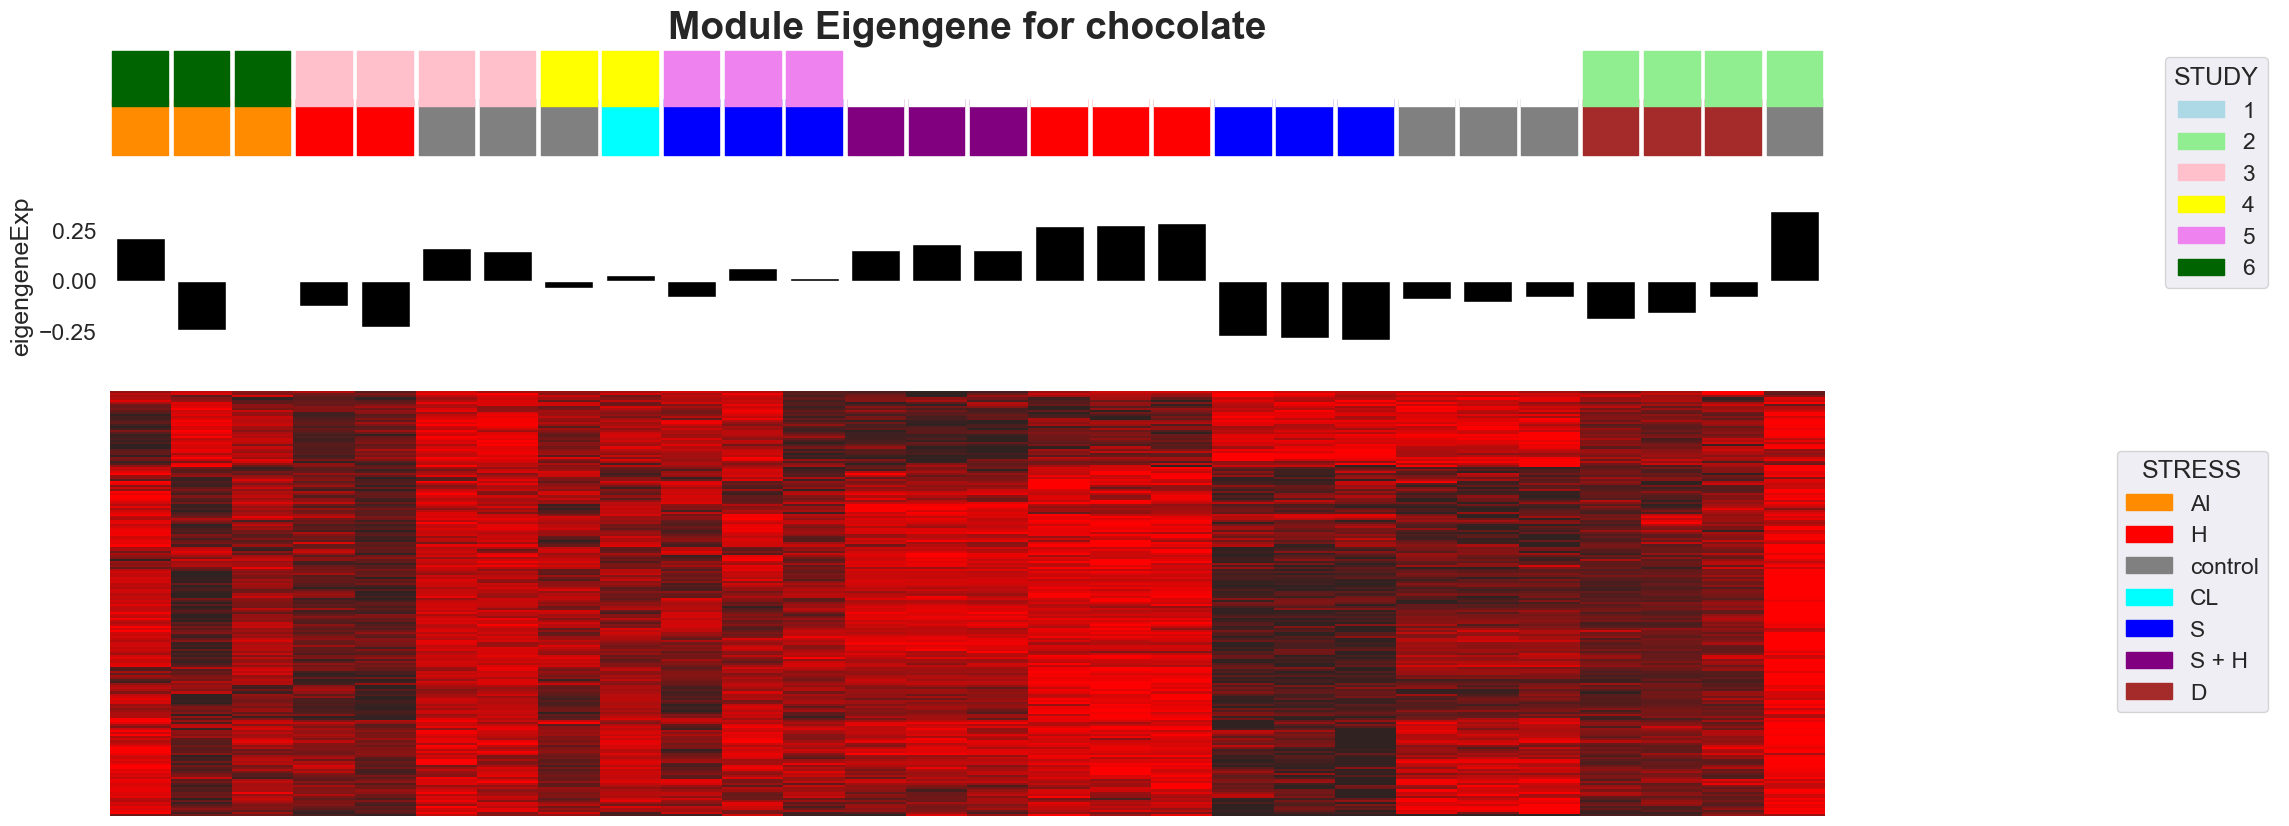

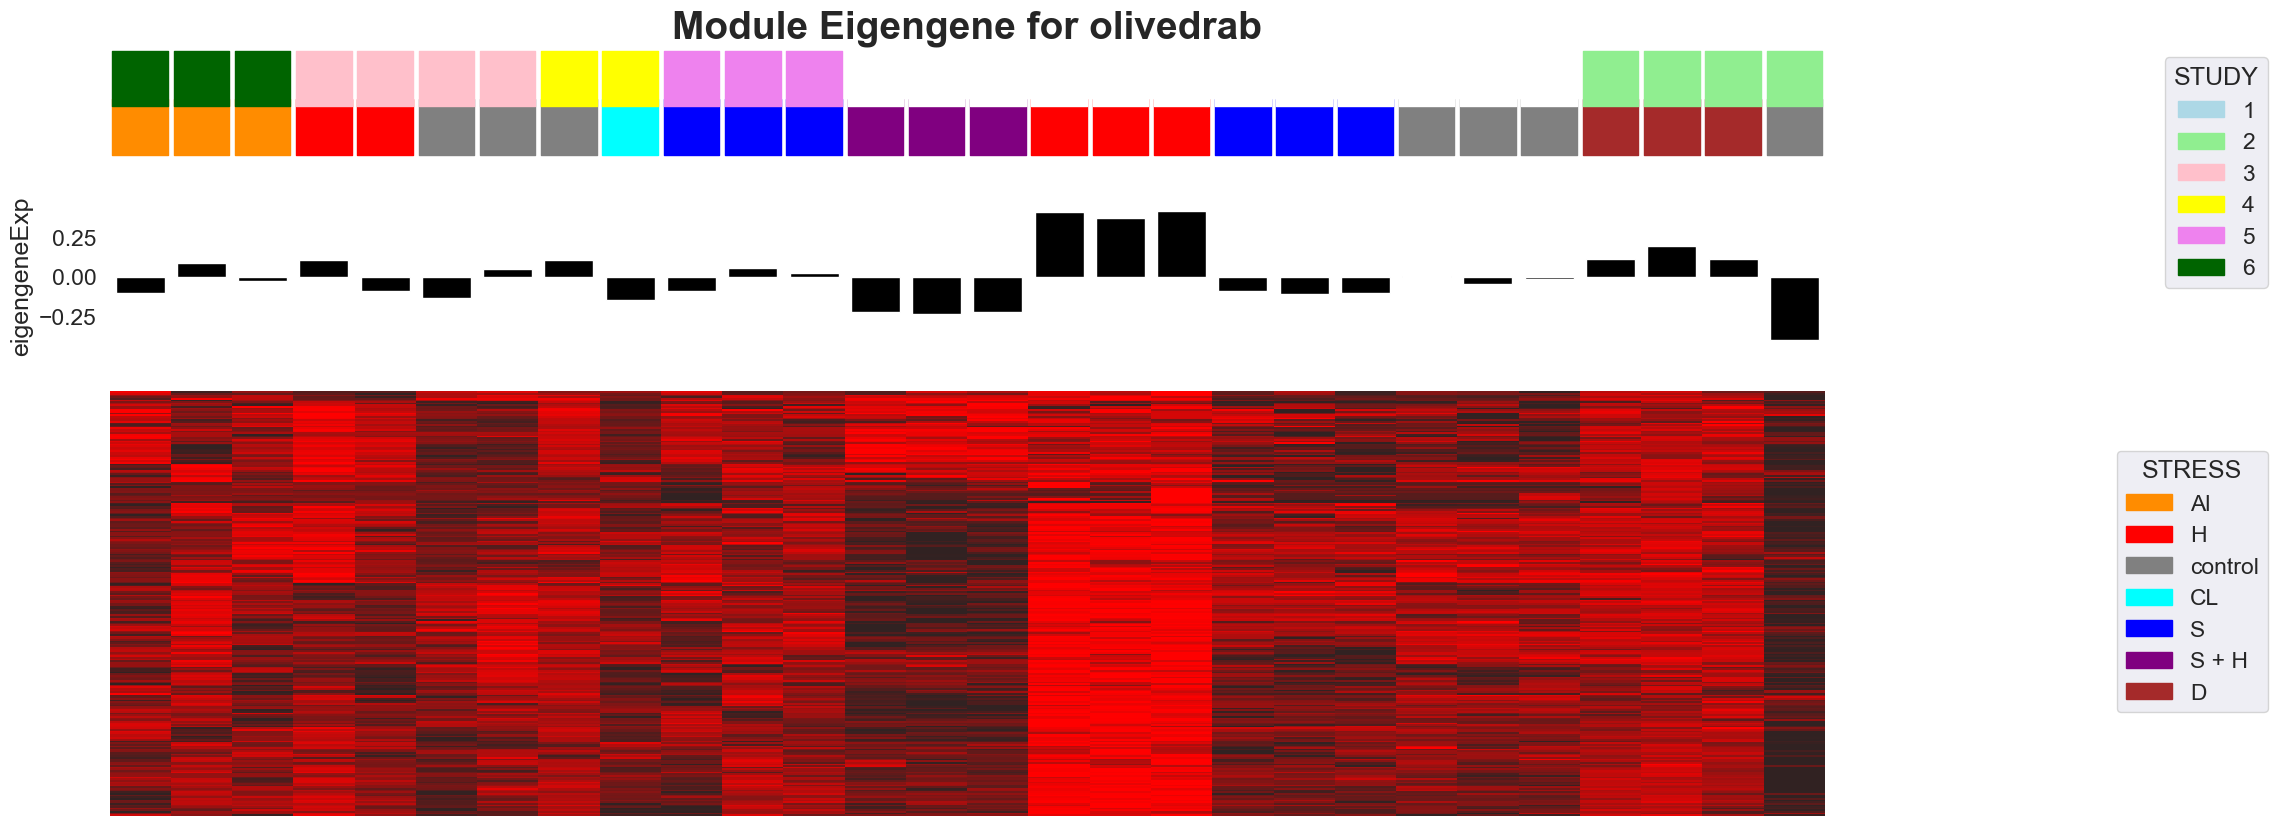

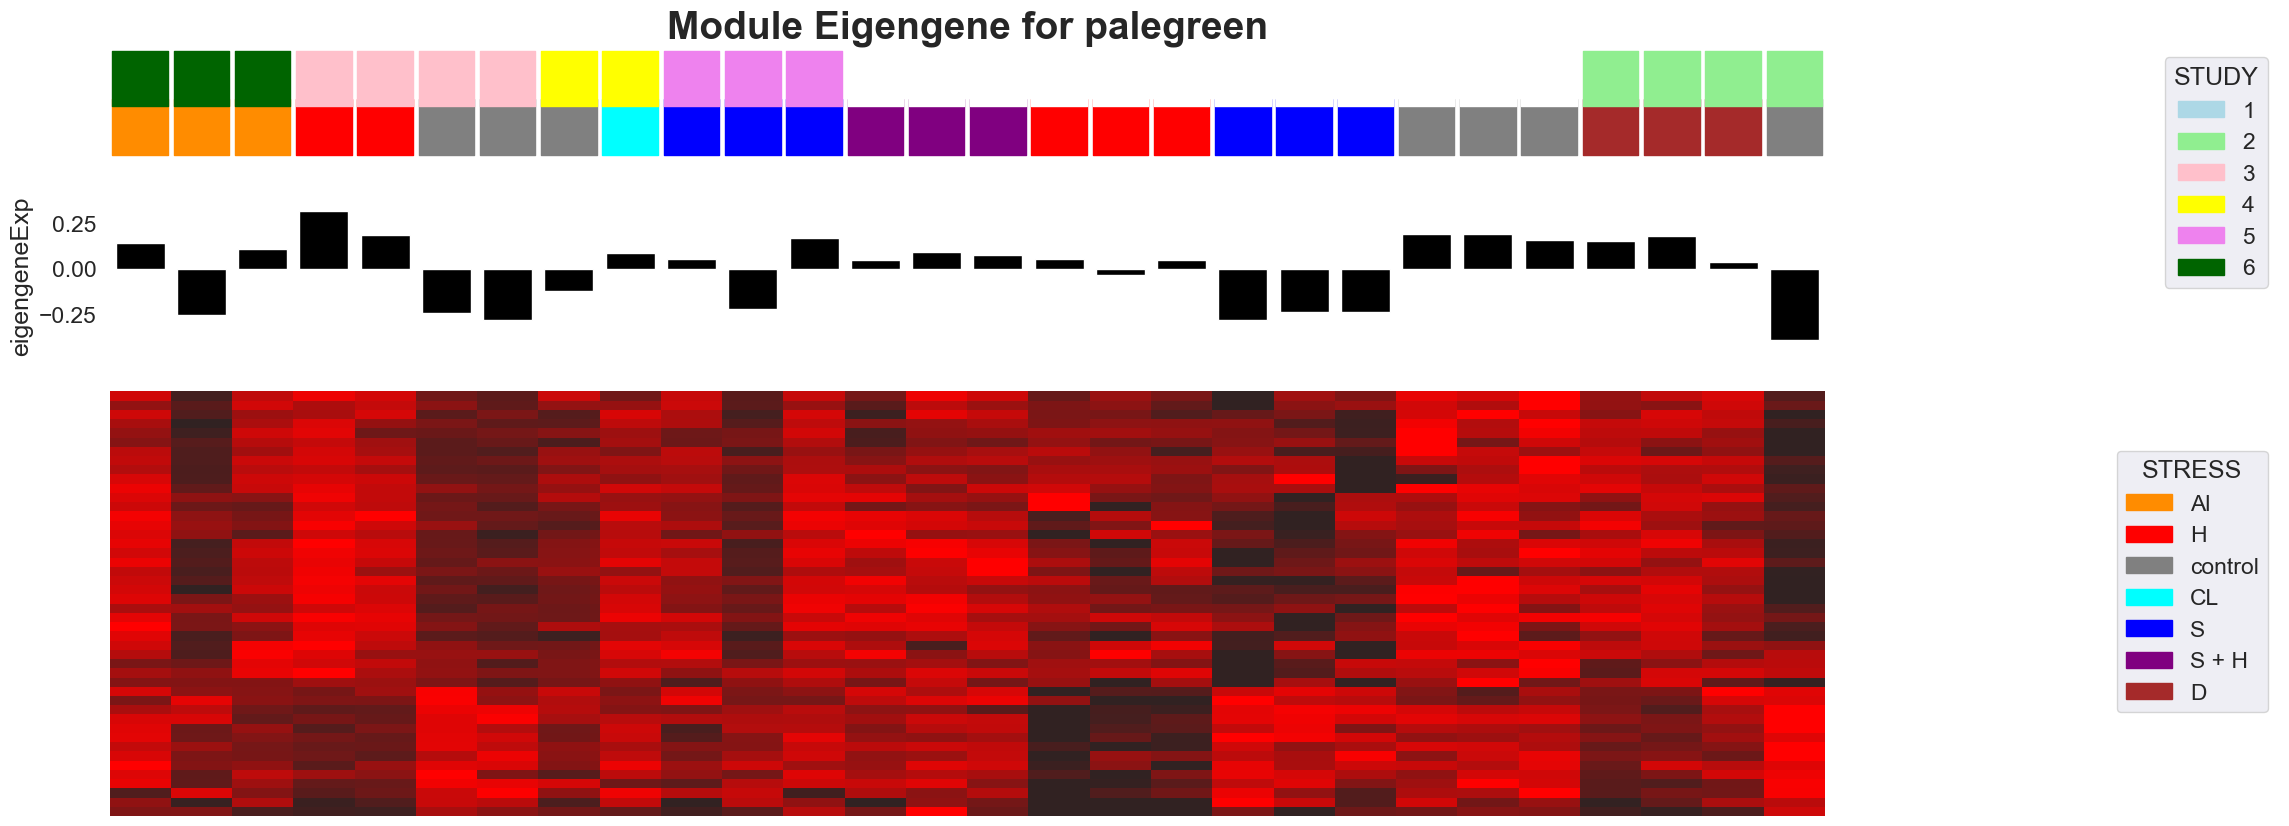

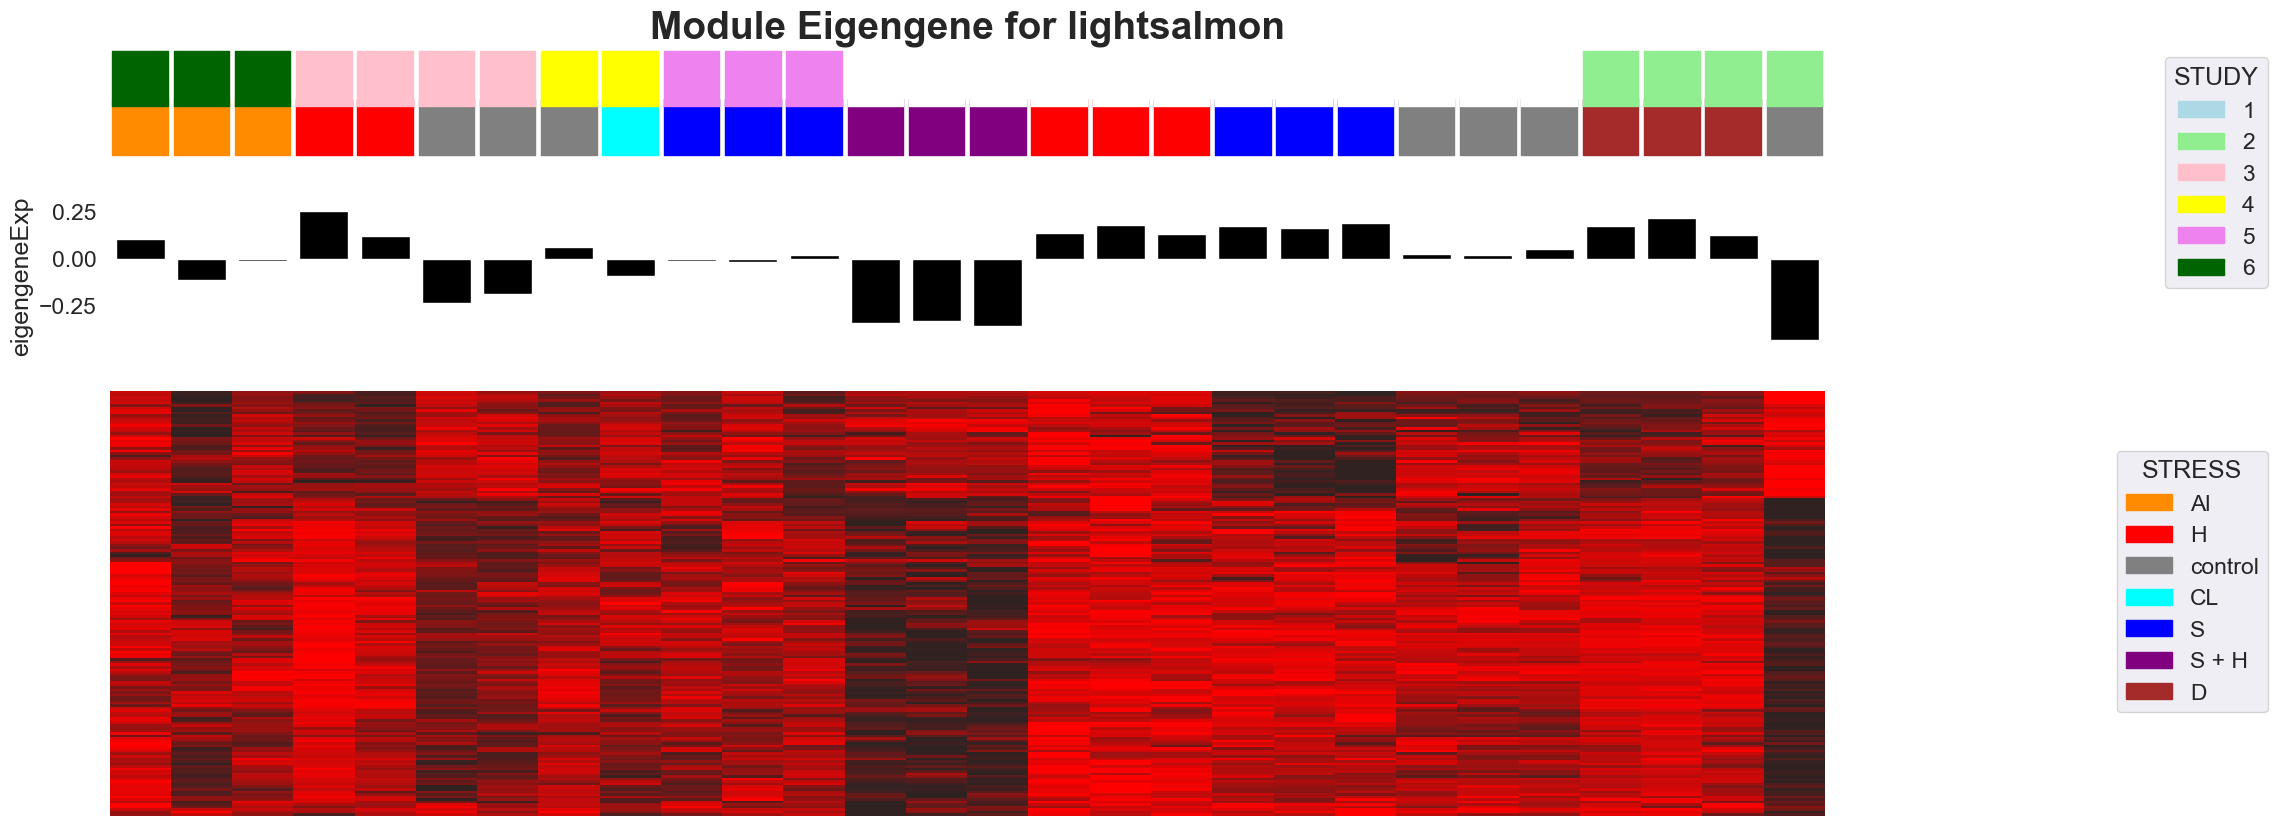

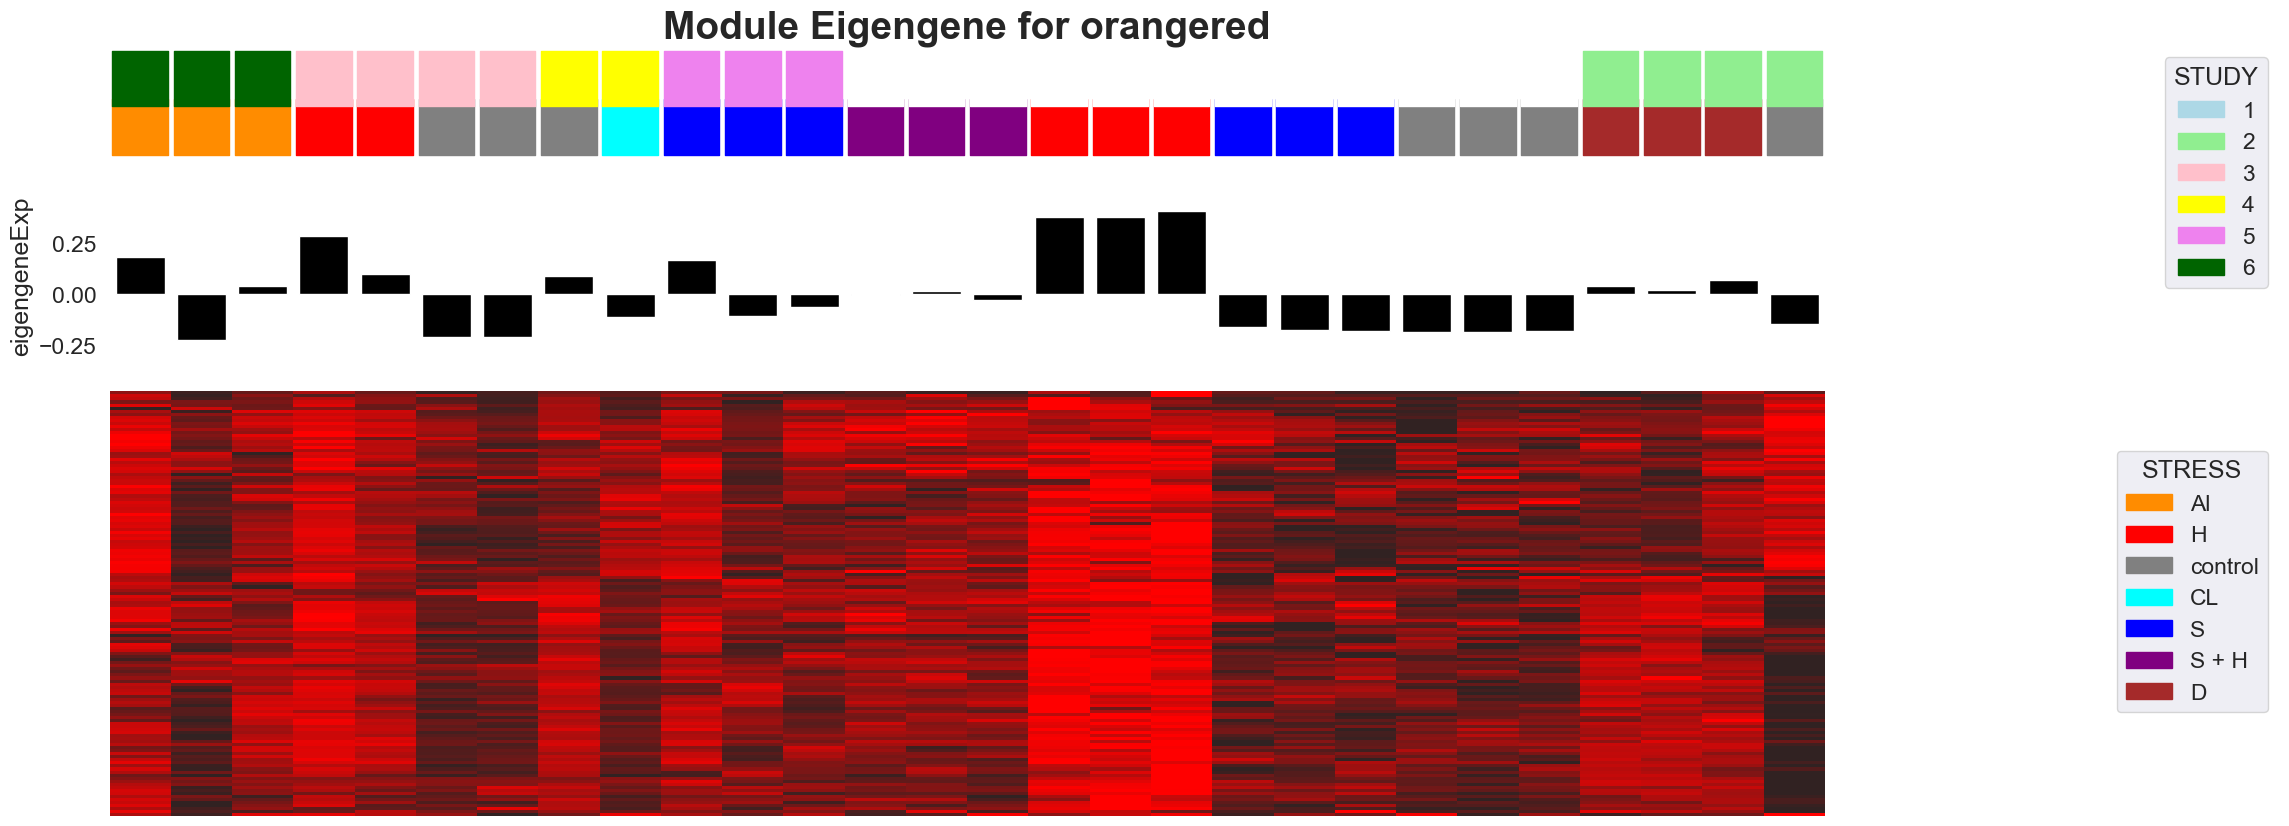

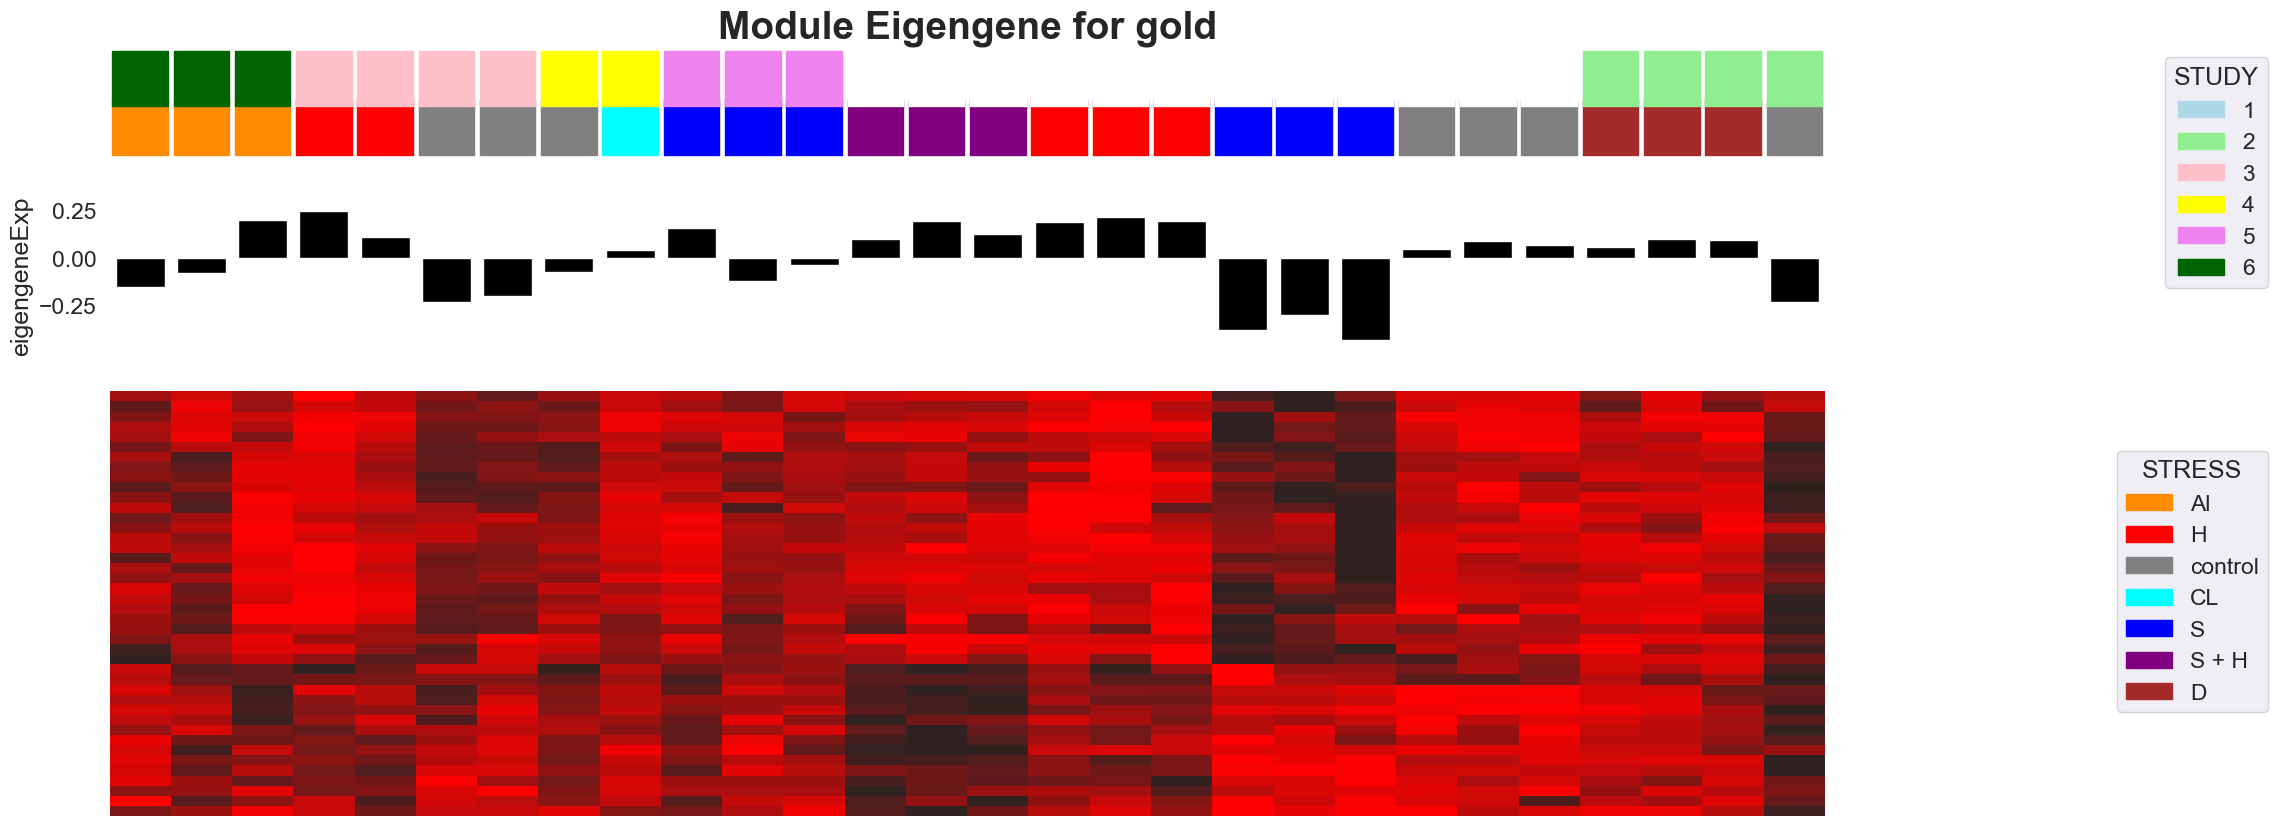

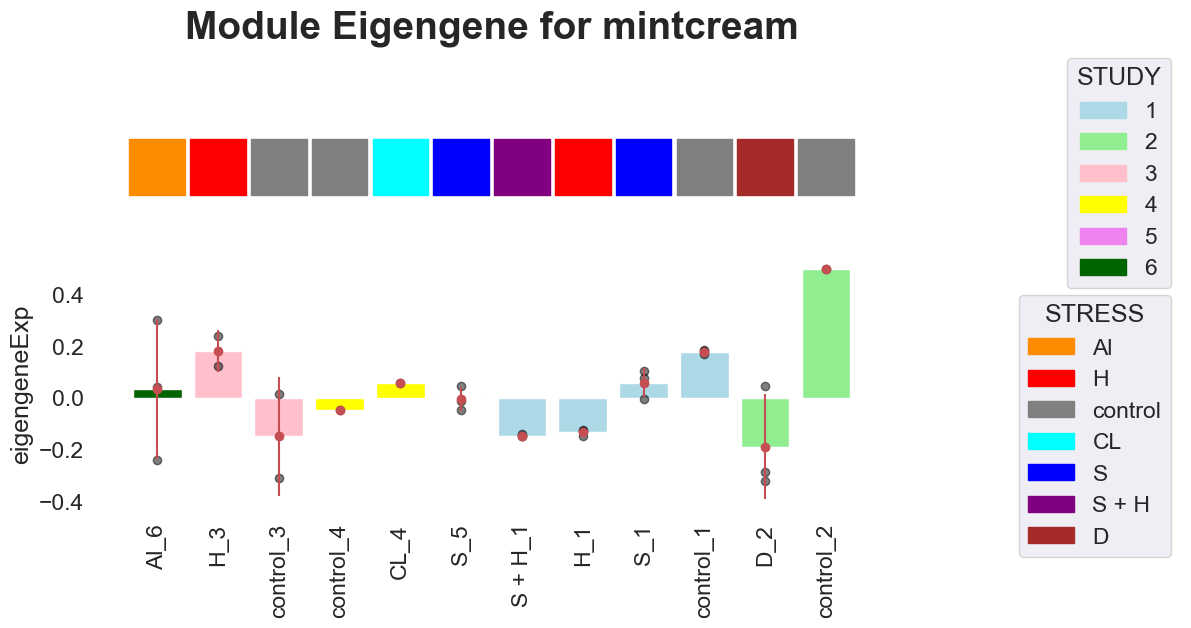

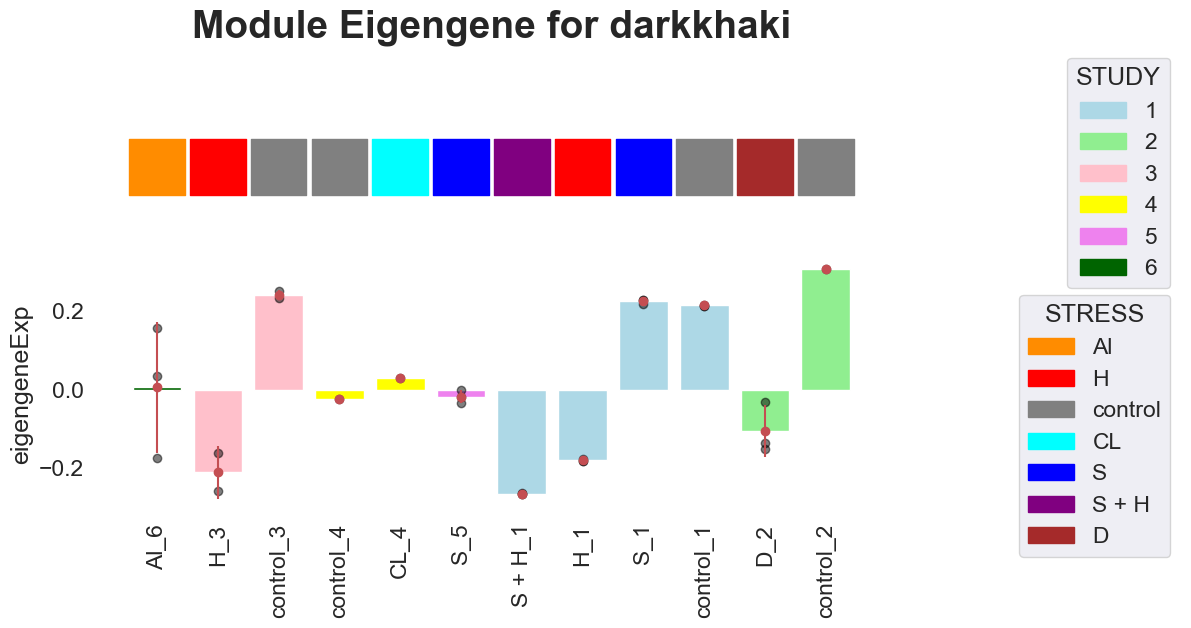

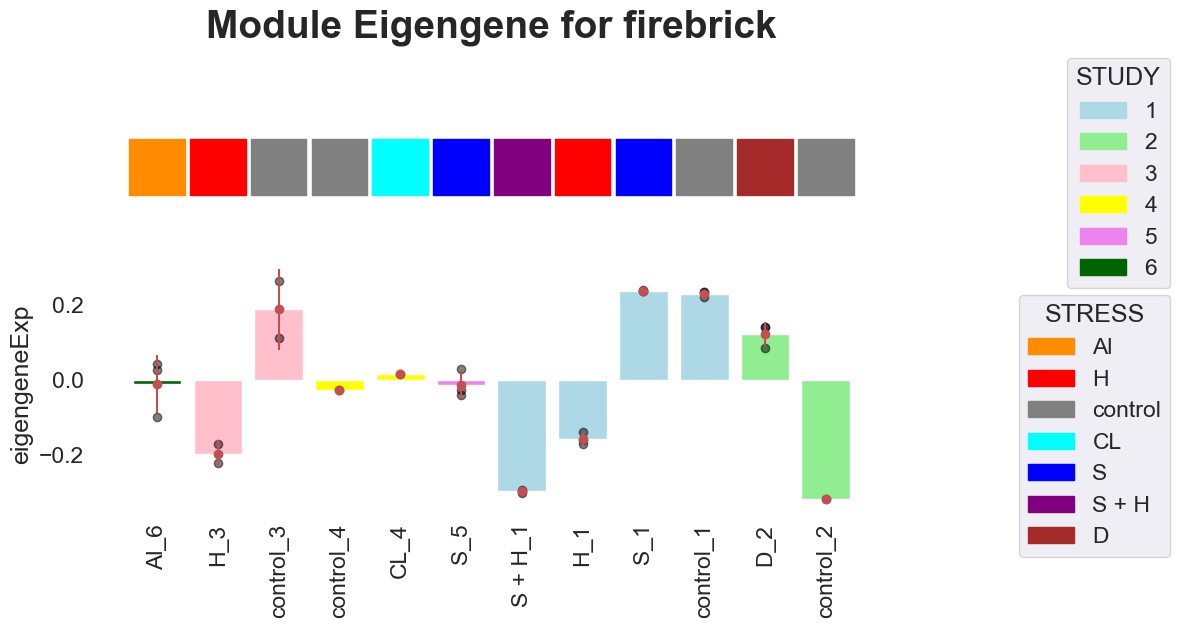

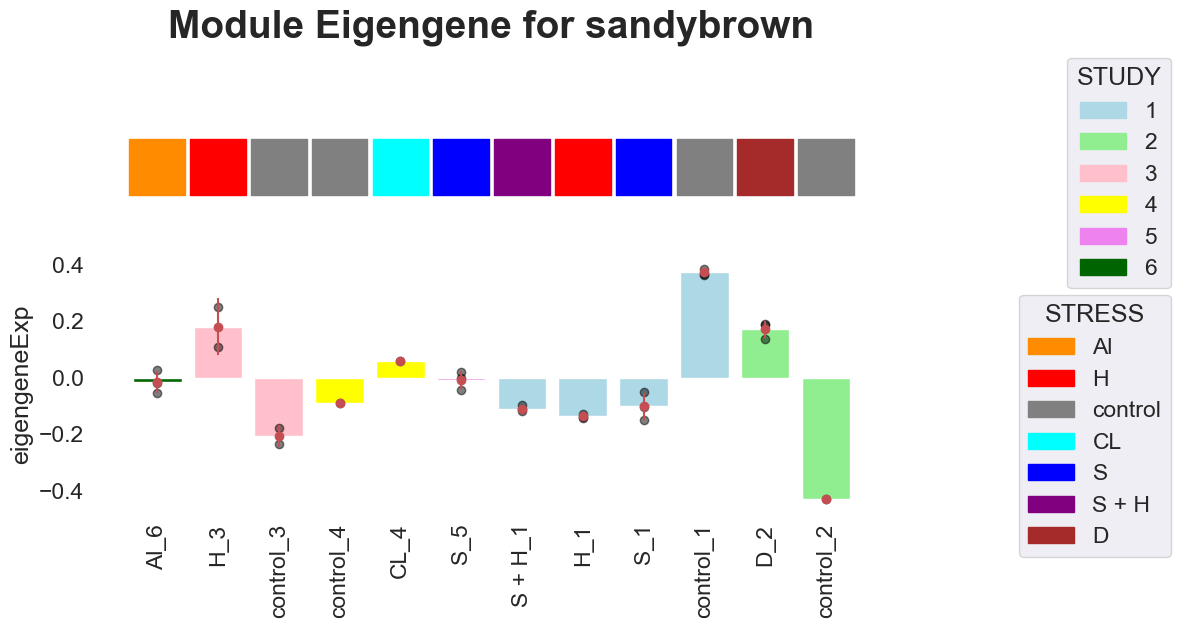

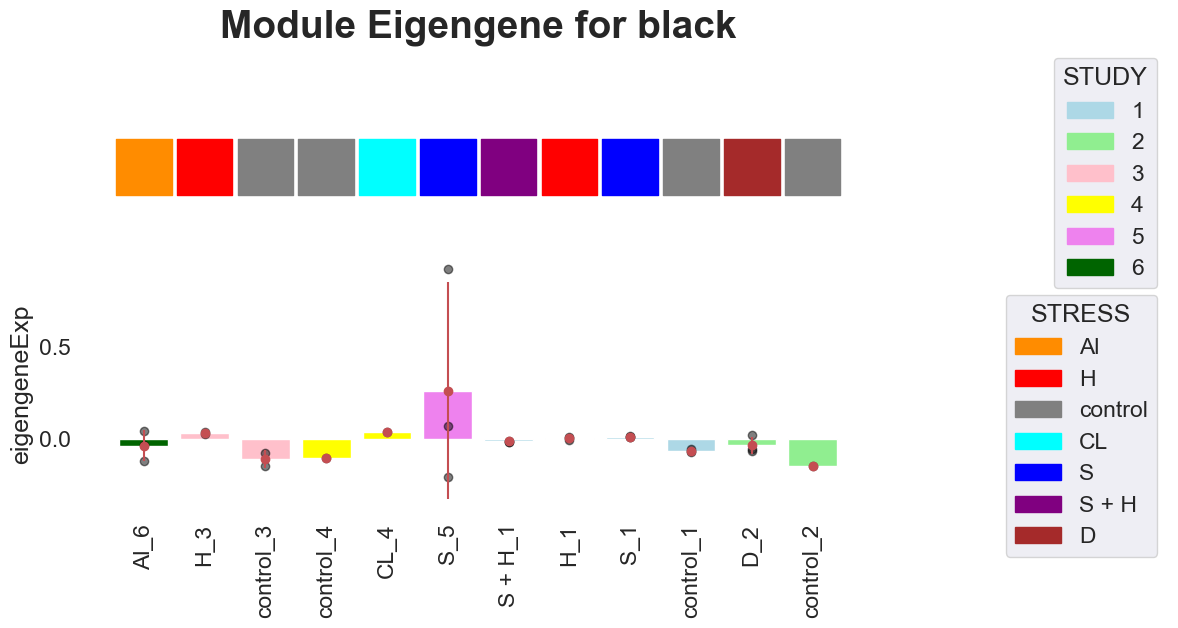

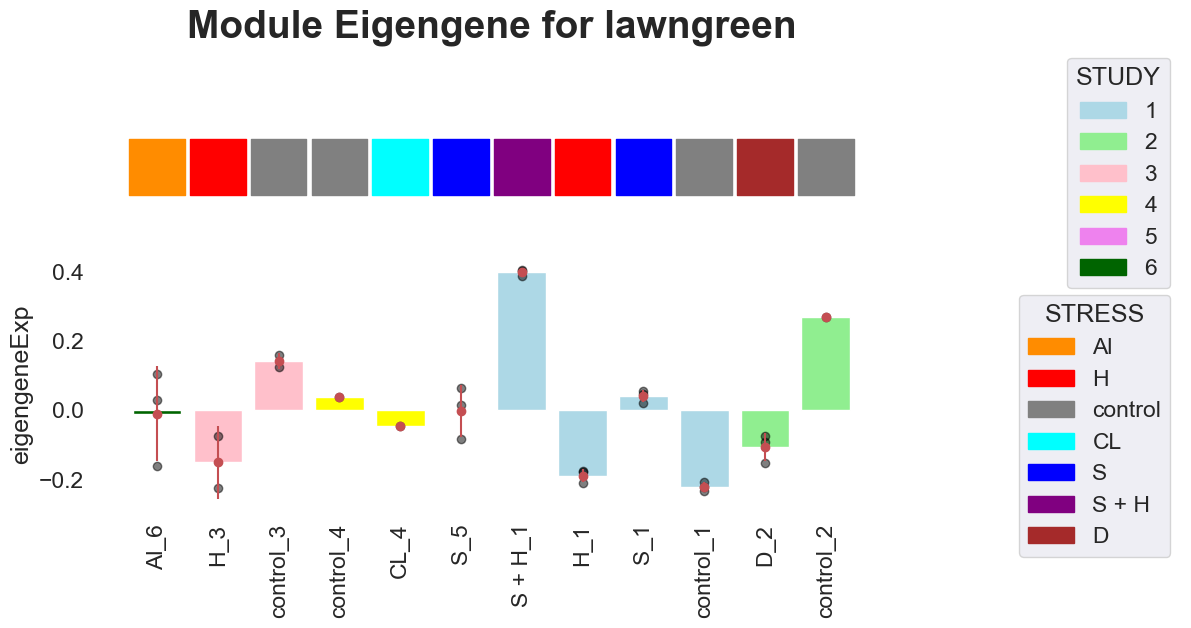

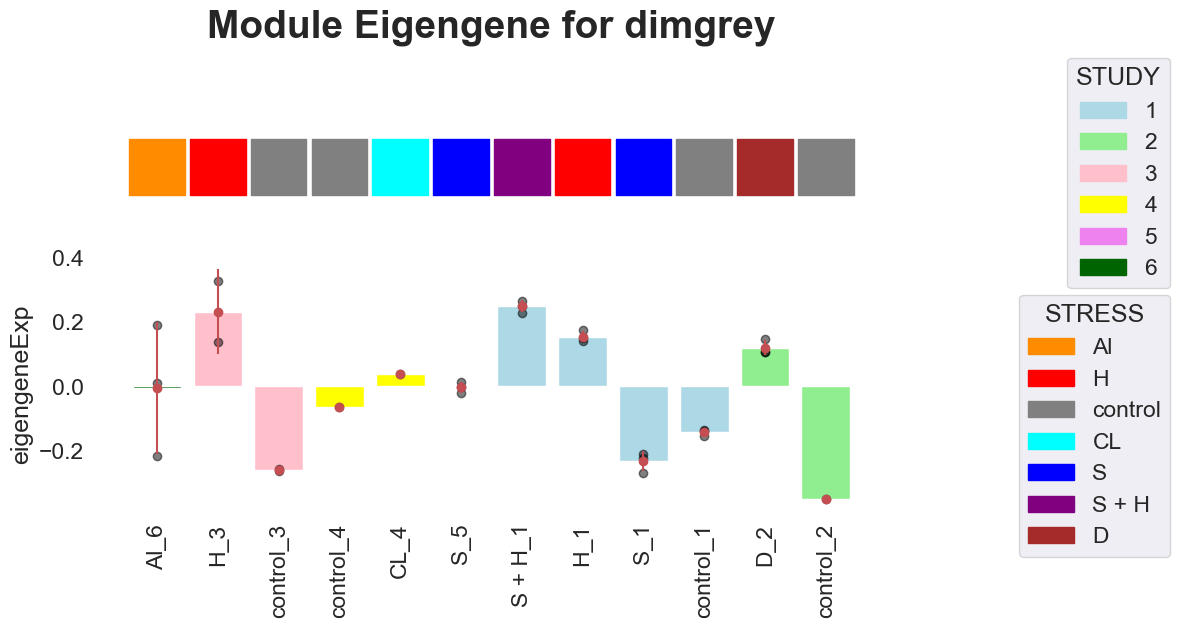

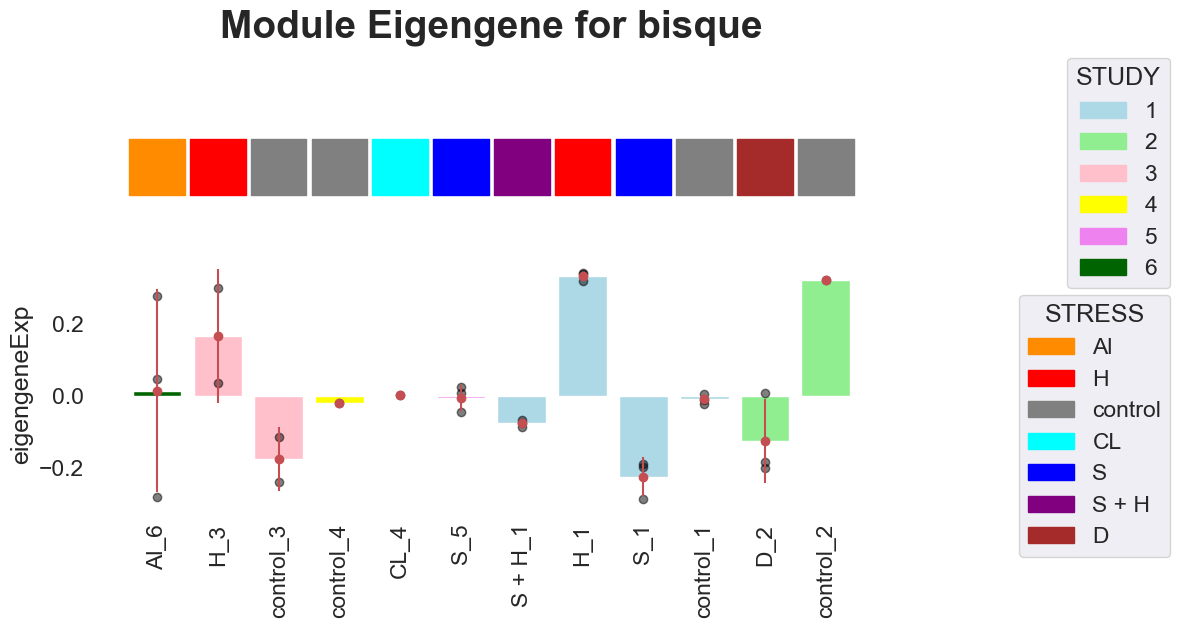

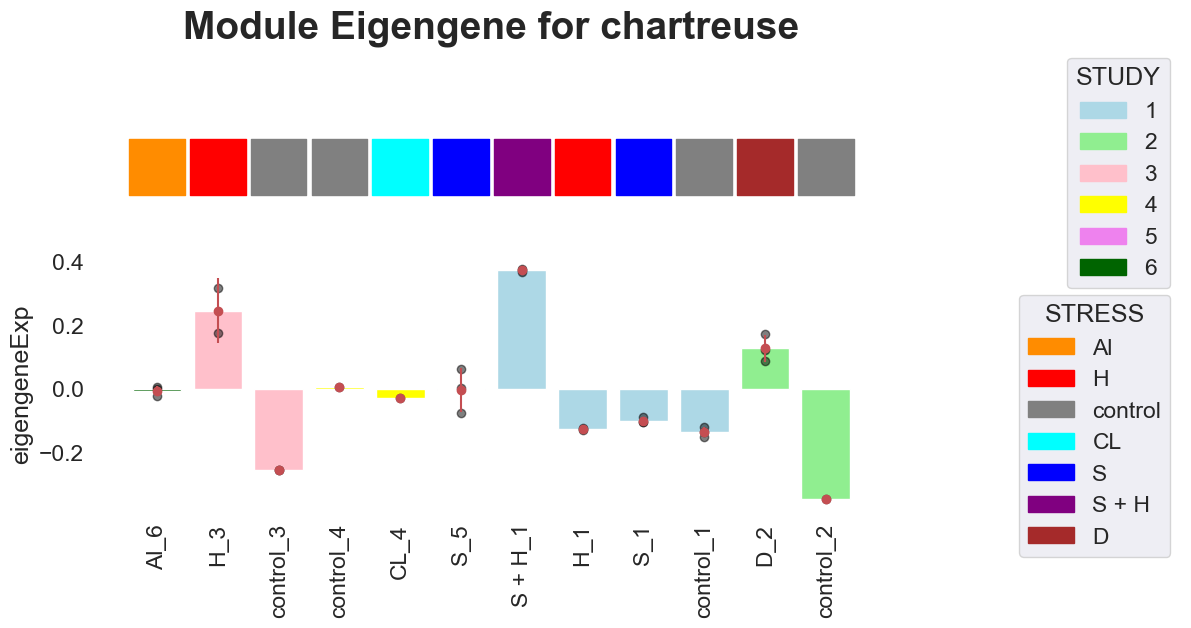

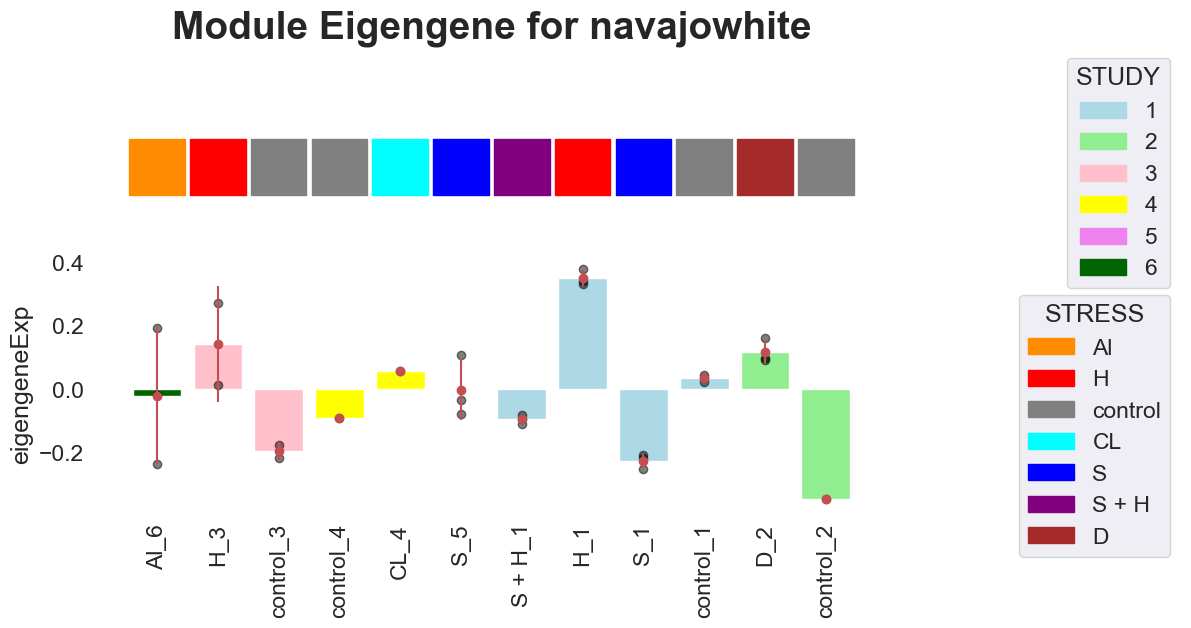

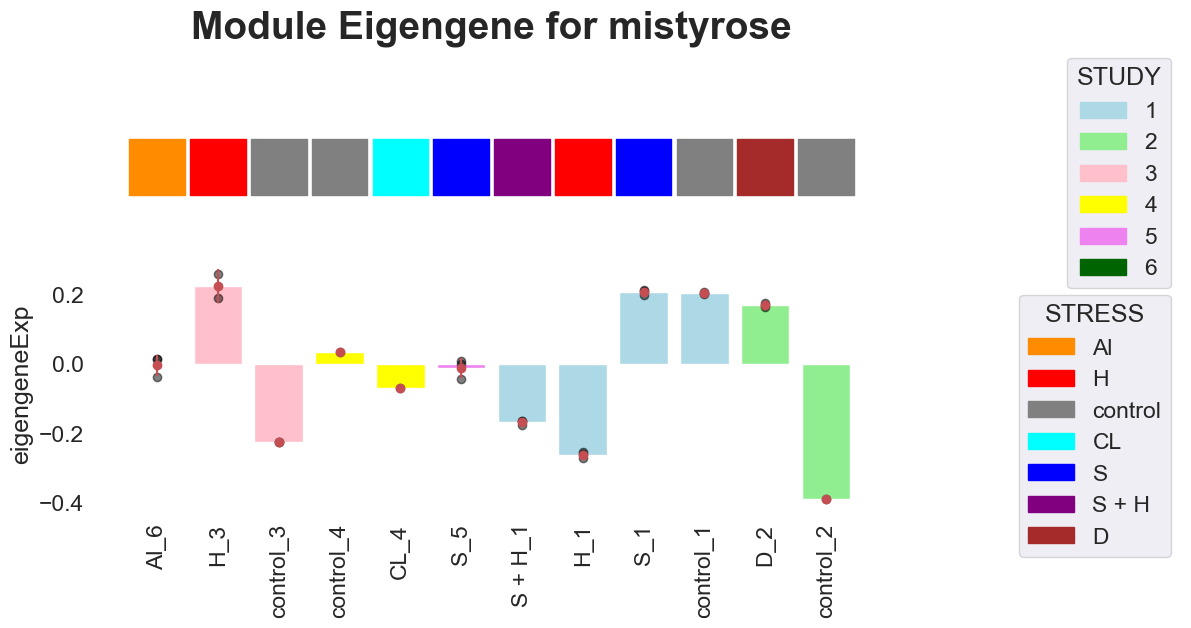

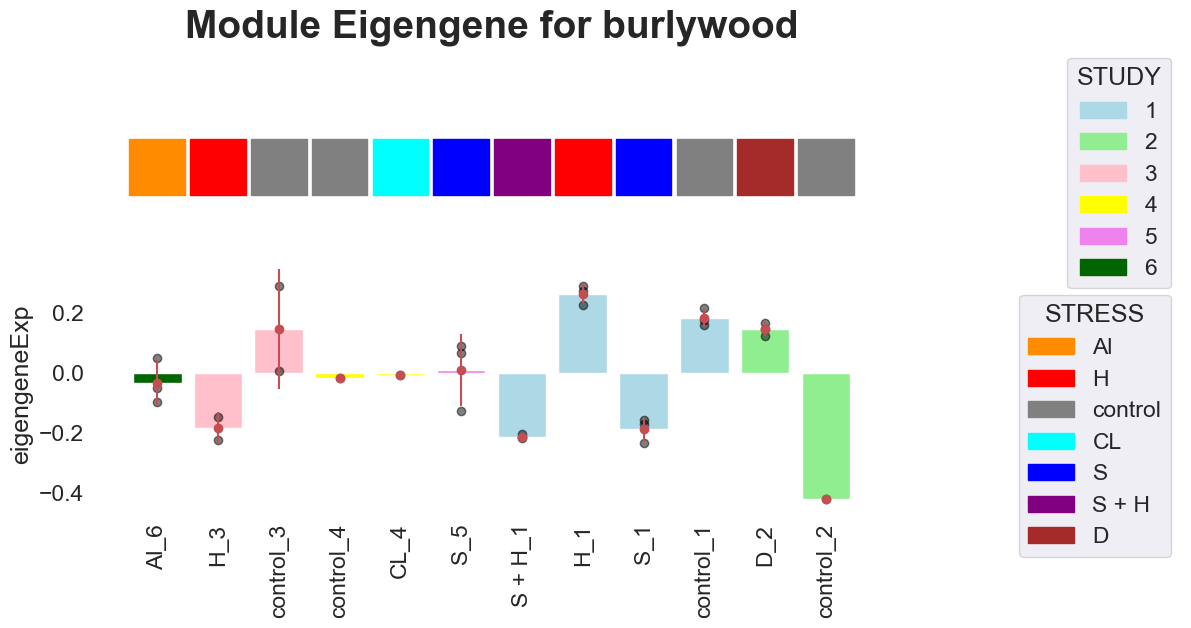

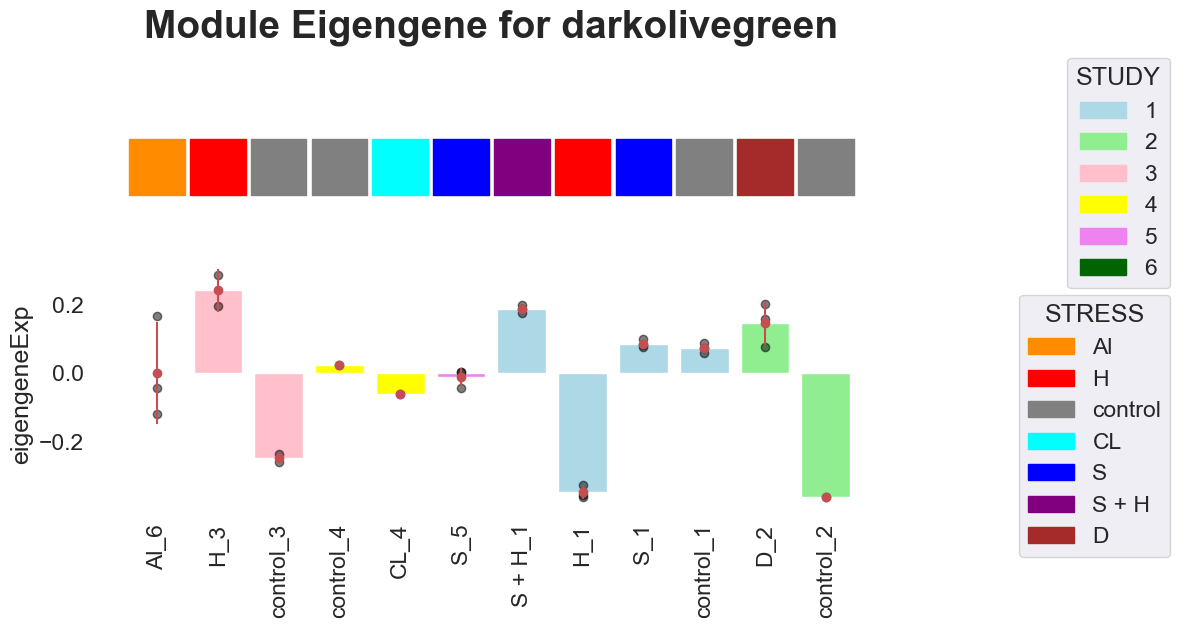

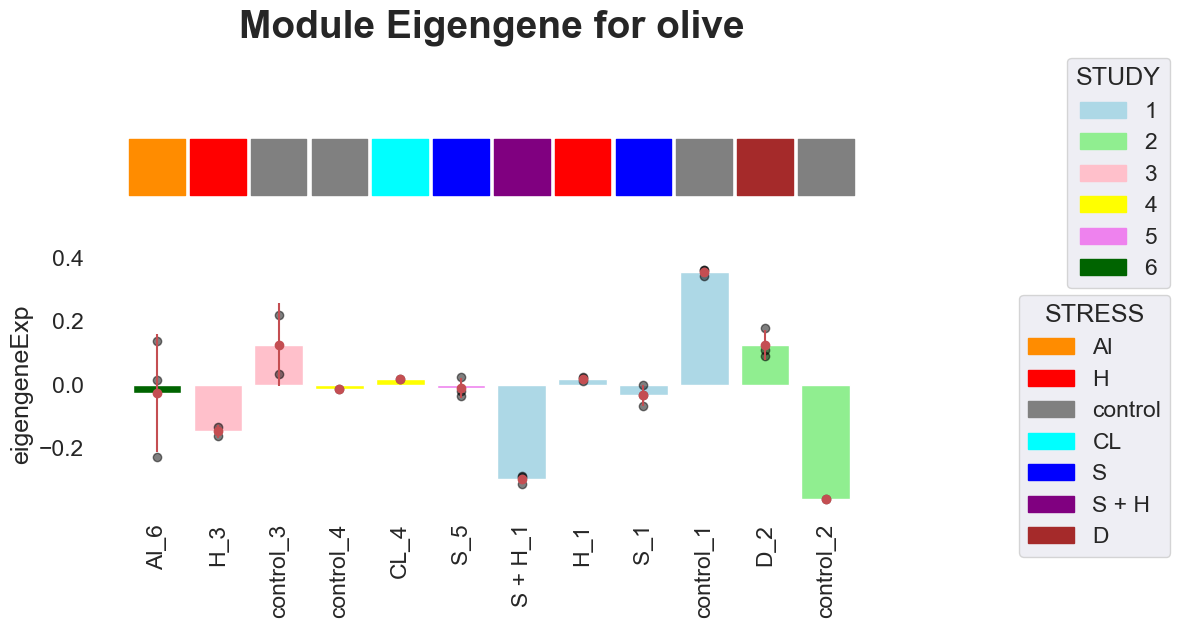

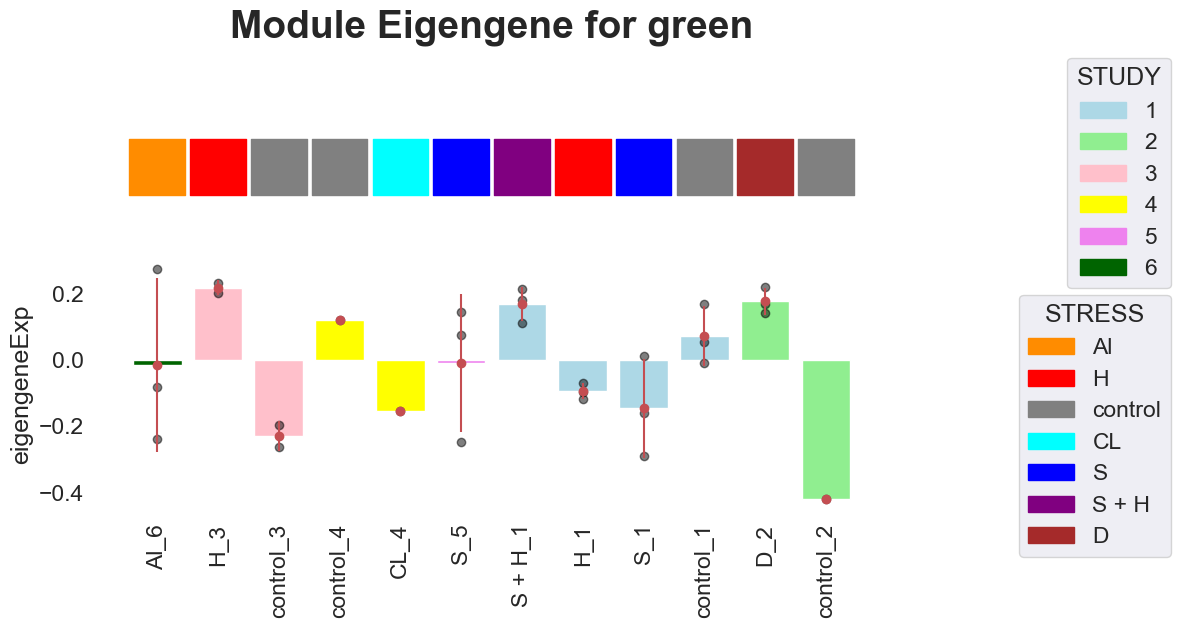

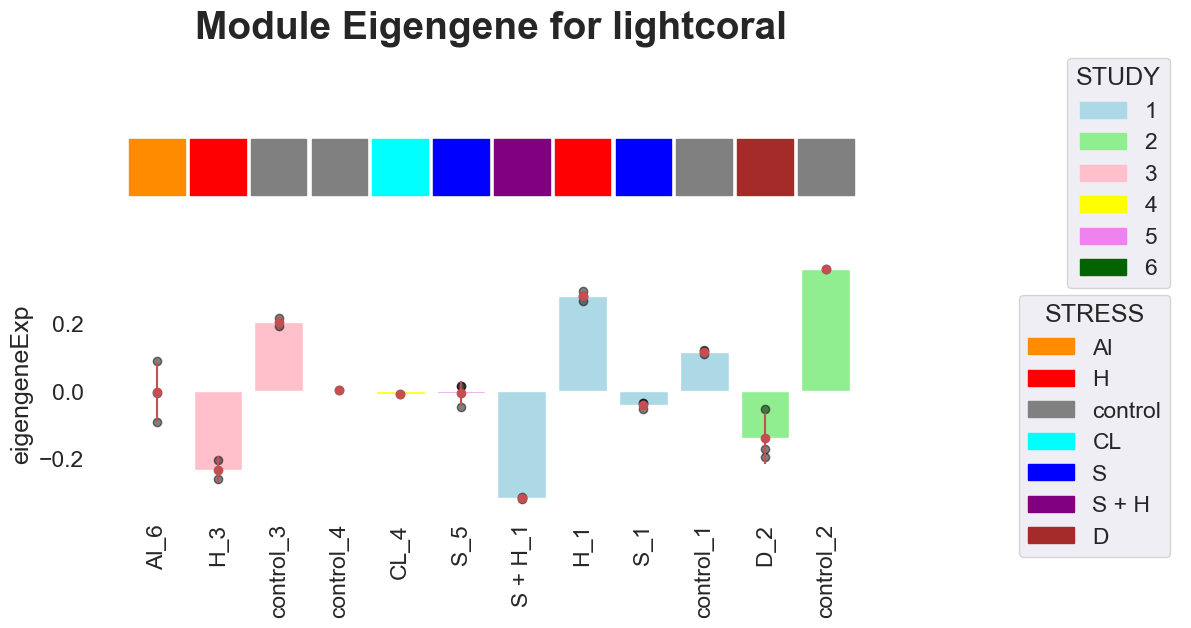

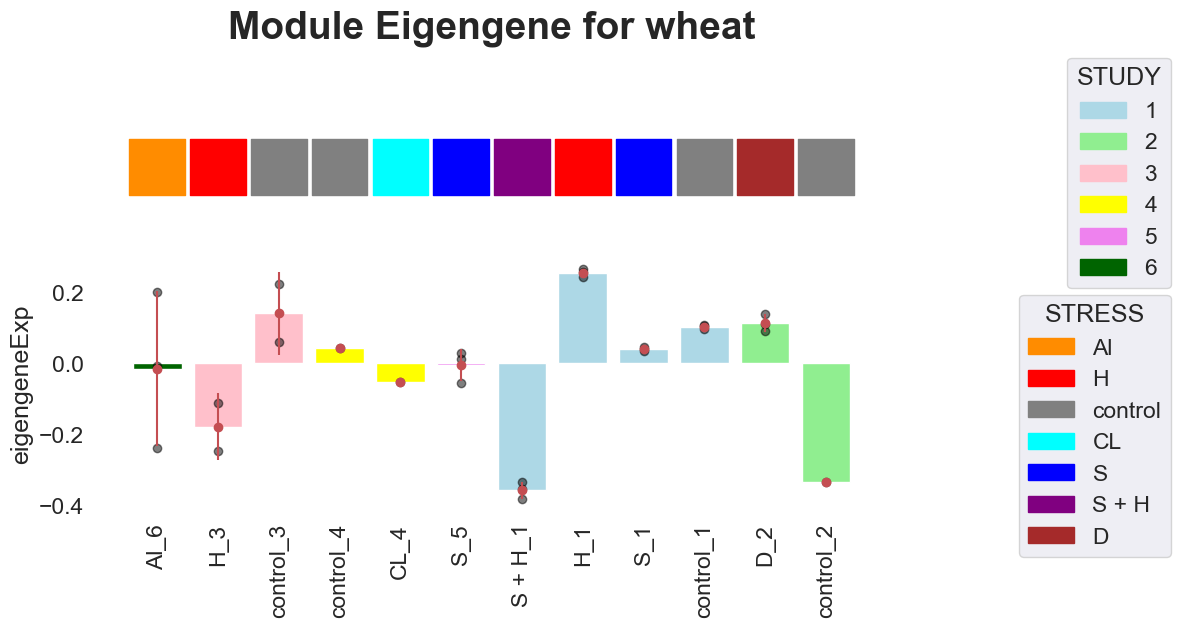

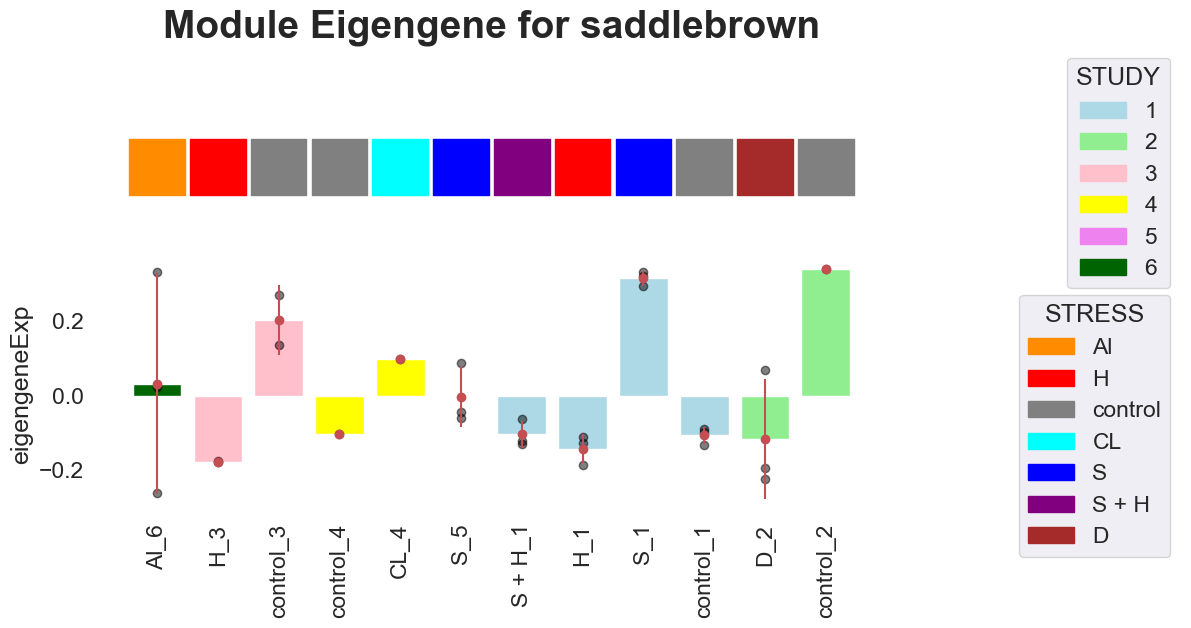

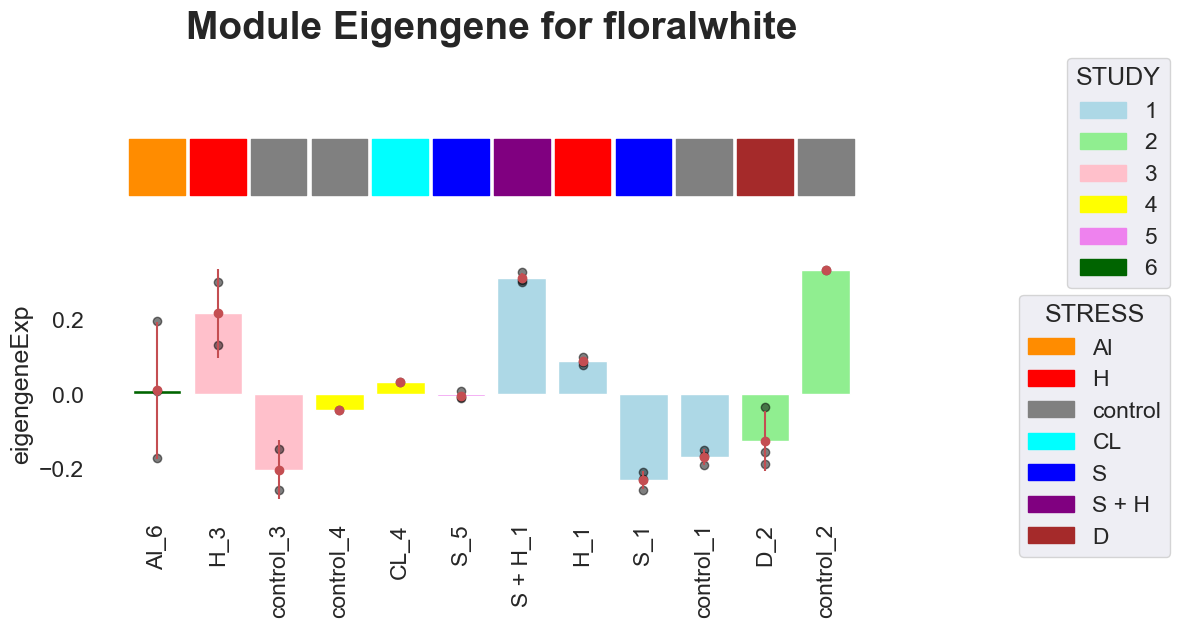

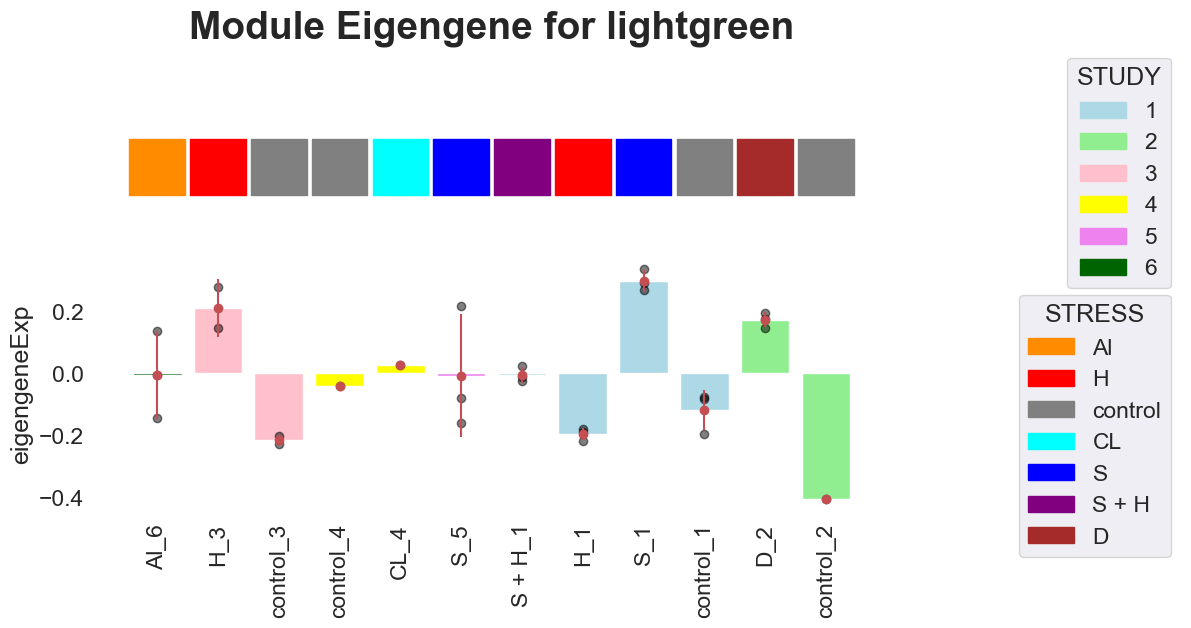

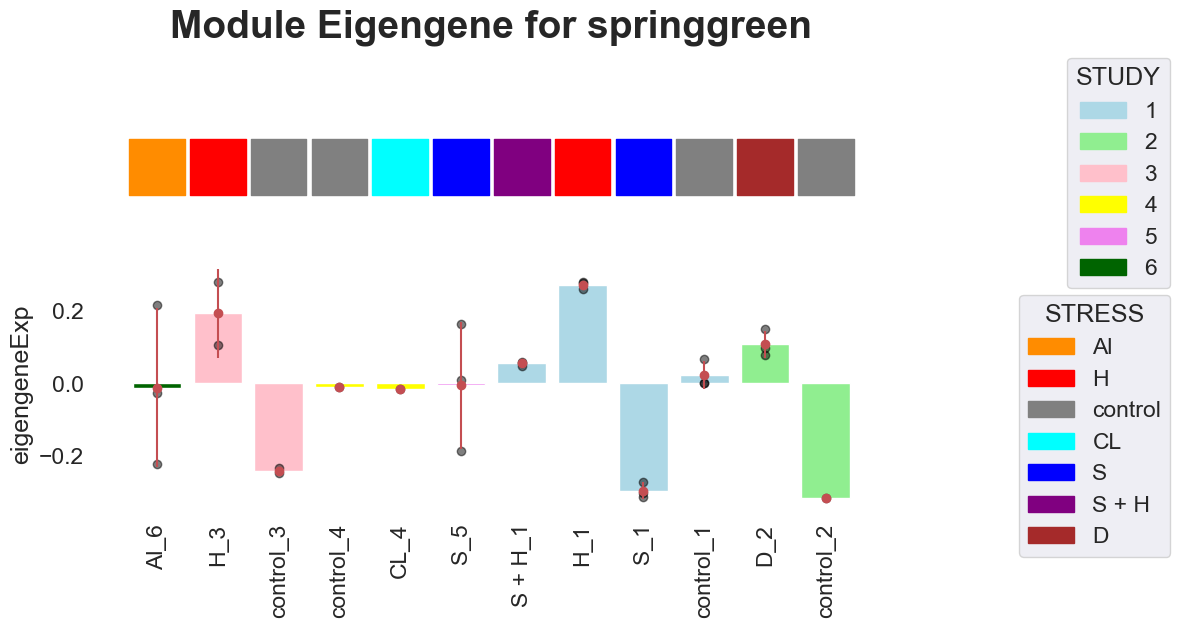

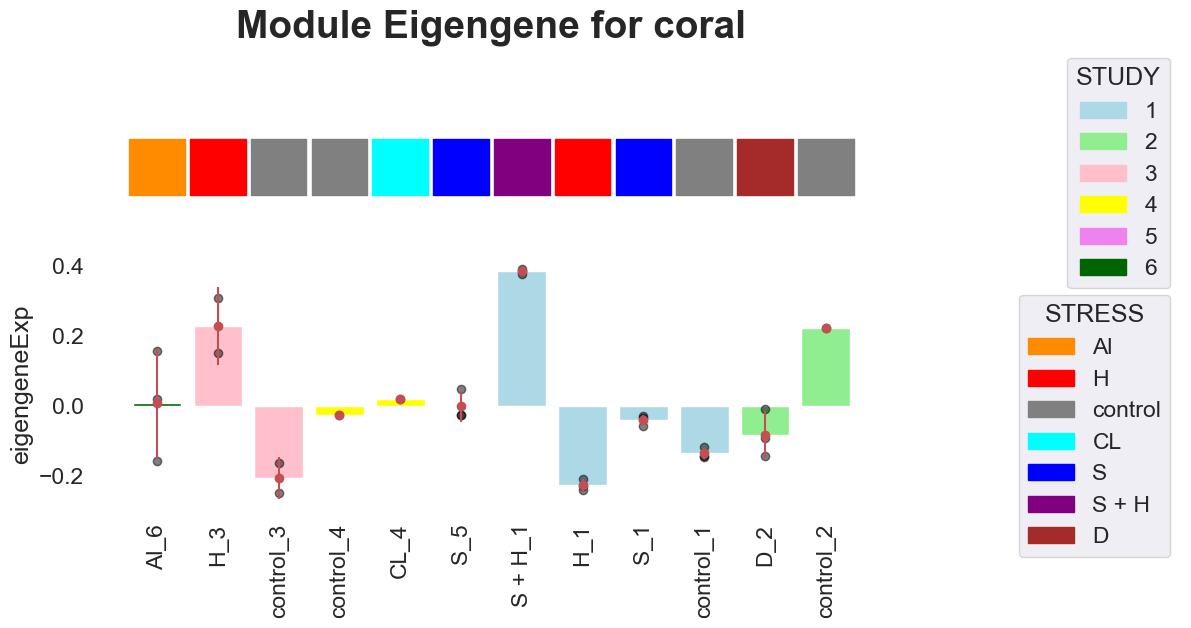

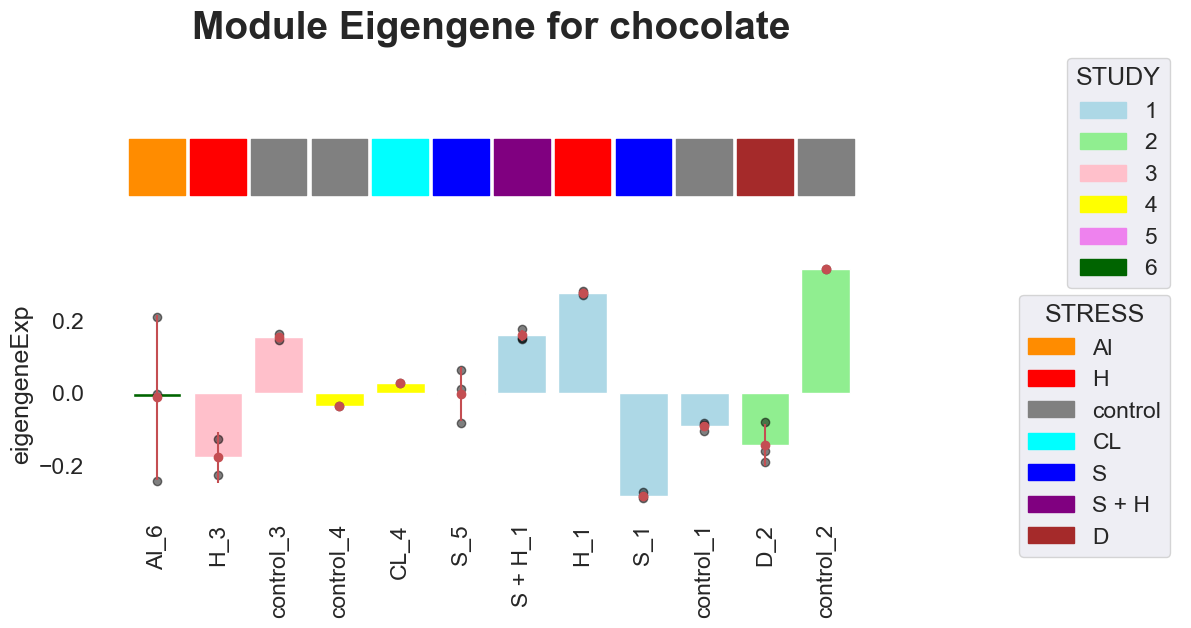

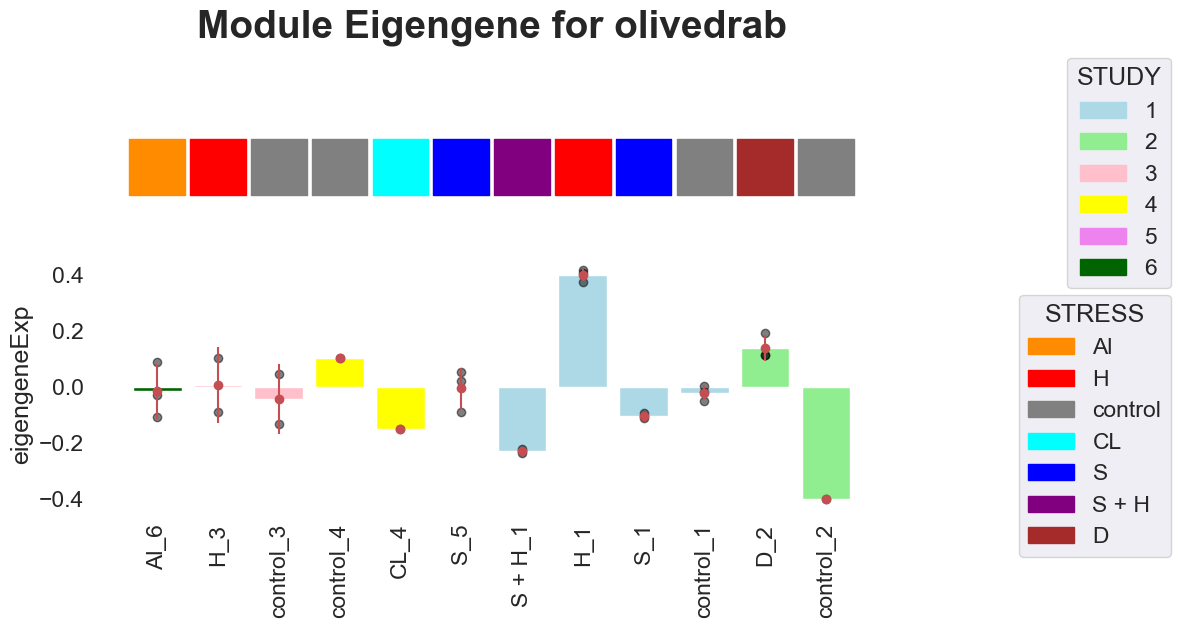

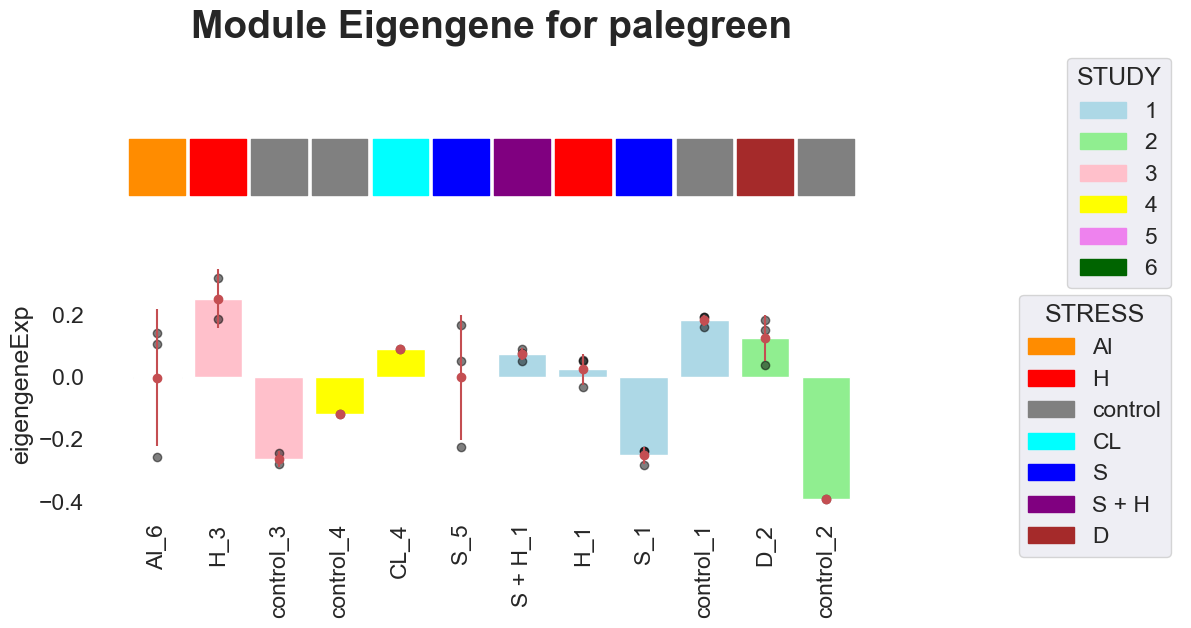

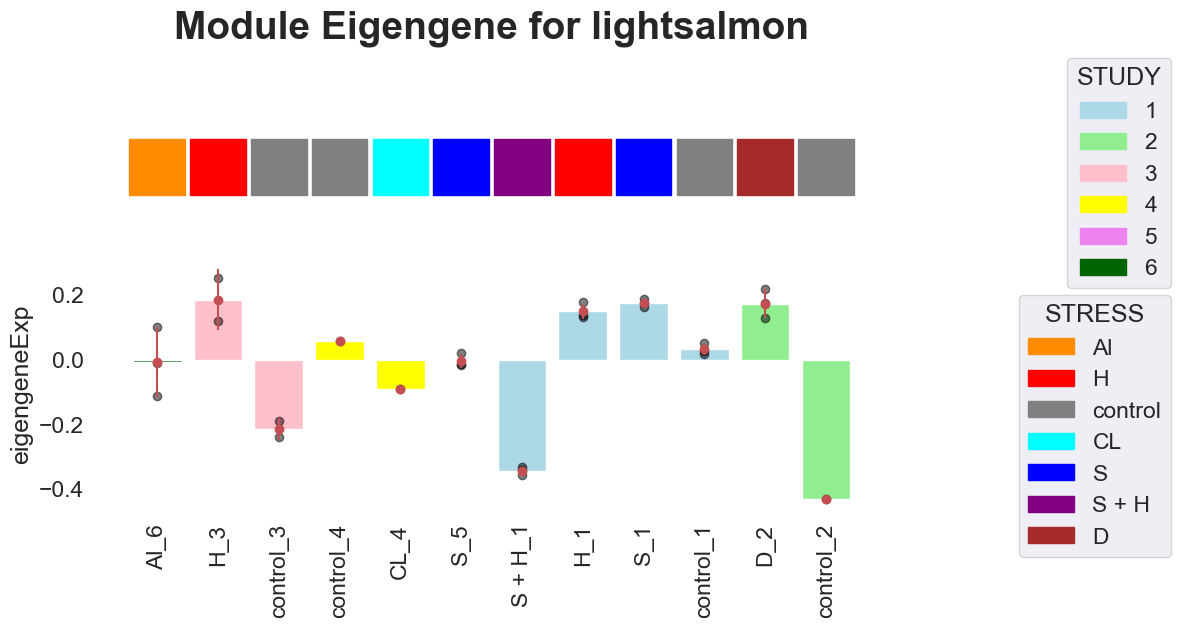

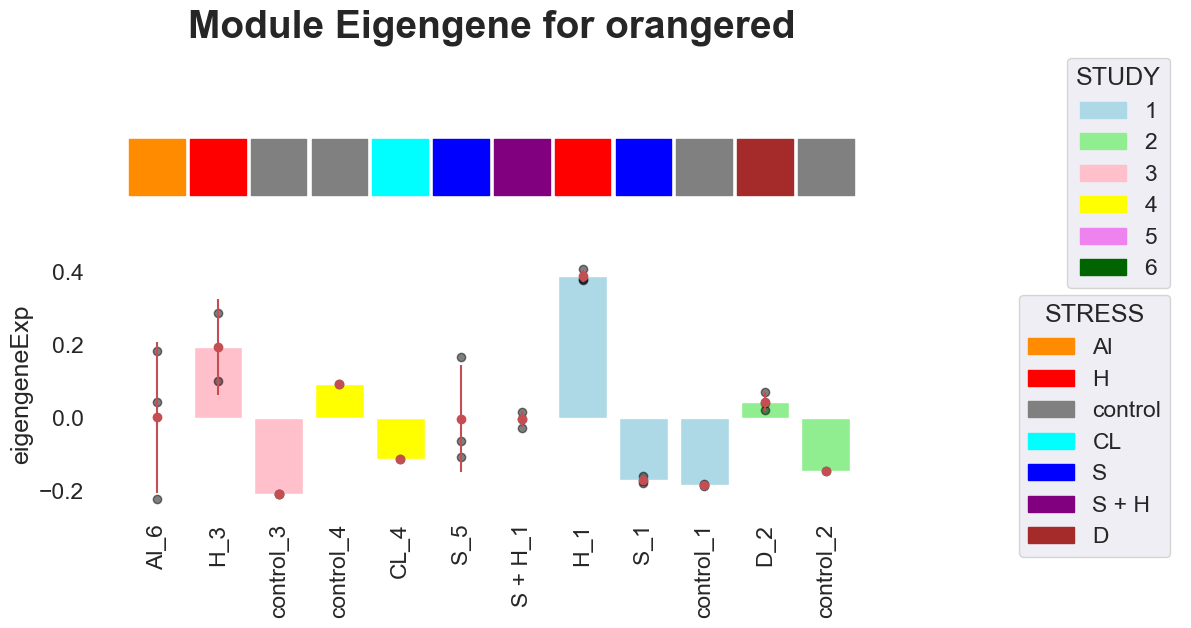

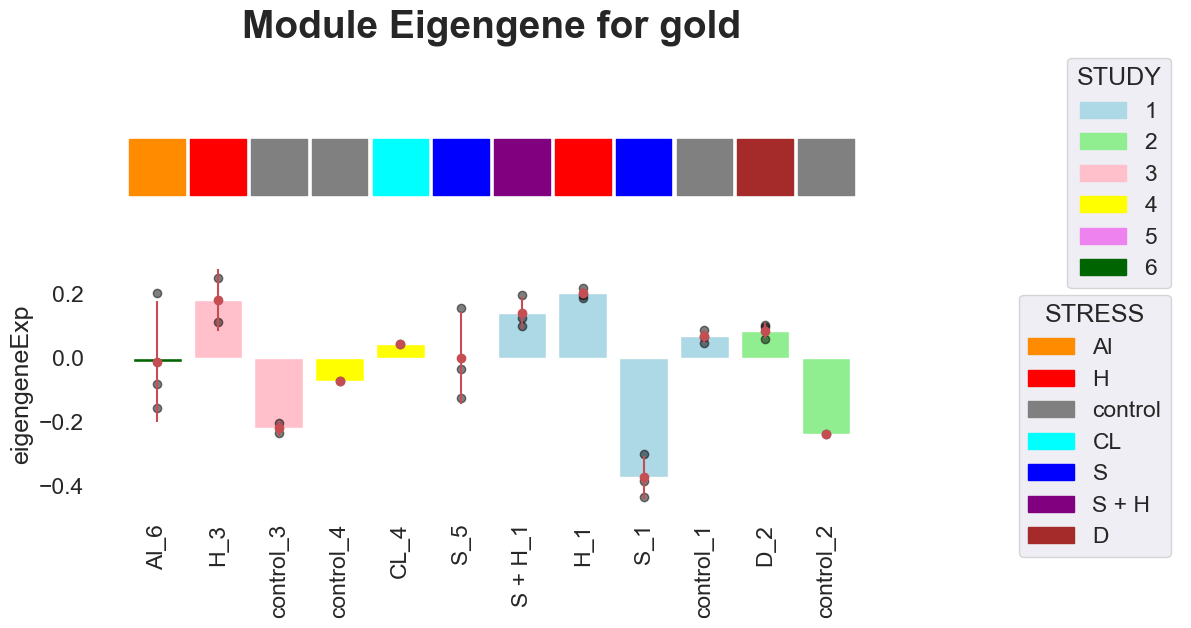

In [85]:
import os
os.makedirs("resultados_wgcna/tomato/figures", exist_ok=True)

# Establecer la ruta de guardado
pyWGCNA.outputPath = "resultados_wgcna/tomato/"

pyWGCNA.analyseWGCNA()

In [86]:
# Total de genes en cada uno
print("Genes en WGCNA:", len(pyWGCNA.datExpr.var))
print("Genes en gene_data:", len(gene_data))

# Ver cuántos coinciden exactamente
coinciden = pyWGCNA.datExpr.var.index.intersection(gene_data["gene_name"])
print("Genes que coinciden exactamente:", len(coinciden))


Genes en WGCNA: 23239
Genes en gene_data: 23240
Genes que coinciden exactamente: 23239


In [87]:
print(pyWGCNA.datExpr.var.head())  # Muestra los primeros registros
print(pyWGCNA.datExpr.var.columns)  # Lista todas las columnas disponibles


                 dynamicColors moduleColors  moduleLabels external_gene_name  \
Solyc00g500022.1     mintcream    mintcream          17.0     Solyc00g500022   
Solyc00g500023.1     mintcream    mintcream          17.0     Solyc00g500023   
Solyc00g500034.1     mintcream    mintcream          17.0     Solyc00g500034   
Solyc00g500039.1     mintcream    mintcream          17.0     Solyc00g500039   
Solyc00g500042.1     mintcream    mintcream          17.0     Solyc00g500042   

                         gene_name  \
Solyc00g500022.1  Solyc00g500022.1   
Solyc00g500023.1  Solyc00g500023.1   
Solyc00g500034.1  Solyc00g500034.1   
Solyc00g500039.1  Solyc00g500039.1   
Solyc00g500042.1  Solyc00g500042.1   

                                                       gene_biotype  
Solyc00g500022.1  30S ribosomal protein S18, chloroplastic (AHRD...  
Solyc00g500023.1  ATP-dependent Clp protease proteolytic subunit...  
Solyc00g500034.1  30S ribosomal protein S3, chloroplastic (AHRD ...  
Solyc00g50

In [88]:
# Extraer los módulos y genes
gene_module_mapping = pyWGCNA.datExpr.var[['moduleColors']]

# Crear estructura para almacenar módulos con sus genes
module_dict = {}

for gene, row in gene_module_mapping.iterrows():
    module = row['moduleColors']  # Color del módulo asignado
    if module not in module_dict:
        module_dict[module] = []
    module_dict[module].append(gene)  # Agregar el nombre del gen

# Mostrar genes dentro de cada módulo
for module, genes in module_dict.items():
    print(f"\nMódulo {module} ({len(genes)} genes):")
    print(", ".join(genes[:10]))  # Muestra solo los primeros 10 genes por módulo para mejor lectura



Módulo mintcream (6245 genes):
Solyc00g500022.1, Solyc00g500023.1, Solyc00g500034.1, Solyc00g500039.1, Solyc00g500042.1, Solyc00g500065.1, Solyc00g500066.1, Solyc00g500068.1, Solyc00g500071.1, Solyc00g500078.1

Módulo darkkhaki (1112 genes):
Solyc00g500062.1, Solyc00g500063.1, Solyc01g005080.3, Solyc01g005520.4, Solyc01g005540.4, Solyc01g005590.2, Solyc01g005620.3, Solyc01g006330.4, Solyc01g006790.3, Solyc01g007170.4

Módulo firebrick (295 genes):
Solyc00g500070.1, Solyc01g005560.3, Solyc01g005700.3, Solyc01g006130.4, Solyc01g060070.3, Solyc01g067090.4, Solyc01g068030.3, Solyc01g080330.4, Solyc01g086870.3, Solyc01g090720.3

Módulo sandybrown (166 genes):
Solyc00g094530.1, Solyc01g009170.4, Solyc01g009270.1, Solyc01g009447.1, Solyc01g028830.3, Solyc01g058320.4, Solyc01g081310.3, Solyc01g073660.3, Solyc01g089880.3, Solyc01g096280.2

Módulo black (253 genes):
Solyc00g500191.1, Solyc00g500234.1, Solyc00g020010.1, Solyc00g500245.1, Solyc00g500257.1, Solyc01g005120.3, Solyc01g005500.3, Soly

In [89]:
pyWGCNA.moduleTraitCor

Al        CL         D         H         S     S + H  \
MElightcoral     -0.003186 -0.007474 -0.255300  0.190415 -0.062750 -0.579308   
MEdarkkhaki       0.010477  0.029342 -0.193501 -0.473839  0.284667 -0.485431   
MEmintcream       0.064172  0.057829 -0.344108 -0.016358  0.078738 -0.265747   
MEsaddlebrown     0.057813  0.098274 -0.213018 -0.384245  0.426966 -0.190846   
MElawngreen      -0.017205 -0.046802 -0.192653 -0.427451  0.055877  0.733153   
MEcoral           0.014233  0.021015 -0.149155 -0.107710 -0.056716  0.707262   
MEfloralwhite     0.019591  0.033313 -0.229696  0.345307 -0.324018  0.570782   
MEfirebrick      -0.017806  0.016003  0.225983 -0.427308  0.312435 -0.545741   
MEolive          -0.046977  0.018520  0.231067 -0.116848 -0.060680 -0.546737   
MElightsalmon    -0.013949 -0.092879  0.317282  0.402285  0.235267 -0.627918   
MEwheat          -0.026362 -0.052248  0.209241  0.201838  0.050381 -0.653984   
MEburlywood      -0.059846 -0.007246  0.268056  0.209781 -0.245177 -0.389339   
MEolivedrab      -0.027921 -0.150857  0.258422  0.600730 -0.146931 -0.418250   
MEchartreuse     -0.010908 -0.027991  0.233690  0.056464 -0.142550  0.684844   
MEgreen          -0.026294 -0.154951  0.325489  0.077503 -0.213562  0.310066   
MEdarkolivegreen  0.002839 -0.060581  0.266640 -0.274823  0.104234  0.342418   
MElightgreen     -0.008330  0.028186  0.315684 -0.081161  0.402231 -0.007215   
MEmistyrose      -0.005847 -0.071540  0.313665 -0.163770  0.272356 -0.306730   
MEsandybrown     -0.027815  0.061395  0.313290 -0.024414 -0.152682 -0.201369   
MEbisque          0.026020  0.002056 -0.228727  0.654646 -0.316466 -0.139562   
MEchocolate      -0.021780  0.027728 -0.263814  0.235618 -0.396522  0.294605   
MEblack          -0.067474  0.036017 -0.062729  0.035881  0.377244 -0.026470   
MEnavajowhite    -0.036874  0.059024  0.216862  0.661552 -0.314948 -0.173417   
MEorangered       0.000287 -0.116473  0.079963  0.764281 -0.241093 -0.009032   
MEdimgrey        -0.008026  0.039220  0.221264  0.458576 -0.324296  0.455472   
MEpalegreen      -0.004392  0.090866  0.227876  0.284147 -0.349217  0.134048   
MEgold           -0.019746  0.045349  0.157684  0.478372 -0.516016  0.259334   
MEspringgreen    -0.021522 -0.016687  0.197927  0.592689 -0.415223  0.101377   

                   control     STUDY  
MElightcoral      0.492671 -0.026782  
MEdarkkhaki       0.614245 -0.000082  
MEmintcream       0.304846  0.063752  
MEsaddlebrown     0.140324  0.051991  
MElawngreen      -0.028600 -0.026017  
MEcoral          -0.268808  0.017975  
MEfloralwhite    -0.270280  0.010534  
MEfirebrick       0.316140 -0.033724  
MEolive           0.411947 -0.059702  
MElightsalmon    -0.307104 -0.030711  
MEwheat           0.132632 -0.045758  
MEburlywood       0.179267 -0.060029  
MEolivedrab      -0.193344 -0.056176  
MEchartreuse     -0.551169 -0.020683  
MEgreen          -0.234955 -0.035748  
MEdarkolivegreen -0.266802 -0.017735  
MElightgreen     -0.535837 -0.010134  
MEmistyrose      -0.083351 -0.017405  
MEsandybrown      0.079889 -0.047714  
MEbisque         -0.035543 -0.000186  
MEchocolate       0.149026 -0.044201  
MEblack          -0.292741  0.193260  
MEnavajowhite    -0.316676 -0.066054  
MEorangered      -0.448486 -0.019422  
MEdimgrey        -0.592757 -0.028094  
MEpalegreen      -0.214725 -0.021713  
MEgold           -0.237334 -0.040859  
MEspringgreen    -0.322019 -0.052847

In [91]:
cor_df = pyWGCNA.moduleTraitCor
pval_df = pyWGCNA.moduleTraitPvalue

mask_corr = cor_df.abs() >= 0.4
mask_pval = pval_df < 0.05
mask_combined = mask_corr & mask_pval
mask_combined.to_csv("RESULTADOS/matriz_significancia_modulo_condicion.csv")
selected_modules = mask_combined.sum(axis=1) >=2
# Aplicar la máscara para quedarte solo con los módulos que cumplen la condición
filtered_cor_df = cor_df[selected_modules]
filtered_pval_df = pval_df[selected_modules]



In [134]:
pyWGCNA.saveWGCNA()

Saving WGCNA as tomato.p


Hemos conseguido hasta ahora los modulos significativos en, al menos, 2 condiciones. Vamos a hacer el análisis GO de estos modulos con un cutOff de 0.05.

Antes, vamos a filtrar el archivo donde tenemos los genes anotados para que solo contengan los genes que superan el umbral que ya se calcularon anteriormente.

In [92]:
# Cargar archivo de genes completos
df = pd.read_csv("anotaciones_genes_expr_umbral.csv", sep=";")

# Cargar lista de genes a seleccionar
umbral_genes = pd.read_csv(r"C:\Users\Trvpe\PycharmProjects\JupyterProject\TFM\TFM\umbral_genes.txt", sep="\t", header=None)

# Limpiar los IDs (eliminar "gene:")
umbral_genes[0] = umbral_genes[0].str.replace("gene:", "", regex=True)

# Filtrar los genes que están en umbral_genes
filtered_genes = df[df["gene_name"].isin(umbral_genes[0])]

# Guardar la selección en un nuevo archivo
filtered_genes.to_csv(r"C:\Users\Trvpe\PycharmProjects\JupyterProject\TFM\TFM\filtered_genes_tomate.txt", sep="\t", index=False)

print("Genes filtrados guardados en 'filtered_genes_tomate.txt'.")



FileNotFoundError: [Errno 2] No such file or directory: 'anotaciones_genes_expr_umbral.csv'

Ahora creamos un archivo donde tenemos todos los modulos con sus genes correspondientes.

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
# Filtrar solo los módulos que están en ambas listas (sin "ME")
selected_module_names = filtered_cor_df.index.tolist()
selected_module_names= [name[2:] for name in selected_module_names]

filtered_module_dict = {mod: module_dict[mod] for mod in set(selected_module_names) & set(module_dict.keys())}

# Convertir la estructura filtrada a un DataFrame
filtered_genes_df = pd.DataFrame([(mod, gene) for mod, genes in filtered_module_dict.items() for gene in genes],
                                 columns=["Module", "Gene"])

# Guardar en un archivo TXT o CSV
filtered_genes_df.to_csv("filtered_genes_per_module.txt", sep="\t", index=False)

print("Archivo 'filtered_genes_per_module.txt' guardado correctamente.")

# Calcular el número de genes por módulo
gene_counts = filtered_genes_df["Module"].value_counts().sort_values(ascending=False)

# Crear barplot y guardarlo
plt.figure(figsize=(10, 6))
sns.barplot(x=gene_counts.values, y=gene_counts.index, palette="viridis")
plt.xlabel("Número de genes")
plt.ylabel("Módulo")
plt.title("Número de genes por módulo")
plt.tight_layout()

plt.savefig("resultados_figuras/recuento_genes_por_modulo.png", dpi=300)
plt.close()

print("Gráfico guardado en 'resultados_figuras/recuento_genes_por_modulo.png'")


Archivo 'filtered_genes_per_module.txt' guardado correctamente.
Gráfico guardado en 'resultados_figuras/recuento_genes_por_modulo.png'


Vamos a recorrer este diccionario y realizar el GO análisis.

In [23]:
from gprofiler import GProfiler
gp = GProfiler(return_dataframe=True)

# Crear un diccionario para almacenar resultados GO de cada módulo
go_results_dict = {}

for module, genes in filtered_module_dict.items():
    if len(genes) > 0:  # Asegurarse de que el módulo tiene genes asignados
        go_results = gp.profile(organism="slycopersicum", query=genes, sources=["GO:BP", "GO:MF", "GO:CC"])
        go_results_dict[module] = go_results  # Guardar resultados en el diccionario

# Mostrar un ejemplo de los primeros términos GO del primer módulo analizado
first_module = next(iter(go_results_dict))
print(f"Resultados GO para el módulo {first_module}:\n", go_results_dict[first_module].head())

# Guardar los resultados de todos los módulos en archivos individuales
for module, df in go_results_dict.items():
    df.to_csv(f"GO_analysis_{module}.csv", index=False)

print("Análisis GO completado y guardado en archivos CSV.")


Resultados GO para el módulo lightcoral:
   source      native                               name       p_value  \
0  GO:CC  GO:0022626                 cytosolic ribosome  1.828144e-07   
1  GO:CC  GO:0005829                            cytosol  3.305940e-07   
2  GO:CC  GO:0044391                  ribosomal subunit  5.504383e-05   
3  GO:CC  GO:0022625  cytosolic large ribosomal subunit  1.441154e-04   
4  GO:CC  GO:0005737                          cytoplasm  7.486838e-04   

   significant                                        description  term_size  \
0         True  "A ribosome located in the cytosol." [GOC:mtg_...        187   
1         True  "The part of the cytoplasm that does not conta...        750   
2         True  "Either of the two subunits of a ribosome: the...        253   
3         True  "The large subunit of a ribosome located in th...        122   
4         True  "The contents of a cell excluding the plasma m...       4062   

   query_size  intersection_size  effe

Ahora vamos a seleccionar un top 20 genes por cada módulo.

In [83]:
# Diccionario para almacenar resultados por módulo
hub_genes_dict = {}

# Iterar por los módulos seleccionados
for module in selected_module_names:
    try:
        top_genes_df = pyWGCNA.top_n_hub_genes(moduleName=module, n=10)
        hub_genes_dict[module] = top_genes_df

        # Guardar por separado cada módulo
        top_genes_df.to_csv(f"resultados_figuras/hub_genes_{module}.csv", index=False)
    except Exception as e:
        print(f"Error al procesar el módulo {module}: {e}")

# Combinar todos en un solo DataFrame
all_hub_genes = pd.concat(
    [df.assign(Module=mod) for mod, df in hub_genes_dict.items()],
    ignore_index=True
)

# Guardar resultado global
all_hub_genes.to_csv("resultados_figuras/hub_genes_todos_modulos.csv", index=False)

print(" Top 10 genes por módulo guardados en 'resultados_figuras/'")



calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

calculating adjacency matrix ...
	Done..

 Top 10 genes por módulo guardados en 'resultados_figuras/'


In [6]:
with open("resultados_figuras/genes_en_al_menos_2_condiciones.csv", encoding="utf-8") as f:
    for i in range(5):
        print(f.readline())


0

Solyc00g500034.1

Solyc00g500042.1

Solyc00g500062.1

Solyc00g500065.1



In [16]:
import pandas as pd

import pandas as pd

# Leer archivo como lista de una sola columna sin encabezado
genes_filtrados = pd.read_csv("resultados_figuras/genes_en_al_menos_2_condiciones.csv", header=None)
genes_filtrados.columns = ["gene_name"]

hub_genes = pd.read_csv("resultados_figuras/hub_genes_todos_modulos.csv", sep=";")
# Unir los genes filtrados con los hub genes
genes_comunes = pd.merge(hub_genes, genes_filtrados, on="gene_name", how="inner")


# Ver los primeros resultados
print(genes_comunes.head())

# Guardar el resultado
genes_comunes.to_csv("resultados_figuras/DGE_and_GO_al_menos2.csv", index=False)



  connectivity dynamicColors moduleColors  moduleLabels external_gene_name  \
0  1,15171E+16    lightcoral   lightcoral           140     Solyc12g098590   
1  1,03993E+16    lightcoral   lightcoral           140     Solyc01g096630   
2  9,85447E+15    lightcoral   lightcoral           140     Solyc11g066580   
3  9,70503E+15    lightcoral   lightcoral           140     Solyc03g116630   
4  9,43395E+15    lightcoral   lightcoral           140     Solyc02g072540   

          gene_name                                       gene_biotype  \
0  Solyc12g098590.3  Glycosyltransferase (AHRD V3.3 *** A0A2I4GJH4_...   
1  Solyc01g096630.3  Cilia-and flagella-associated protein 20 (AHRD...   
2  Solyc11g066580.3  Flavonoid 3`,5`-hydroxylase (AHRD V3.3 *** D3W...   
3  Solyc03g116630.3  cytochrome P450 family protein (AHRD V3.3 *** ...   
4  Solyc02g072540.3  Non-specific serine/threonine protein kinase (...   

       Module  
0  lightcoral  
1  lightcoral  
2  lightcoral  
3  lightcoral  
4  lig

🔁 Bootstrap 1/10
Run WGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  1925
    Power  SFT.R.sq     slope truncated R.sq      mean(k)    median(k)  \
0       1  0.009112  0.113116        0.58652   4230.79883  4103.798244   
1       2  0.193791 -0.525397       0.751166  1881.968589  1617.064935   
2       3  0.626554 -1.109016       0.869347   998.055185   761.793248   
3       4  0.768133 -1.408666       0.906882   589.531673   403.495708   
4       5  0.813857 -1.560184        0.91898   374.970313   236.605895   
5       6   0.82816 -1.651109       0.923077   251.811806   146.785592   
6       7   0.84472 -1.704612       0.932689   176.307653    95.128813   
7       8  0.854444 -1.735314       0.939627   127.599098    63.844279   
8       9  0.861598 -1.766936       0.946013    94.871844    43.971372   
9      10  0.866082 -1.791324        0.95058    72.138243    31.028748   
10     11  0.867579 -1.807042        0.95296    55.902165    22.50

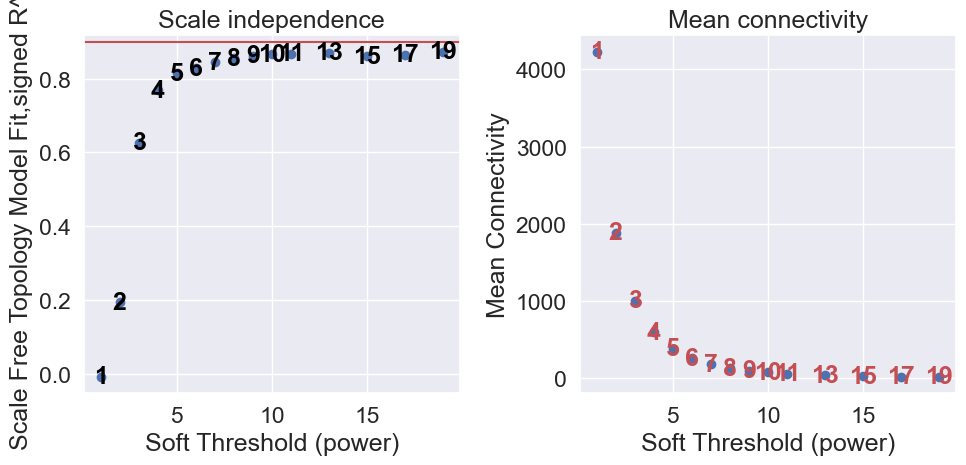

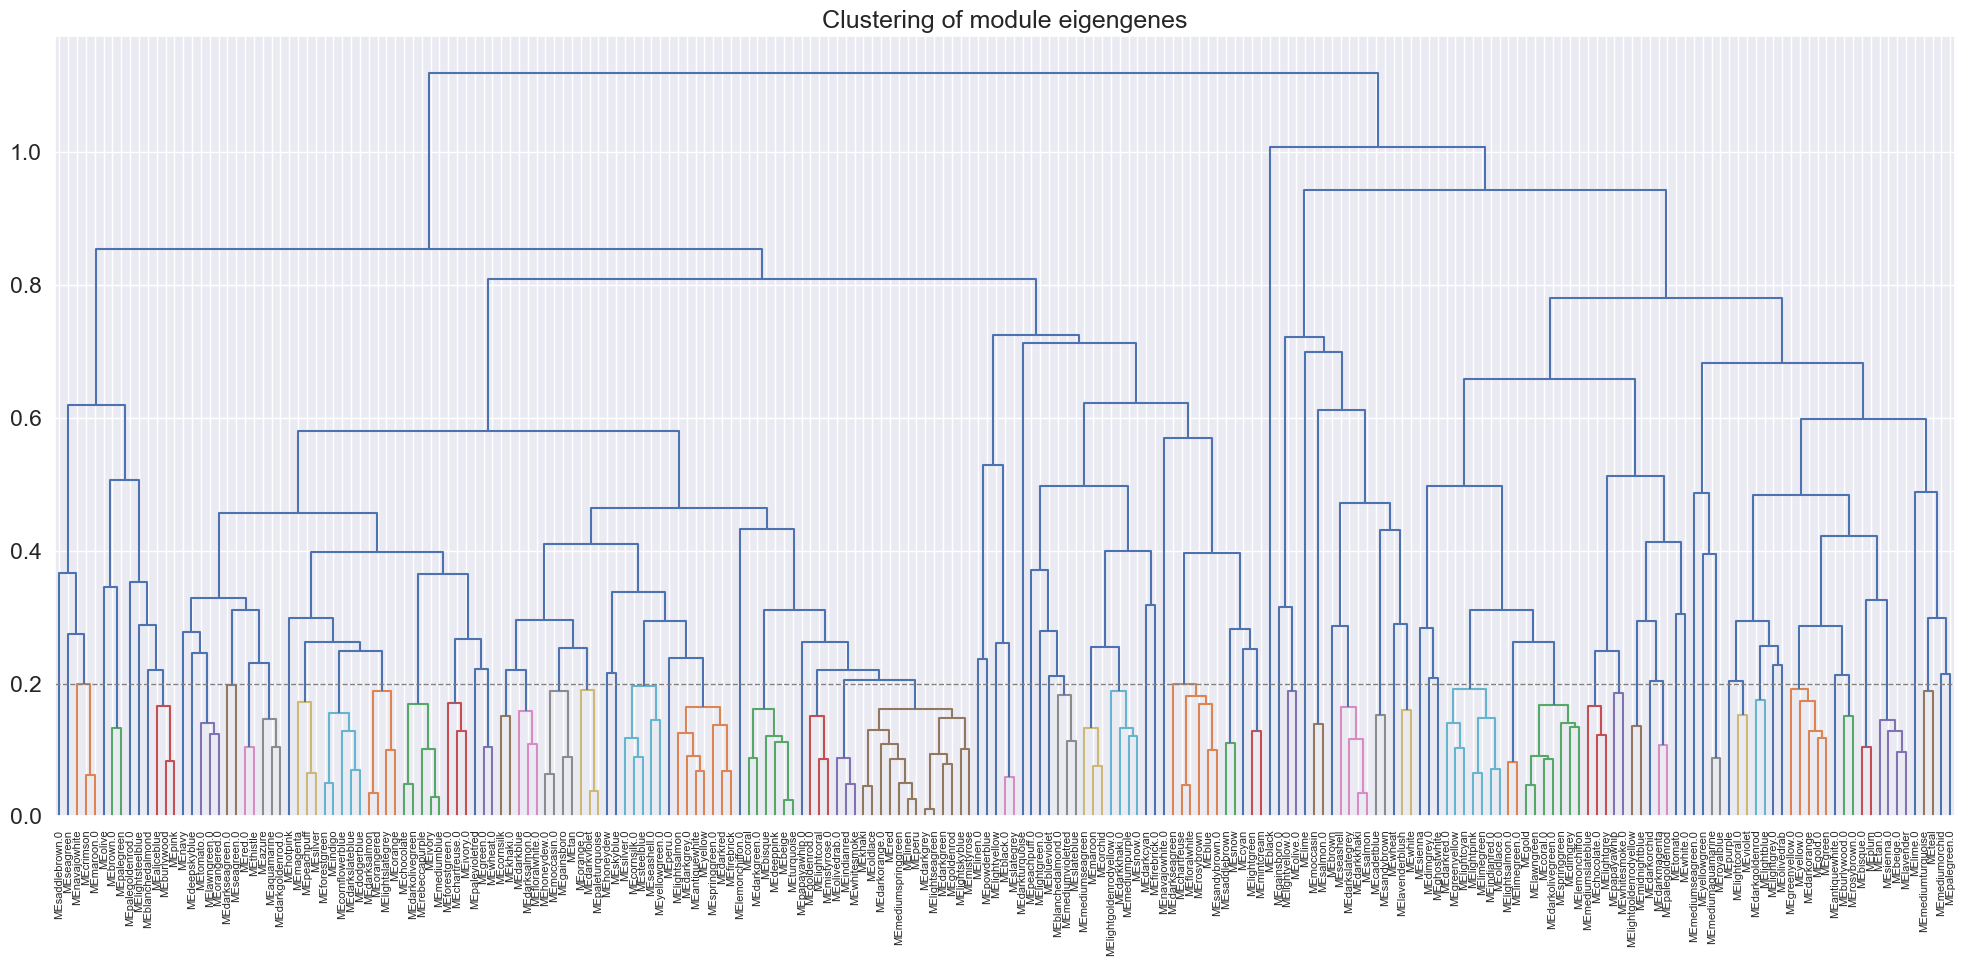

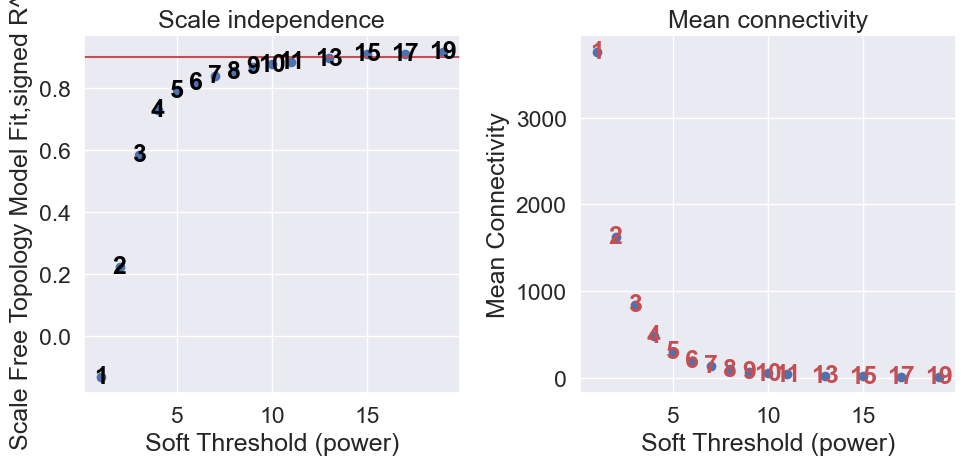

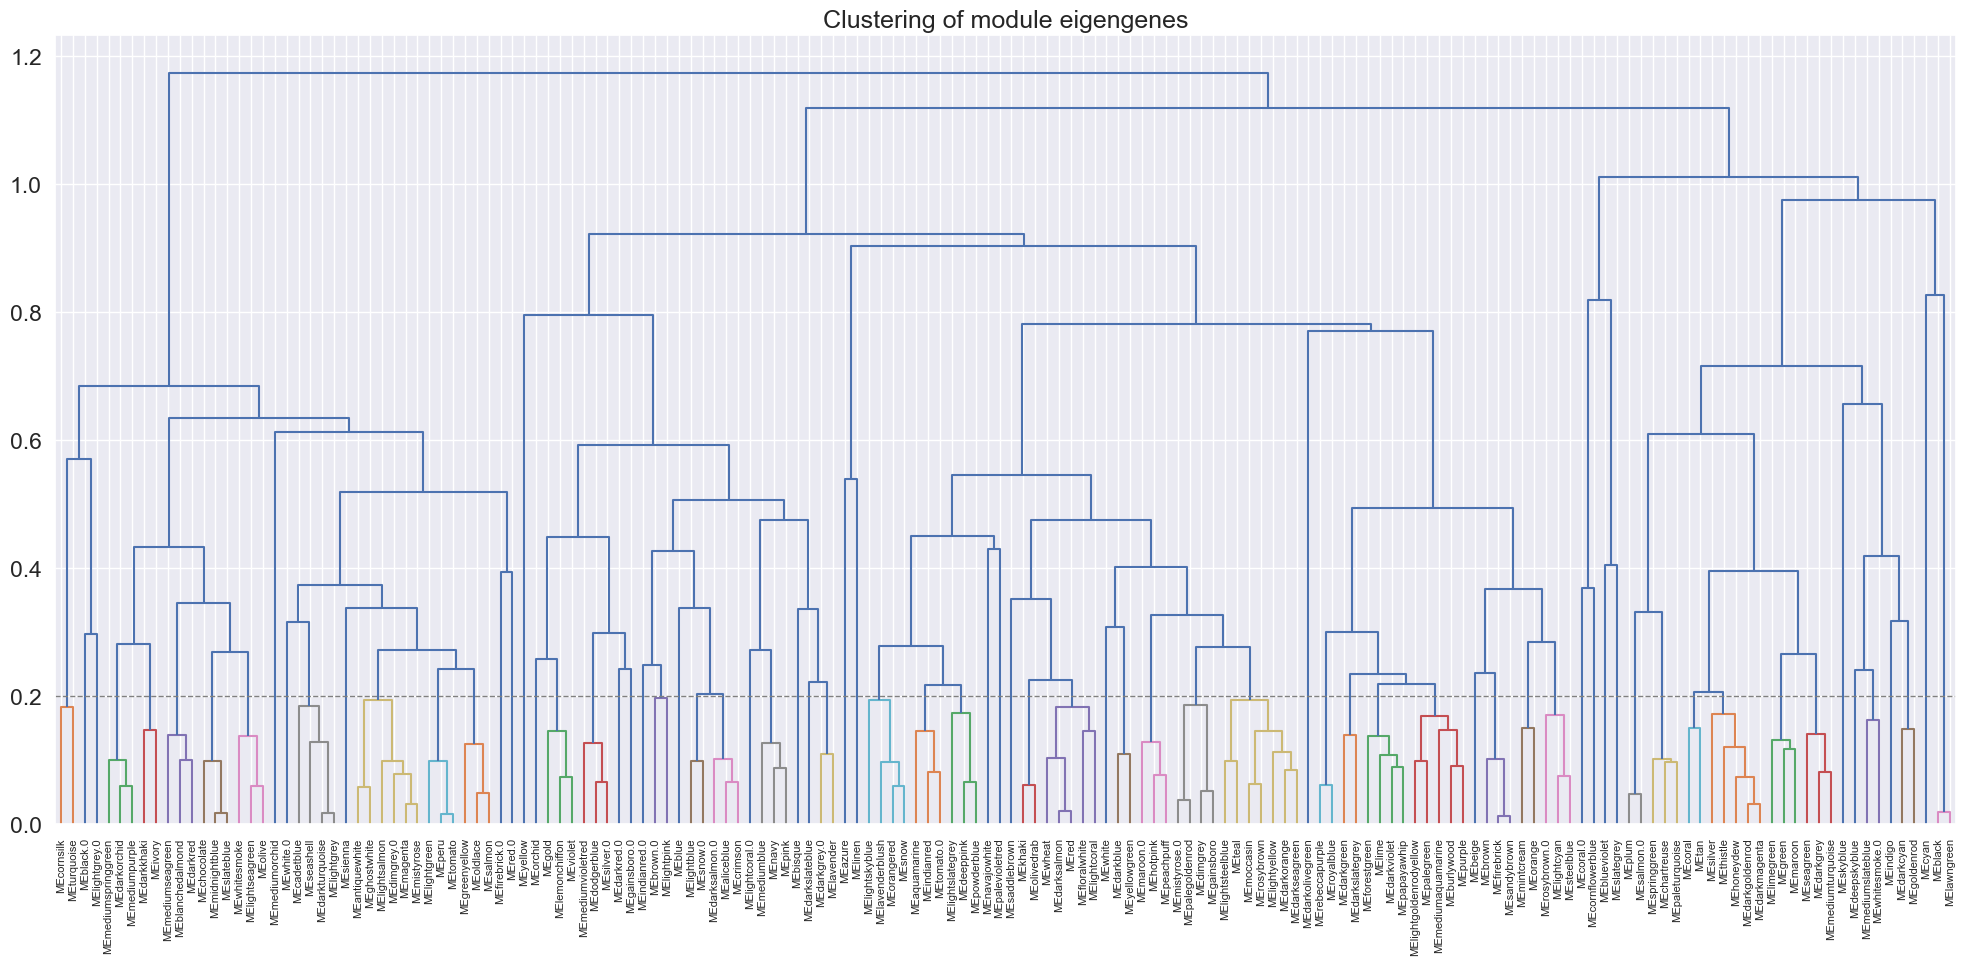

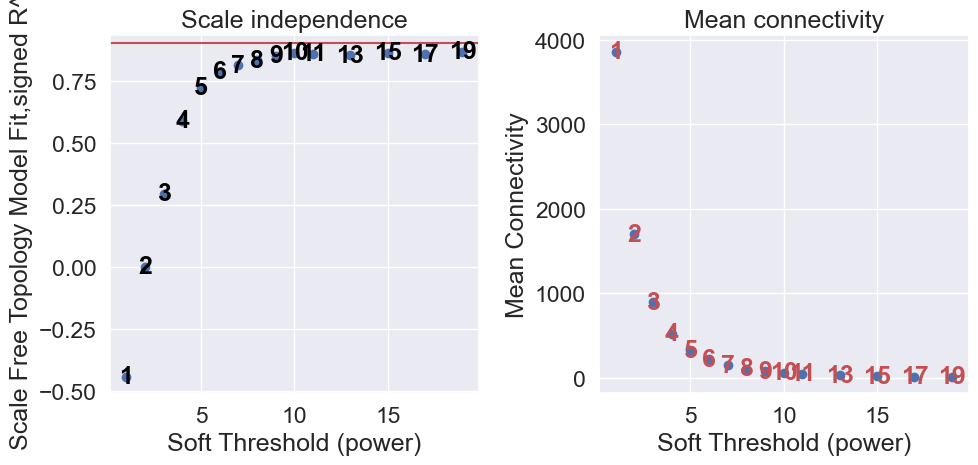

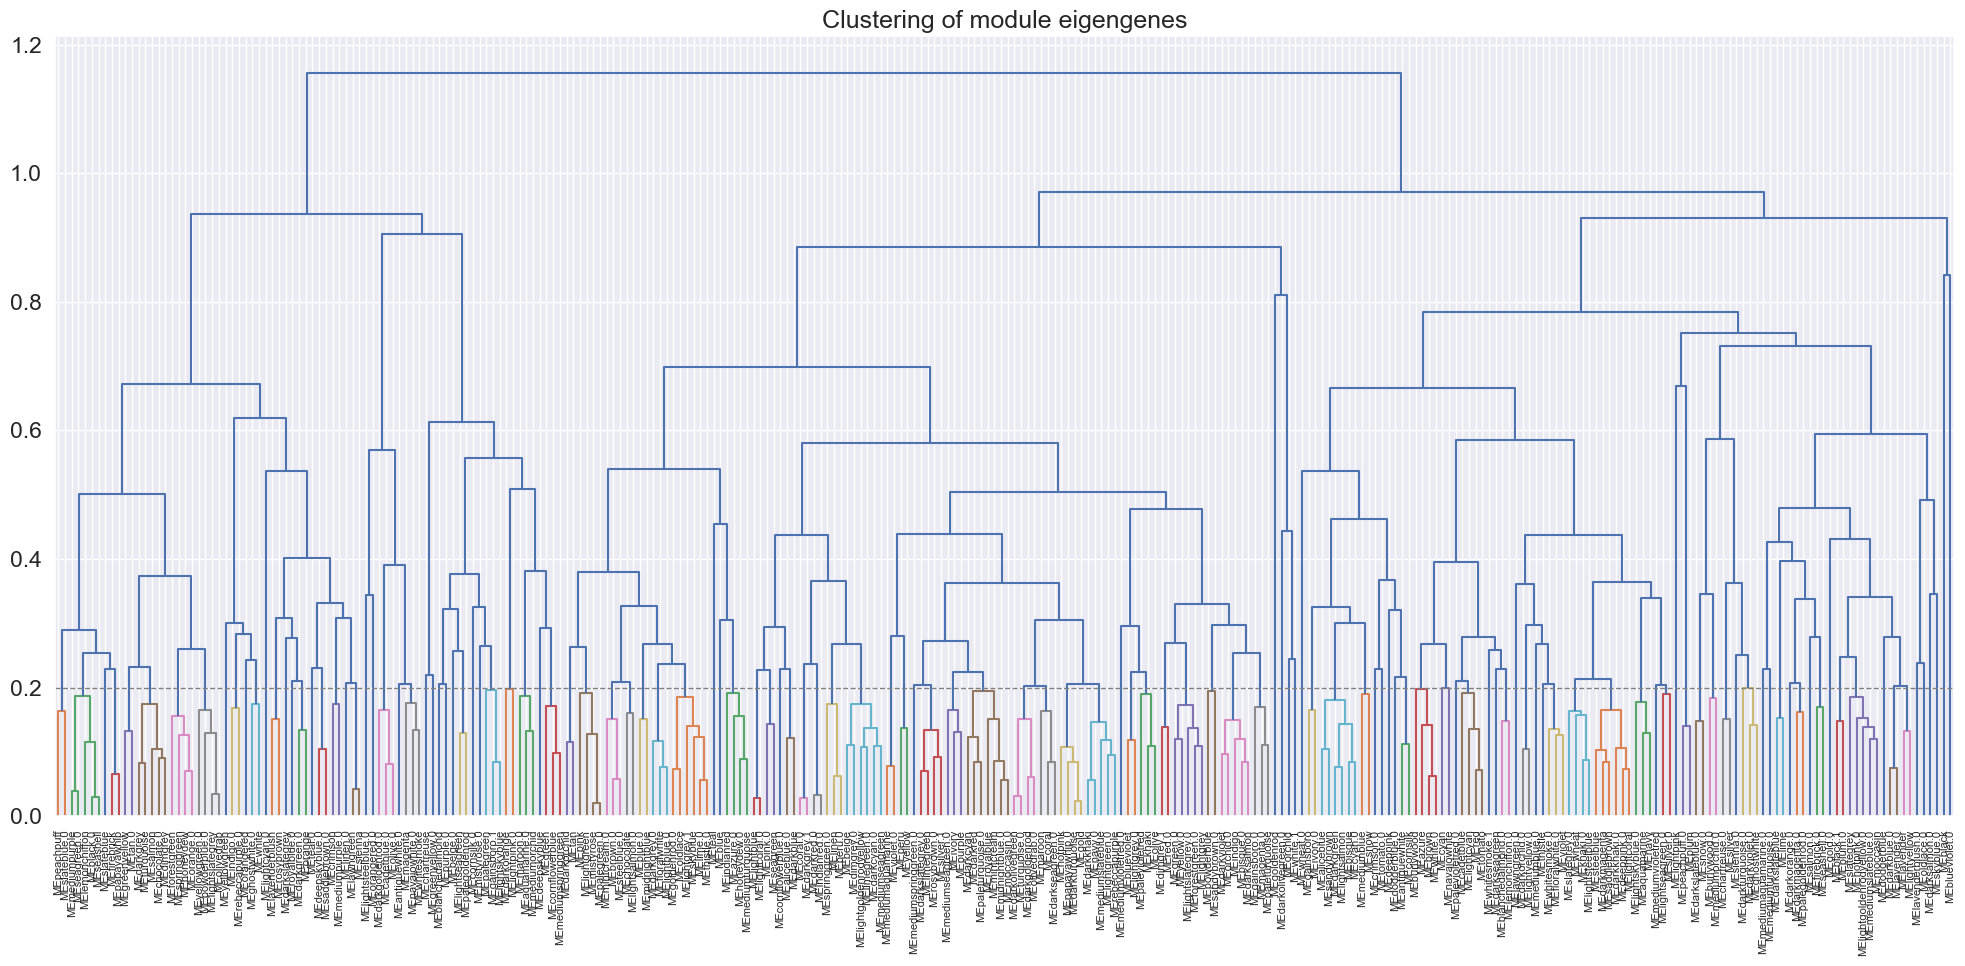

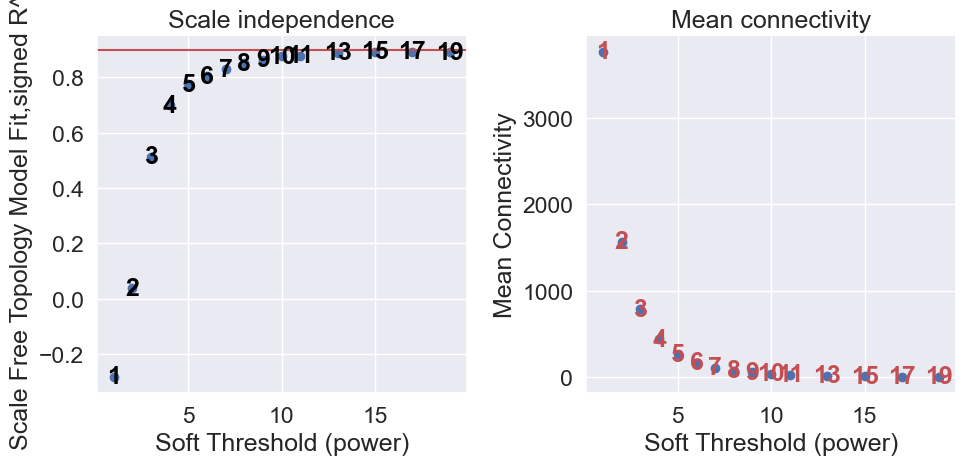

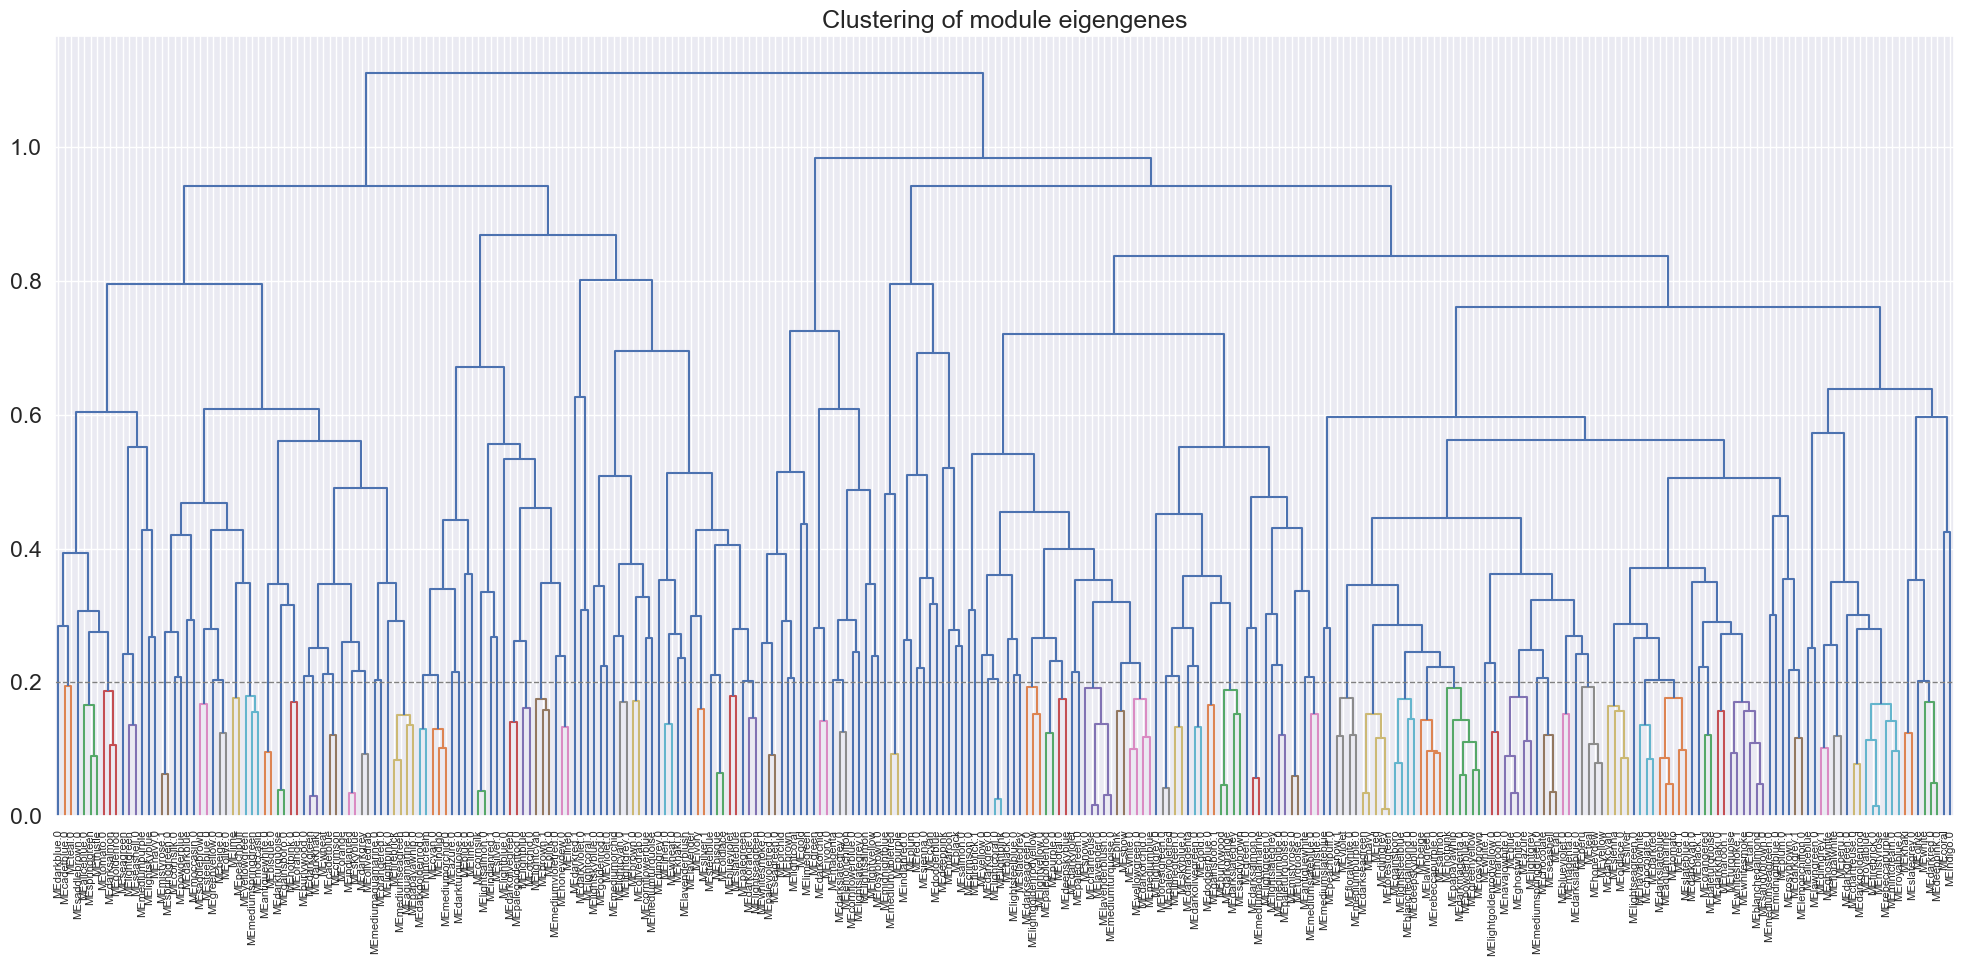

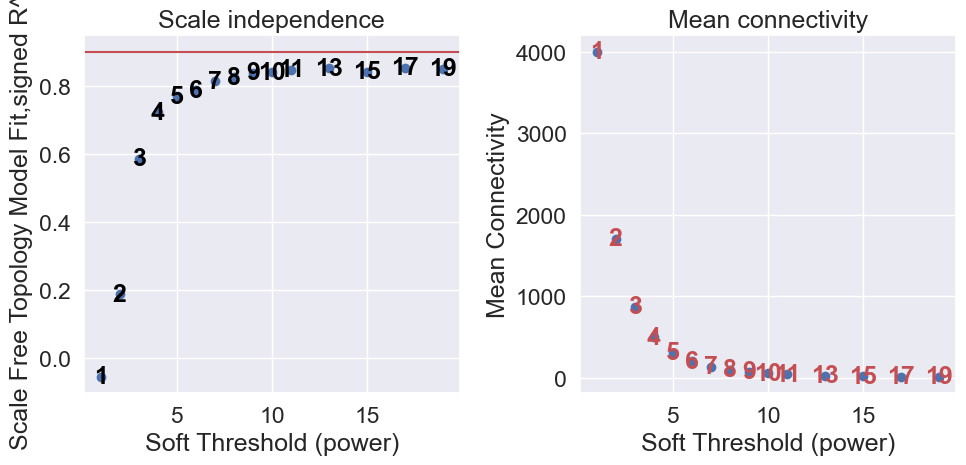

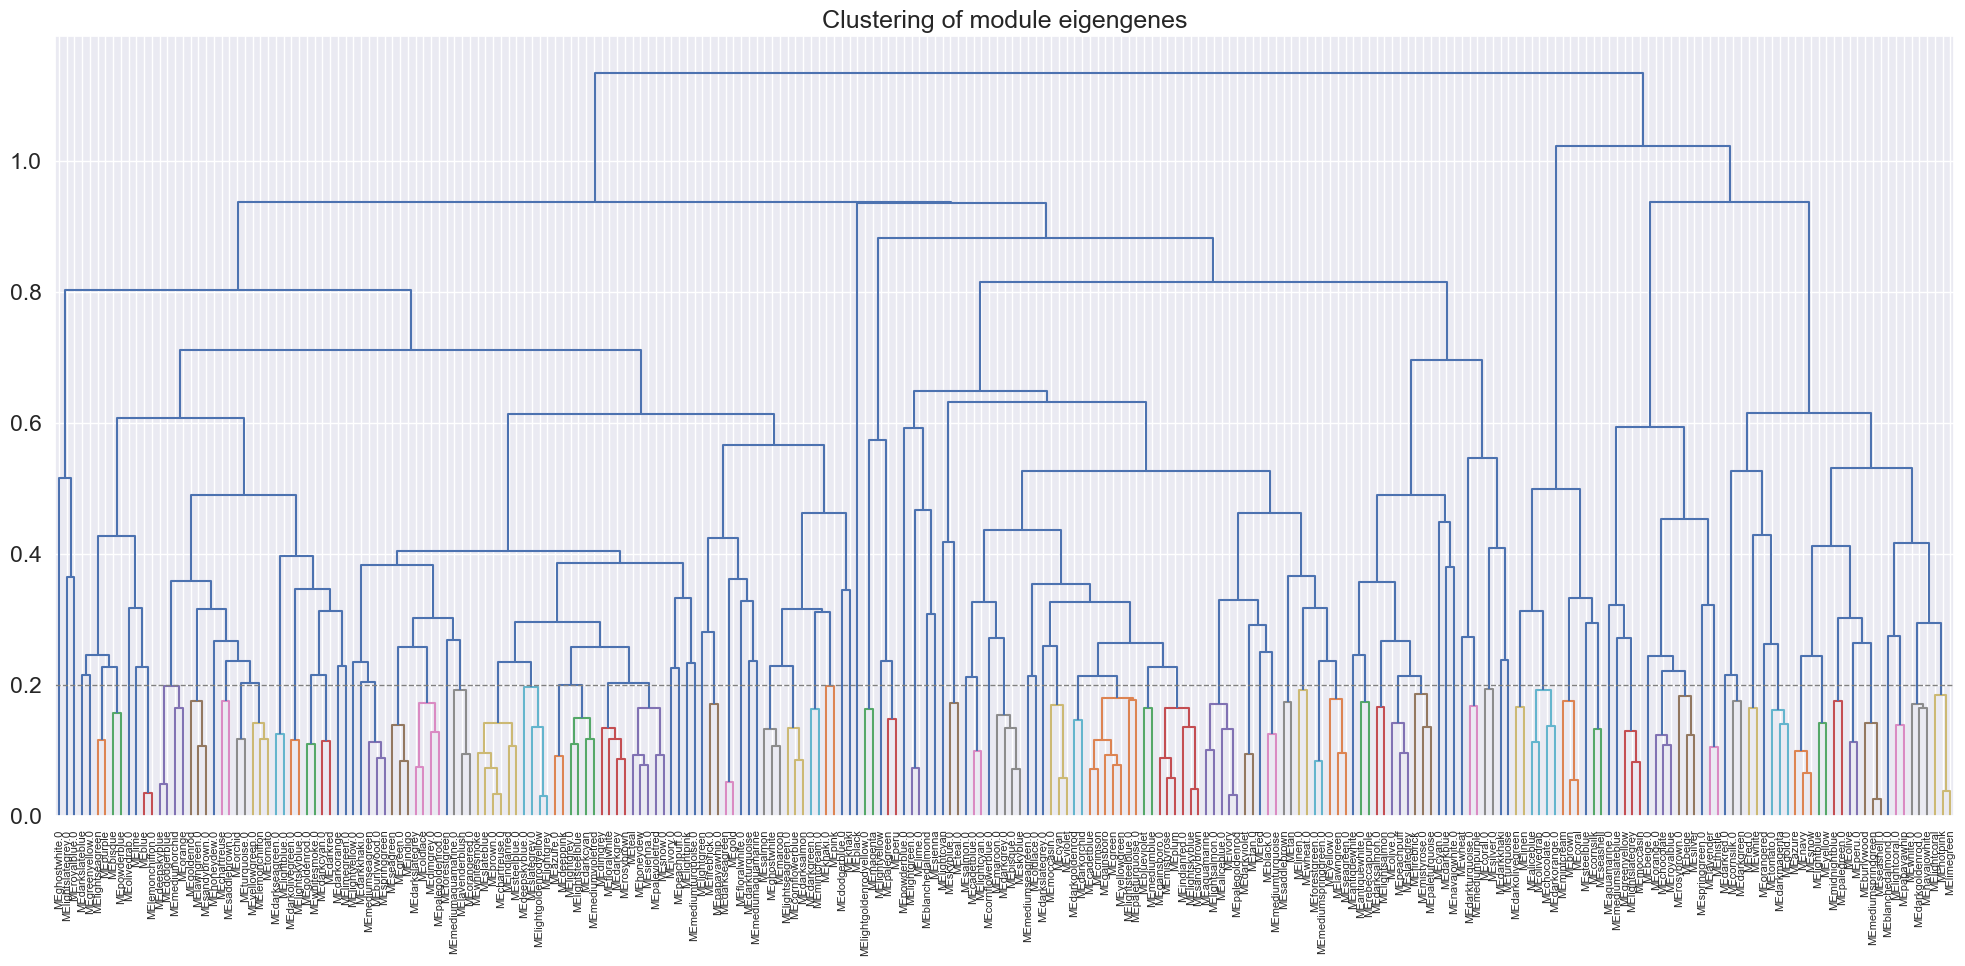

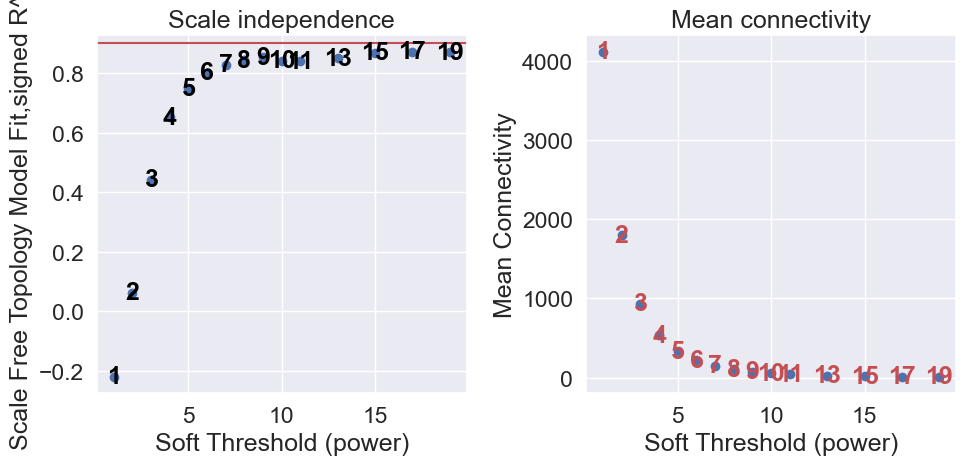

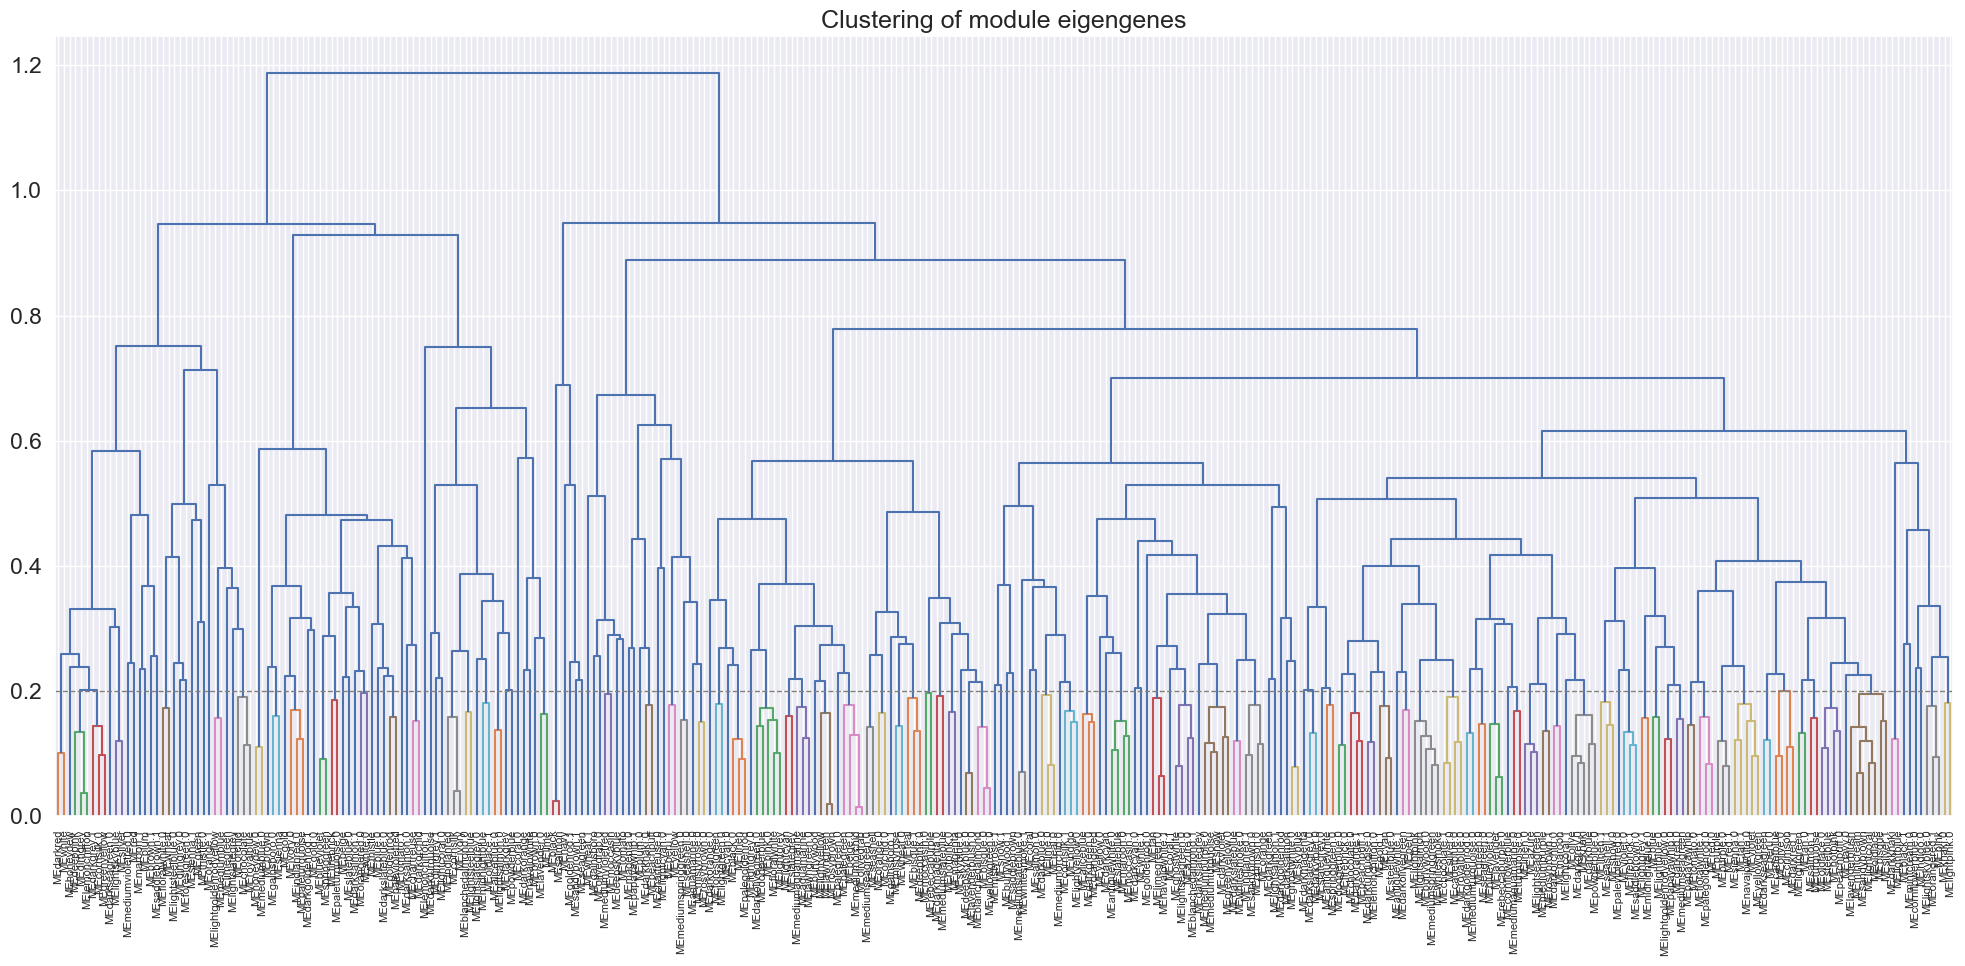

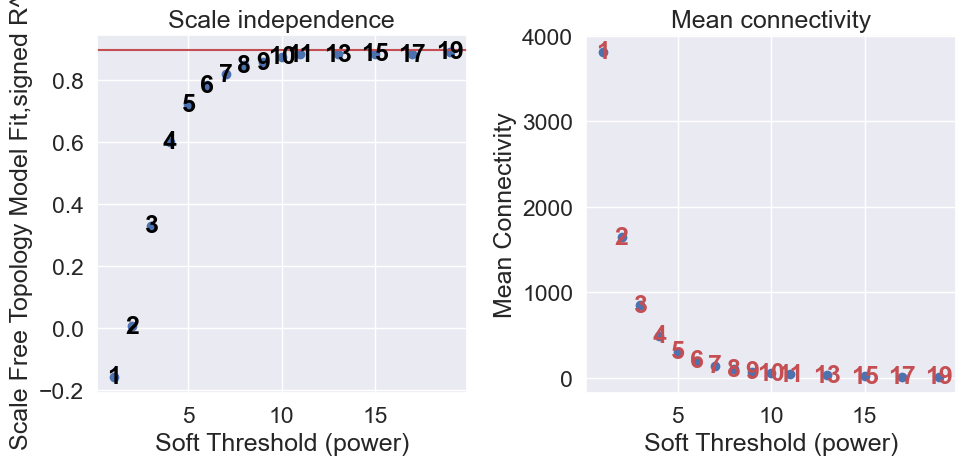

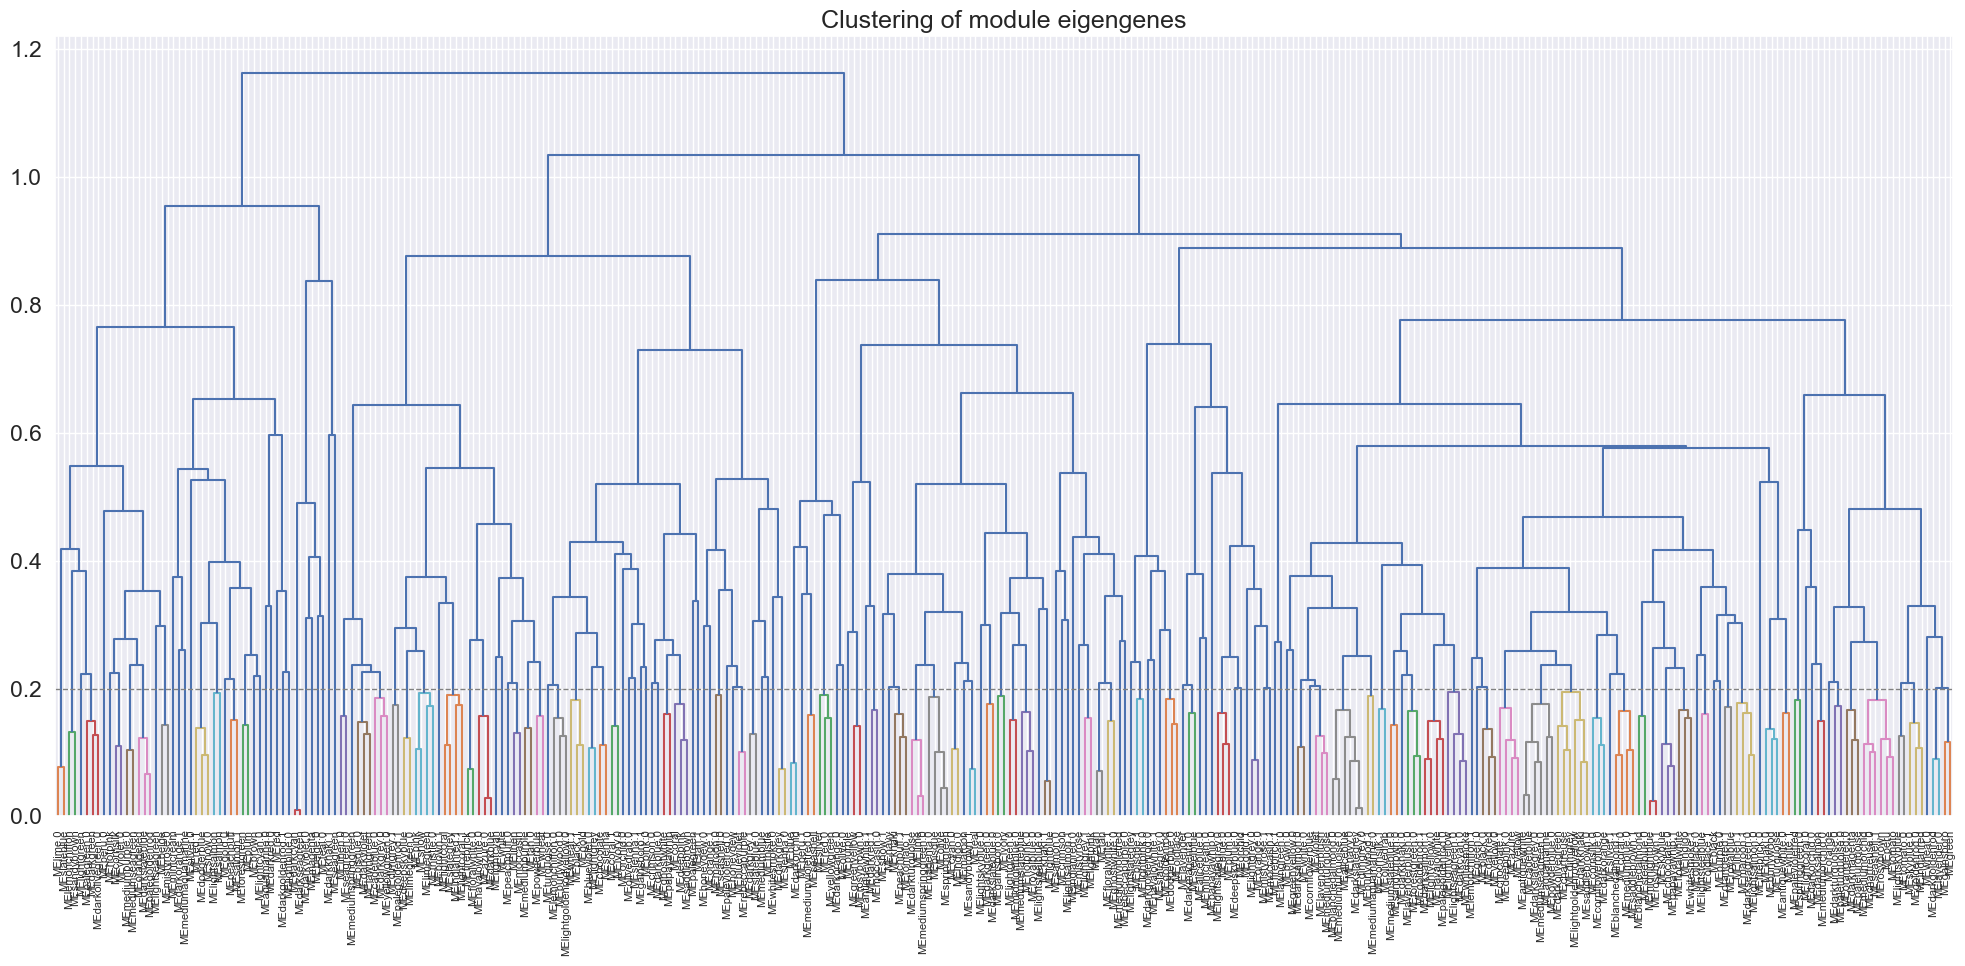

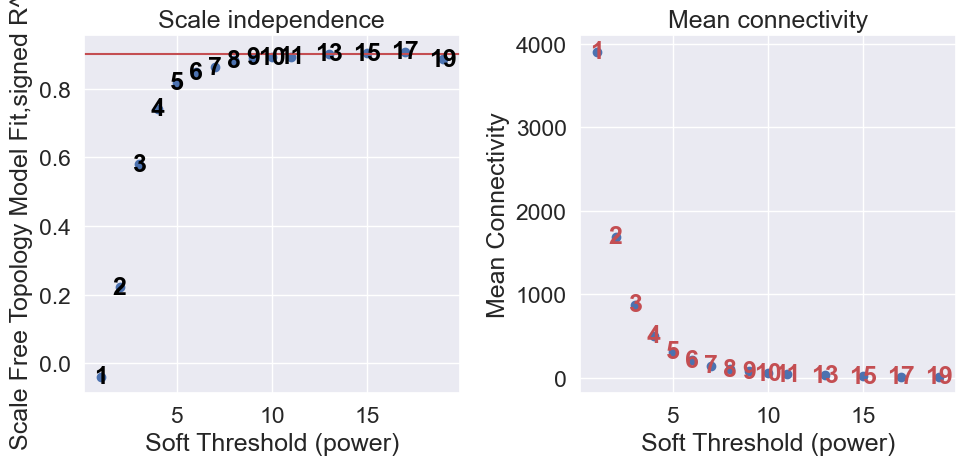

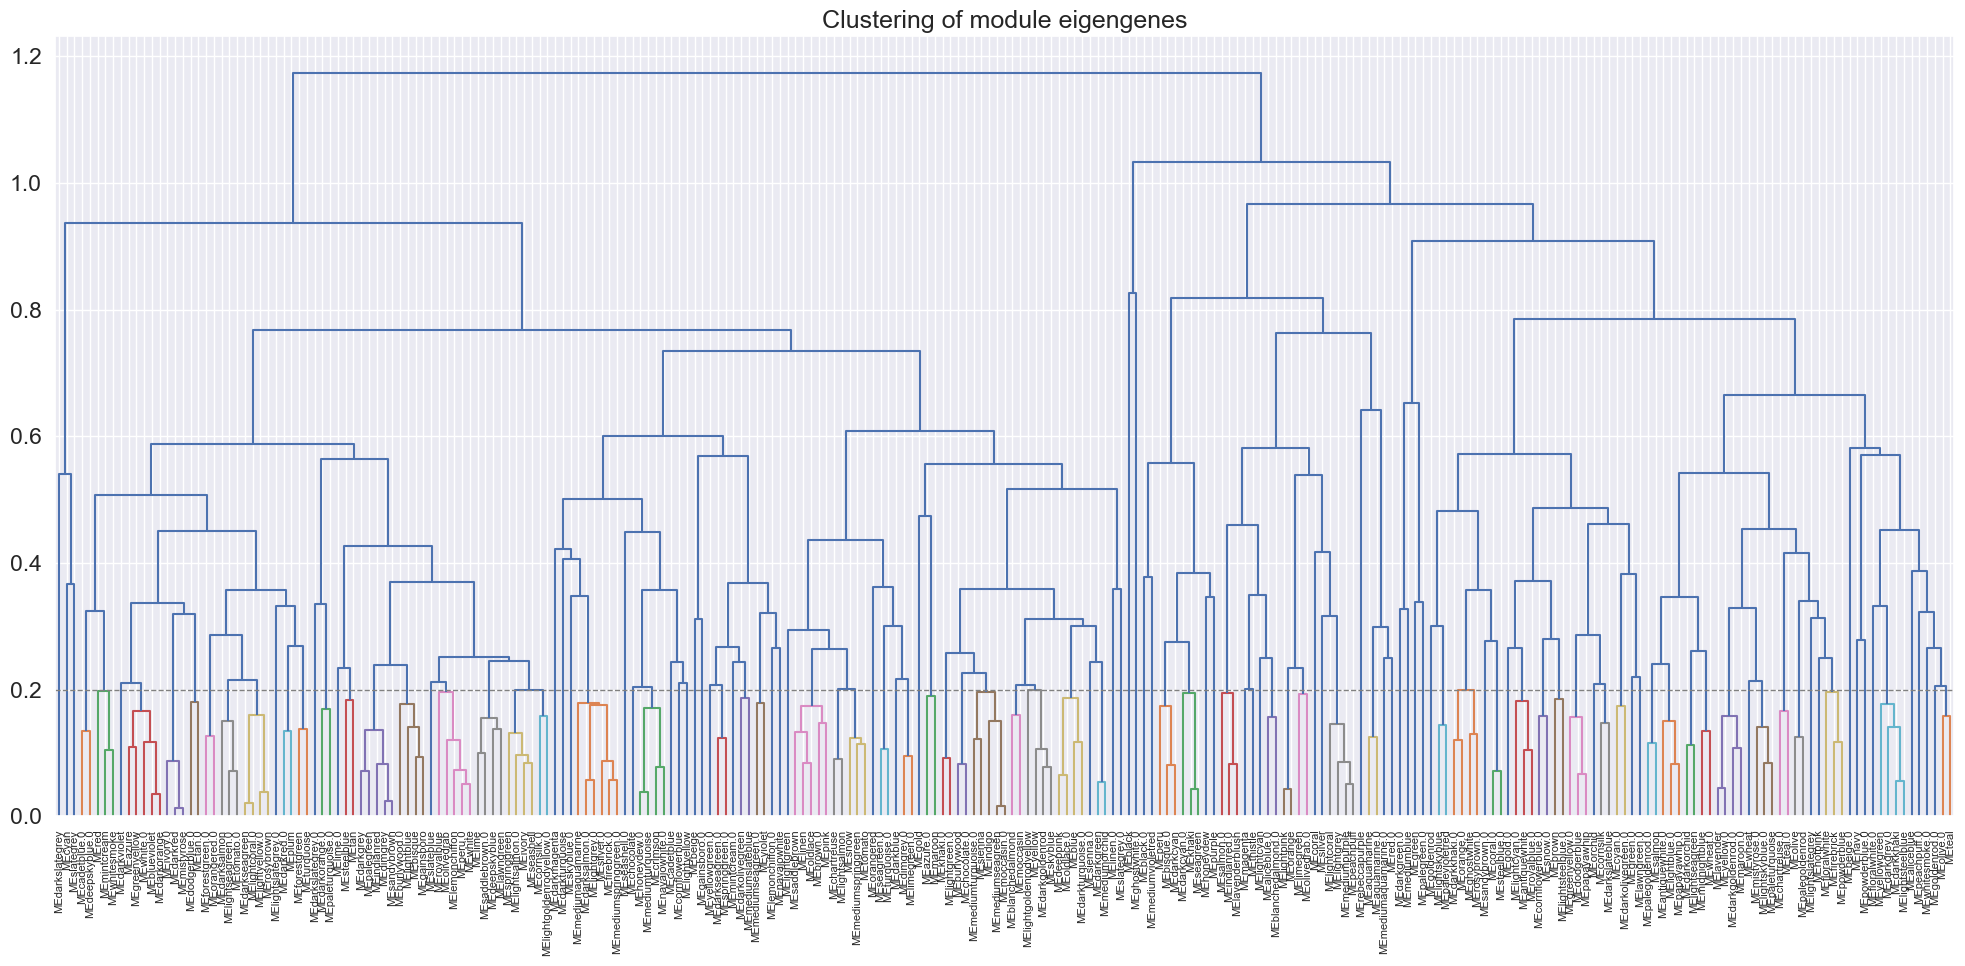

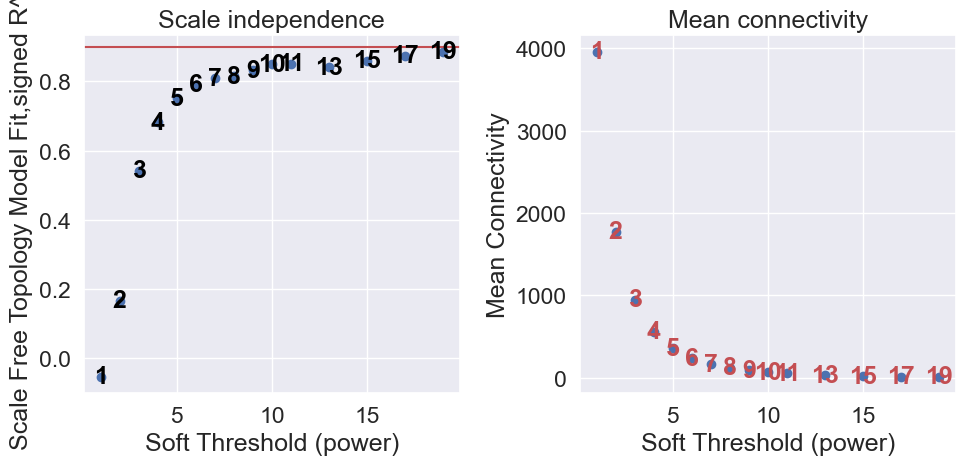

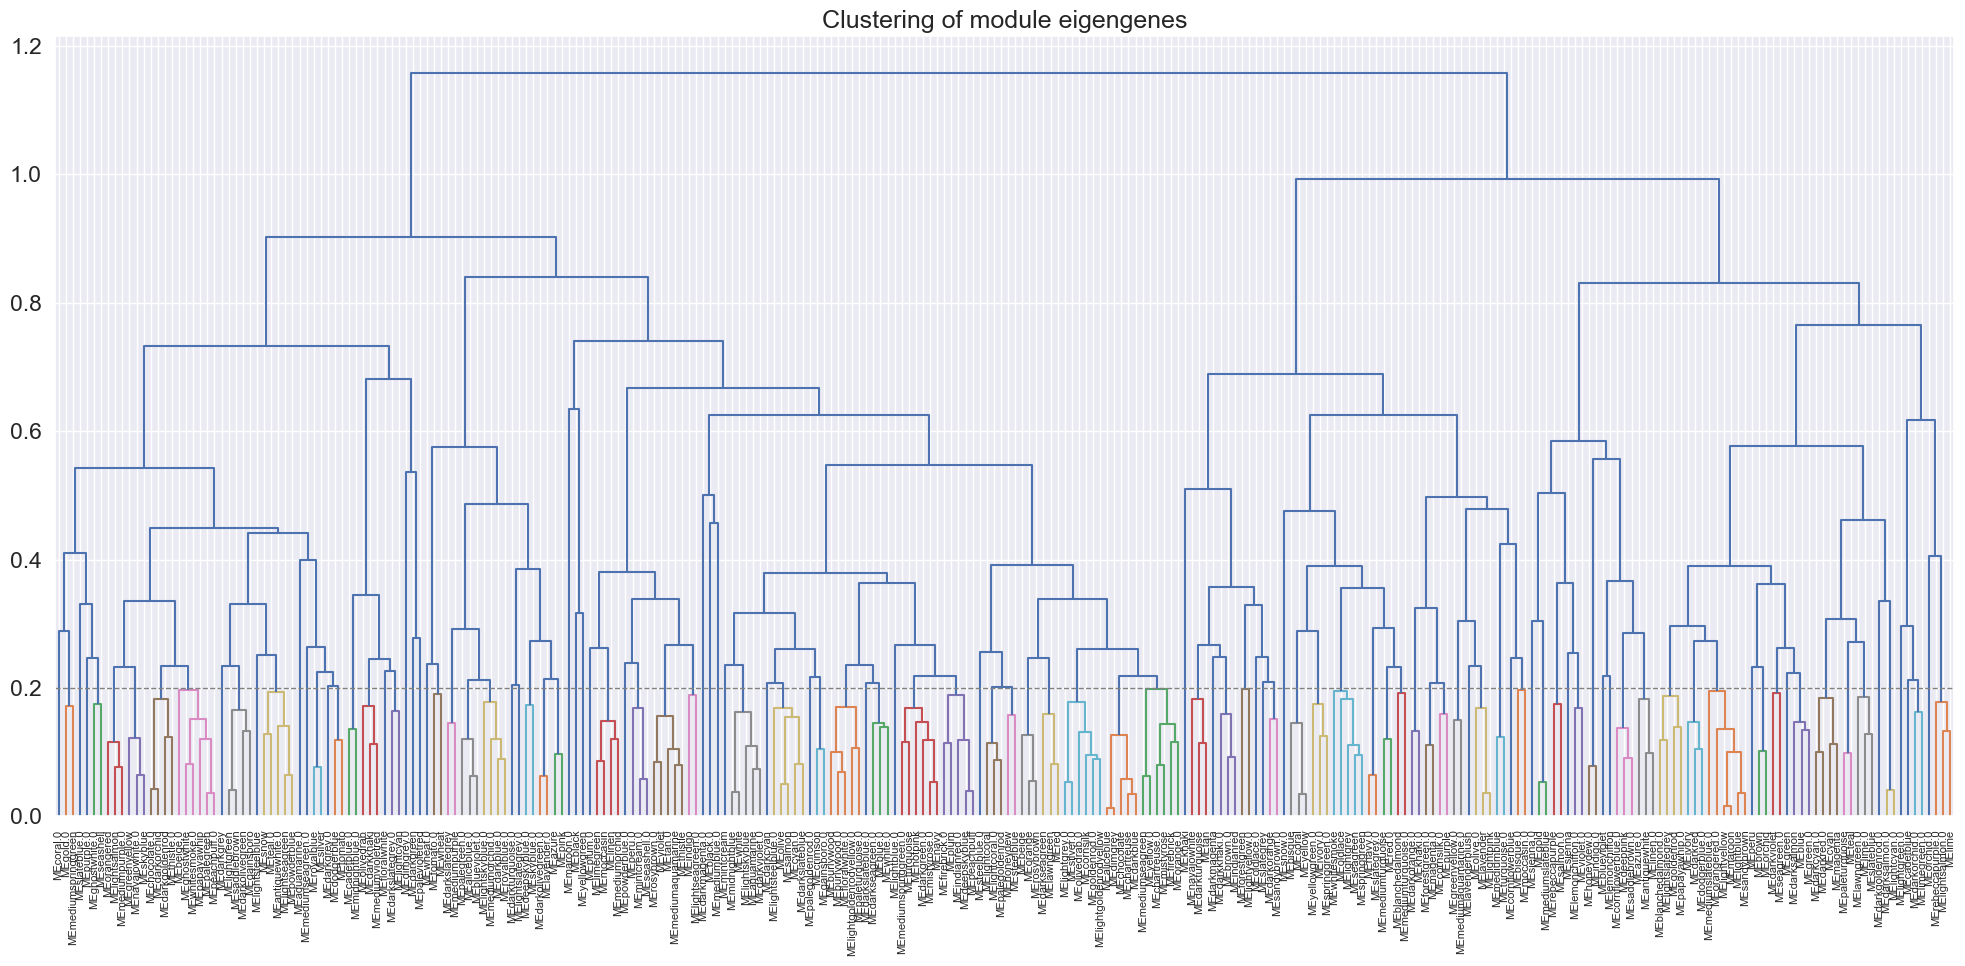

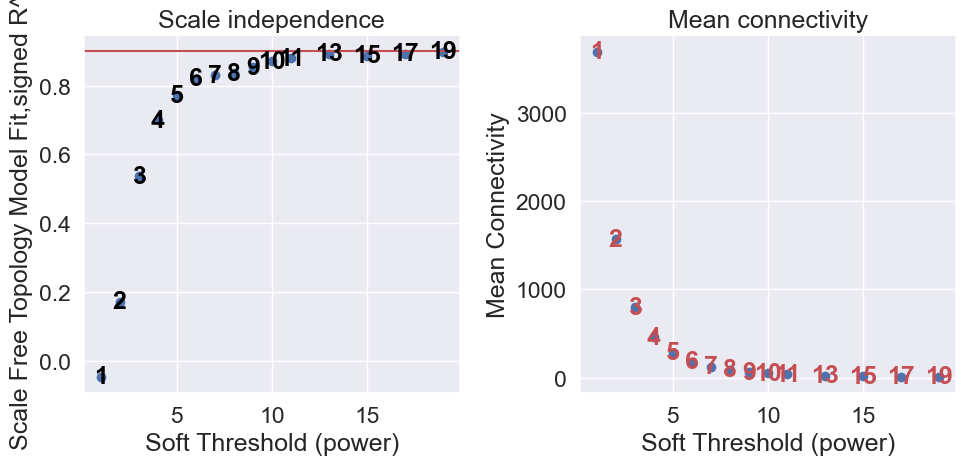

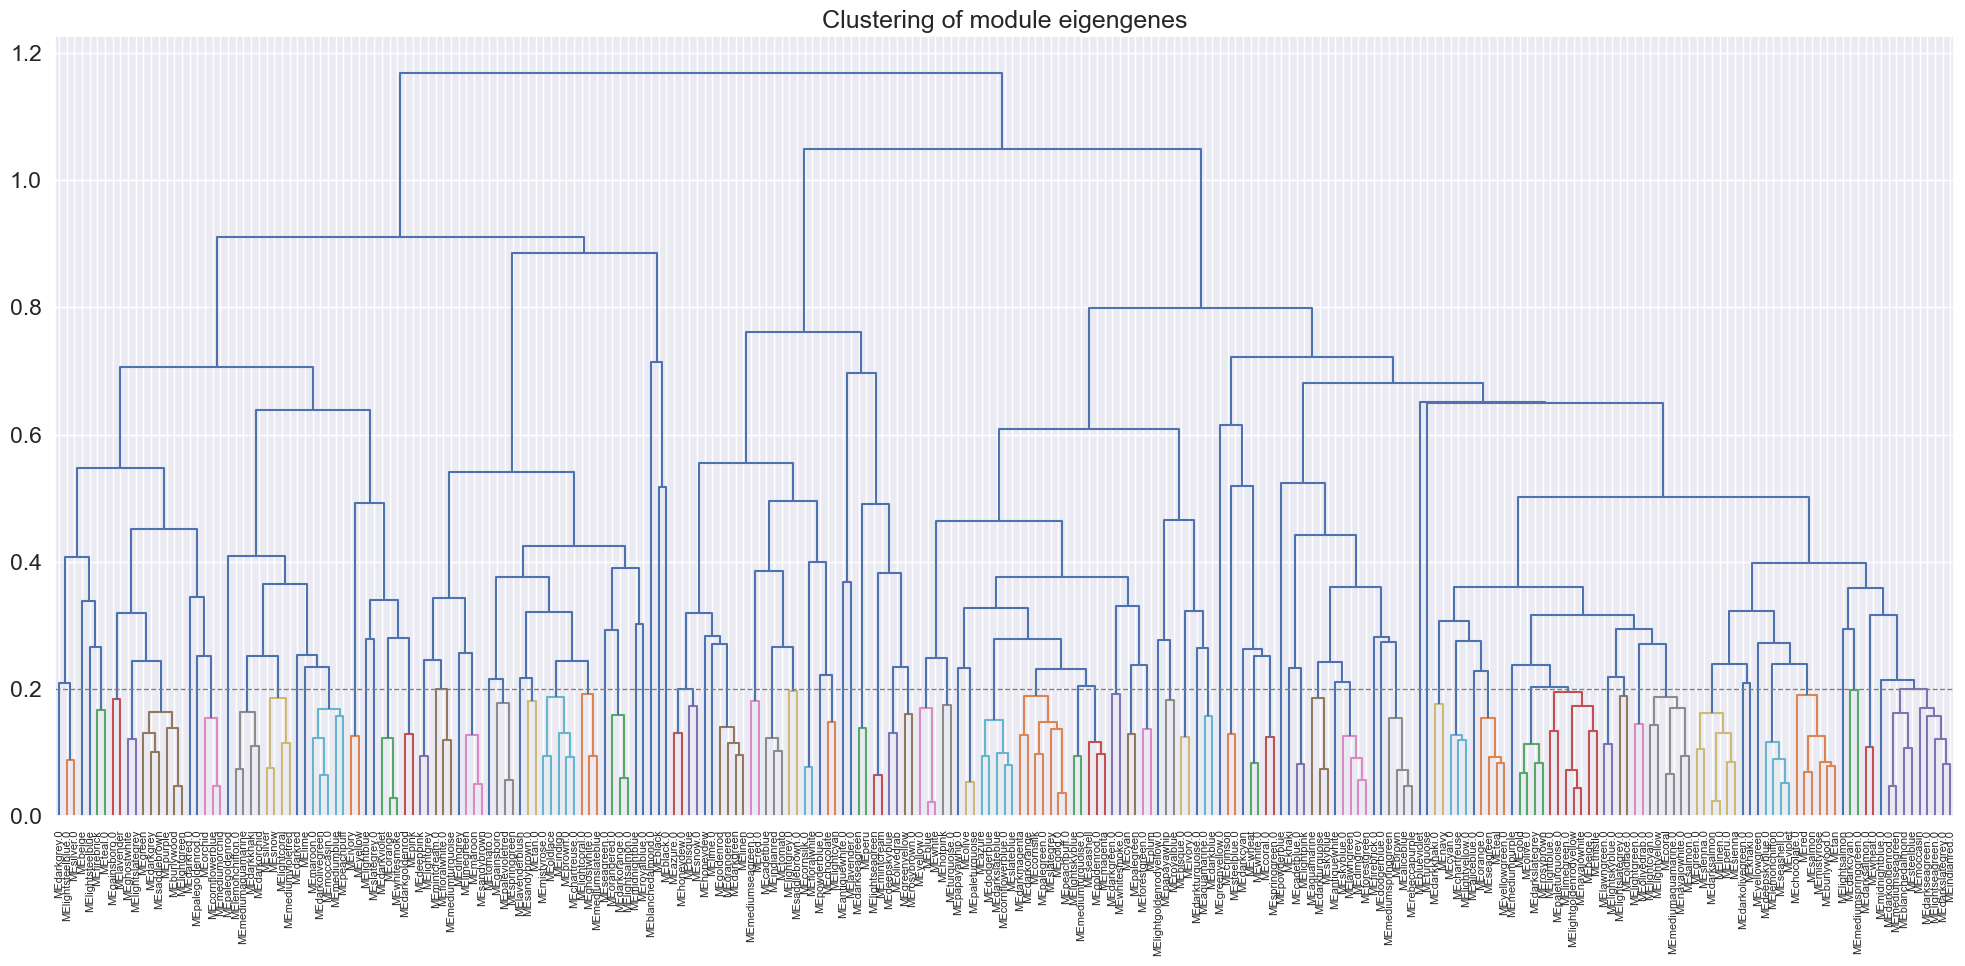

In [53]:
from sklearn.metrics import jaccard_score
from collections import defaultdict

# Número de iteraciones bootstrap
B = 10
results = []

# Diccionario original: módulo → lista de genes
gene_module_dict = pyWGCNA.datExpr.var["moduleColors"].to_dict()
original_modules = defaultdict(list)
for gene, mod in gene_module_dict.items():
    original_modules[mod].append(gene)

# Índices de muestras y genes
sample_names = pyWGCNA.datExpr.obs.index
gene_names = pyWGCNA.datExpr.var.index

# Inicia el proceso de bootstrap
for i in range(B):
    print(f"🔁 Bootstrap {i + 1}/{B}")

    # 1. Muestreo con reemplazo de FILAS (muestras)
    sampled_rows = np.random.choice(pyWGCNA.datExpr.X.shape[0], pyWGCNA.datExpr.X.shape[0], replace=True)
    bootstrap_data = pyWGCNA.datExpr.X[sampled_rows, :]

    # 2. Reconstruir el DataFrame con muestras remuestreadas
    boot_expr_df = pd.DataFrame(
        data=bootstrap_data,
        index=sample_names[sampled_rows],  # nuevas muestras remuestreadas
        columns=gene_names  # los mismos genes
    )

    # 3. Crear nueva red WGCNA con los datos bootstrap
    boot_wgcna = WGCNA(geneExp=boot_expr_df, cut=0.25, minModuleSize=30)


    # 4. Fijar parámetros explícitamente (mejor comparabilidad)
    boot_wgcna.findModules()

    # 5. Obtener módulos del bootstrap
    boot_module_dict = boot_wgcna.datExpr.var["moduleColors"].to_dict()
    boot_modules = defaultdict(list)
    for gene, mod in boot_module_dict.items():
        boot_modules[mod].append(gene)

    # 6. Calcular consistencia por módulo usando Jaccard
    jaccard_scores = []
    for mod_name, genes in original_modules.items():
        # Buscar el módulo del bootstrap que más se solape, sin asumir que los colores coinciden
        best_score = 0
        for boot_mod_genes in boot_modules.values():
            g1 = pd.Series(gene_names.isin(genes).astype(int))
            g2 = pd.Series(gene_names.isin(boot_mod_genes).astype(int))
            try:
                score = jaccard_score(g1, g2)
                best_score = max(best_score, score)
            except:
                continue
        jaccard_scores.append(best_score)

    # 7. Guardar resultado de esta iteración
    results.append(np.mean(jaccard_scores))

# 8. Resultado final
print(f"\n✅ Estabilidad media de los módulos (Jaccard promedio): {np.mean(results):.3f}")



In [36]:
gene_module_dict = pyWGCNA.datExpr.var["moduleColors"].to_dict()
original_modules = defaultdict(list)
for gene, mod in gene_module_dict.items():
    original_modules[mod].append(gene)

sample_names = pyWGCNA.datExpr.obs.index
gene_names = pyWGCNA.datExpr.var.index
sampled_rows = np.random.choice(pyWGCNA.datExpr.X.shape[0], pyWGCNA.datExpr.X.shape[0], replace=True)
sampled_rows

array([ 9, 10, 11, 18,  9, 24, 22, 10, 21, 27, 20, 10,  7,  3, 23,  7, 11,
       18, 12, 12, 17, 11, 19, 20, 17,  9, 18, 26], dtype=int32)

In [54]:
import pandas as pd
import os
from glob import glob

# Ruta donde están los archivos GO_analysis_*.csv
ruta_archivos = "RESULTADOS"

# Buscar todos los archivos de resultados GO
go_files = glob(os.path.join(ruta_archivos, "GO_analysis_*.csv"))

# Lista para almacenar los dataframes con columna de módulo añadida
combined_go_results = []

for file_path in go_files:
    module_name = os.path.basename(file_path).replace("GO_analysis_", "").replace(".csv", "")
    df = pd.read_csv(file_path)
    df["Module"] = module_name
    combined_go_results.append(df)

# Concatenar todos en un único dataframe
all_go_df = pd.concat(combined_go_results, ignore_index=True)

# Guardar archivo combinado
salida = os.path.join(ruta_archivos, "GO_analysis_todos_modulos.csv")
all_go_df.to_csv(salida, index=False)

print(f"✅ Archivo guardado en: {salida}")


✅ Archivo guardado en: RESULTADOS\GO_analysis_todos_modulos.csv


DAR SENTIDO A LOS RESULTADOS OBTENIDOS. Hemos seleccionado aquellos modulos de los que se encuentran al menos un término GO de la clase BP.


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las matrices originales
cor_df = pyWGCNA.moduleTraitCor
pval_df = pyWGCNA.moduleTraitPvalue

# Aplicamos las condiciones de selección
mask_corr = cor_df.abs() >= 0.4
mask_pval = pval_df < 0.05
mask_combined = mask_corr & mask_pval
selected_modules = mask_combined.sum(axis=1) >= 2

# Aplicamos el filtro general
filtered_cor_df = cor_df[selected_modules]

# Filtrar SOLO los módulos que queremos mostrar (por color)
modulos_seleccionados = [
    "MEdimgrey", "MEdarkkhaki", "MElightcoral",
    "MEsaddlebrown", "MEolivedrab", "MEspringgreen",
    "MEorangered", "MEchartreuse", "MElawngreen"
]

# Filtrar según esa lista
filtered_cor_df = filtered_cor_df.loc[
    filtered_cor_df.index.intersection(modulos_seleccionados)
]

# Anotaciones SOLO con la correlación (r)
annot_df = filtered_cor_df.round(2).astype(str)

# Crear el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_cor_df,
            annot=annot_df,
            fmt="",
            cmap="coolwarm",
            center=0,
            linewidths=0.5,
            cbar_kws={'label': 'Correlación módulo-condición'})

plt.title("Relación módulo-condición bajo diferentes estreses abióticos (TPM)")
plt.xlabel("Condición de estrés")
plt.ylabel("Módulo génico")
plt.tight_layout()

# Guardar
plt.savefig("RESULTADOS/heatmap_modulo_vs_condicion.png", dpi=300)
plt.close()

print("✅ Heatmap guardado como 'RESULTADOS/heatmap_modulo_vs_condicion.png'")




✅ Heatmap guardado como 'RESULTADOS/heatmap_modulo_vs_condicion.png'


VAMOS A ESTUDIAR MAS A FONDO LOS MODULOS DIMGREY, ORANGERED, SPRINGGREEN Y CHARTREUSE
🔶 1. MEdimgrey (correlación con múltiples estreses combinados)
H (calor): 0.46

S + H (estrés combinado): 0.46

Control: -0.59
📌 Significativo para respuesta general al estrés

✅ Este módulo parece ser un núcleo de genes activados bajo cualquier forma de estrés y reprimidos en condiciones normales.
💡 Ideal para identificar genes centrales en respuesta abiótica general (core response genes).

🔴 2. MEorangered (respuesta altamente específica al calor)
H: 0.76

Otras condiciones: correlaciones débiles o negativas

✅ Este módulo tiene una respuesta hiperespecífica al calor.
💡 Puede ayudarte a diferenciar lo que es respuesta universal vs. respuesta específica térmica.

🟢 3. MEspringgreen (activado en calor y sequía, reprimido en salinidad)
H: 0.59

D (sequía): 0.20

S (salinidad): -0.42

✅ Este patrón cruzado es oro para tu discusión:
💡 Sugiere que este módulo podría ser un mediador clave de la respuesta compartida a deshidratación (calor y sequía), pero incompatible o antagonista con salinidad.

🟡 4. MEchartreuse (activado por salinidad, reprimido en control)
S: 0.68

Control: -0.55

✅ Podría estar implicado en adaptación específica al estrés salino, especialmente si contiene genes de transporte iónico, ajuste osmótico, etc.
💡 Útil para contrastar con los otros.



In [99]:
pyWGCNA.CoexpressionModulePlot(
    modules=["dimgrey"],         # lista de módulos a visualizar
    numGenes=10,                 # número de genes a incluir en la red
    numConnections=200,         # número de conexiones máximas a mostrar
    minTOM=0.1,                  # umbral mínimo de similitud (TOM)
    file_name="modulo_dimgrey"  # nombre del archivo HTML de salida
)


In [101]:
pyWGCNA.CoexpressionModulePlot(
    modules=["dimgrey", "springgreen", "orangered", "chartreuse"],
    numGenes=50,              # incluir más genes si quieres ver red densa
    numConnections=500,
    minTOM=0.1,                # puedes ajustar a 0 si quieres ver todas las conexiones
    file_name="modulos_seleccionados"
)


In [102]:
import networkx as nx

# Lista de genes del módulo
genes_in_module = pyWGCNA.datExpr.var.query("moduleColors == 'dimgrey'").index.tolist()

# Matriz de expresión
expr_matrix = pyWGCNA.datExpr.to_df()[genes_in_module]

# Matriz de correlación
corr_matrix = expr_matrix.corr().abs()

# Crear red
G = nx.Graph()
threshold = 0.5  # ajusta si ves demasiadas/few conexiones

for i in range(len(genes_in_module)):
    for j in range(i + 1, len(genes_in_module)):
        g1, g2 = genes_in_module[i], genes_in_module[j]
        weight = corr_matrix.loc[g1, g2]
        if weight >= threshold:
            G.add_edge(g1, g2, weight=weight)


In [103]:
# Formato SIF: gene1 gene2
nx.write_edgelist(G, "red_dimgrey.sif", data=False)

# También puedes exportar con pesos en CSV:
edges = nx.to_pandas_edgelist(G)
edges.to_csv("red_dimgrey_edges.csv", index=False)


In [104]:
# Calculamos la suma de correlaciones por gen (como medida de conectividad)
gene_connectivity = corr_matrix.sum().sort_values(ascending=False)

# Seleccionar los 20 genes más conectados
top_genes = gene_connectivity.head(20).index.tolist()
# Subconjunto de la matriz de correlación para esos genes
top_corr_matrix = corr_matrix.loc[top_genes, top_genes]

# Crear red con NetworkX
G = nx.Graph()
threshold = 0.5  # puedes ajustar este valor

for i in range(len(top_genes)):
    for j in range(i + 1, len(top_genes)):
        g1, g2 = top_genes[i], top_genes[j]
        weight = top_corr_matrix.loc[g1, g2]
        if weight >= threshold:
            G.add_edge(g1, g2, weight=weight)

# Exportar en formato SIF
nx.write_edgelist(G, "red_dimgrey_top20.sif", data=False)

# Exportar con pesos a CSV
edges = nx.to_pandas_edgelist(G)
edges.to_csv("red_dimgrey_top20_edges.csv", index=False)

# (Opcional) Exportar atributos de nodos
node_df = pd.DataFrame({"gene": G.nodes})
node_df.to_csv("red_dimgrey_top20_nodes.csv", index=False)


In [105]:
import networkx as nx
import pandas as pd

# Lista de módulos a procesar
modulos = ["dimgrey", "springgreen", "orangered", "chartreuse"]

# Matriz de expresión completa
expr_all = pyWGCNA.datExpr.to_df()
corr_all = expr_all.corr().abs()  # matriz de correlación completa (puede recortarse después)

# Procesar cada módulo
for module in modulos:
    print(f"Procesando módulo: {module}")

    # Genes del módulo
    genes_in_module = pyWGCNA.datExpr.var.query("moduleColors == @module").index.tolist()

    # Matriz de expresión del módulo
    expr_module = expr_all[genes_in_module]
    corr_matrix = expr_module.corr().abs()

    # Calcular conectividad por gen (suma de correlaciones)
    gene_connectivity = corr_matrix.sum().sort_values(ascending=False)

    # Seleccionar los 20 genes más conectados
    top_genes = gene_connectivity.head(20).index.tolist()

    # Submatriz para esos genes
    top_corr_matrix = corr_matrix.loc[top_genes, top_genes]

    # Crear red en networkx
    G = nx.Graph()
    threshold = 0.6  # puedes ajustar esto para hacer redes menos densas

    for i in range(len(top_genes)):
        for j in range(i + 1, len(top_genes)):
            g1, g2 = top_genes[i], top_genes[j]
            weight = top_corr_matrix.loc[g1, g2]
            if weight >= threshold:
                G.add_edge(g1, g2, weight=weight)

    # Exportar archivos
    nx.write_edgelist(G, f"red_{module}_top20.sif", data=False)

    edges = nx.to_pandas_edgelist(G)
    edges.to_csv(f"red_{module}_top20_edges.csv", index=False)

    node_df = pd.DataFrame({"gene": G.nodes})
    node_df.to_csv(f"red_{module}_top20_nodes.csv", index=False)

    print(f"✅ Módulo {module}: exportación completada ({len(G.nodes)} nodos, {len(G.edges)} aristas)\n")


Procesando módulo: dimgrey
✅ Módulo dimgrey: exportación completada (20 nodos, 190 aristas)

Procesando módulo: springgreen
✅ Módulo springgreen: exportación completada (20 nodos, 182 aristas)

Procesando módulo: orangered
✅ Módulo orangered: exportación completada (20 nodos, 165 aristas)

Procesando módulo: chartreuse
✅ Módulo chartreuse: exportación completada (20 nodos, 190 aristas)



In [107]:
import networkx as nx
import pandas as pd

# Lista de módulos a incluir
modulos = ["dimgrey", "springgreen", "orangered", "chartreuse"]

# Obtener matriz de expresión completa
expr_all = pyWGCNA.datExpr.to_df()

# Diccionario para guardar los genes top de cada módulo
modulo_genes_dict = {}

# Paso 1: obtener top 10 genes por módulo
for module in modulos:
    genes = pyWGCNA.datExpr.var.query("moduleColors == @module").index.tolist()
    expr_sub = expr_all[genes]
    corr_matrix = expr_sub.corr().abs()
    connectivity = corr_matrix.sum().sort_values(ascending=False)
    top_genes = connectivity.head(10).index.tolist()
    modulo_genes_dict[module] = top_genes

# Paso 2: combinar todos los genes únicos
all_top_genes = list(set([g for genes in modulo_genes_dict.values() for g in genes]))

# Paso 3: crear matriz de correlación entre todos ellos
combined_expr = expr_all[all_top_genes]
combined_corr = combined_expr.corr().abs()

# Paso 4: construir red completa
G = nx.Graph()
threshold = 0.6  # ajustable

for i in range(len(all_top_genes)):
    for j in range(i + 1, len(all_top_genes)):
        g1, g2 = all_top_genes[i], all_top_genes[j]
        weight = combined_corr.loc[g1, g2]
        if weight >= threshold:
            G.add_edge(g1, g2, weight=weight)

# Paso 5: exportar aristas
nx.write_edgelist(G, "red_conjunta_top10_modulos.sif", data=False)
edges = nx.to_pandas_edgelist(G)
edges.to_csv("red_conjunta_top10_modulos_edges.csv", index=False)

# Paso 6: exportar nodos con color de módulo
modulo_info = []
for mod, genes in modulo_genes_dict.items():
    for gene in genes:
        modulo_info.append({"gene": gene, "module": mod})

nodes_df = pd.DataFrame(modulo_info).drop_duplicates(subset="gene")
nodes_df = nodes_df[nodes_df["gene"].isin(G.nodes)]
nodes_df.to_csv("red_conjunta_top10_modulos_nodes.csv", index=False)

print(f"✅ Red conjunta creada: {len(G.nodes)} nodos, {len(G.edges)} aristas.")


✅ Red conjunta creada: 40 nodos, 418 aristas.
